<p style="font-size:36px;text-align:center"> <b> Product Backorder Prediction </b> </p>

<h2>Problem Description </h2>

###### Backorder:

An item on backorder is an out of stock product that is expected to be delivered by a certain date once it is back in stock. Businesses will often still sell products on backorder with the guarantee to ship them to the buyer once their inventory has been replenished.

Backordering an item means the shopper can buy the item now and receive it at a future date when the item is in stock and available. When an order contains a backordered item, it can’t be packed and shipped immediately given the lack of physical inventory at the time. 

Backorders are a common supply chain problem that impact an inventory system service level and effectiveness. Identifying products with the highest chances of getting into backorders can improve the overall company’s performance.

#### Problem Statement:

 So, the objective is to build a Machine Learning model that can predict products that might get into backorders in the future so that companies can take certain actions accordingly and thus improving inventory management & overall performance.


<h3> Data Overview </h3>

- Source: https://www.kaggle.com/c/untadta/data
- There are 2 data files train.csv and test.csv. 
- There are 1687861 entries in train.csv and 242076 entries in test.csv.
- Both Train and test files have 23 columns.

- Data fields
    - sku - unique code for identifing each item
    - national_inv- Current inventory level of component
    - lead_time -Transit time
    - in_transit_qty - Quantity in transit
    - forecast_x_month - Forecast sales for the net 3, 6, 9 months
    - sales_x_month - Sales quantity for the prior 1, 3, 6, 9 months
    - min_bank - Minimum recommended amount in stock
    - potential_issue - Indictor variable noting potential issue with item
    - pieces_past_due - Parts overdue from source
    - perf_x_months_avg - Source performance in the last 6 and 12 months
    - local_bo_qty - Amount of stock orders overdue
    - X17-X22 - General Risk Flags
    - went_on_back_order - Product went on backorder
    

<h2> Mapping the real world problem to an ML problem </h2>

It is a binary classification problem where the model needs to predict whether the given datapoint belongs to a backorder product or non-backorder product based on the available features.

<h3> Business Objectives and Constraints </h3>

- Misclassifying a product as it might get backorders in the future could be a problem based on the space available in the warehouse.

- Interpretability is an important aspect,knowing why the model predicts backorder could help the seller to determine reorder of the product.

- Latency is not an important aspect of the problem.


<h1> Exploratory Data Analysis </h1>

In [5]:
#import rarfile
import patoolib
import numpy as np,seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import norm
import scipy.stats as stats
from fitter import Fitter, get_common_distributions, get_distributions
import missingno as msno
from prettytable import PrettyTable
from collections import Counter
#import dill
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_recall_curve
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
import imblearn
import imblearn.over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

<h3> Reading data and Analysing basic information</h3>

In [6]:
# reading data from csv file
import pandas as pd

df = pd.read_csv('/home/shkr/Documents/ML/CaseStudies/Self Case-Study/backOrder Pred/BackOrder_data/Kaggle_Training_Dataset_v2.csv',)
df.tail()

sku  national_inv  lead_time  in_transit_qty  \
1687856         1373987          -1.0        NaN             0.0   
1687857         1524346          -1.0        9.0             0.0   
1687858         1439563          62.0        9.0            16.0   
1687859         1502009          19.0        4.0             0.0   
1687860  (1687860 rows)           NaN        NaN             NaN   

         forecast_3_month  forecast_6_month  forecast_9_month  sales_1_month  \
1687856               5.0               7.0               9.0            1.0   
1687857               7.0               9.0              11.0            0.0   
1687858              39.0              87.0             126.0           35.0   
1687859               0.0               0.0               0.0            2.0   
1687860               NaN               NaN               NaN            NaN   

         sales_3_month  sales_6_month  ...  pieces_past_due  perf_6_month_avg  \
1687856            3.0            3.0  ...              0.0            -99.00   
1687857            8.0           11.0  ...              0.0              0.86   
1687858           63.0          153.0  ...              0.0              0.86   
1687859            7.0           12.0  ...              0.0              0.73   
1687860            NaN            NaN  ...              NaN               NaN   

        perf_12_month_avg  local_bo_qty  deck_risk  oe_constraint  ppap_risk  \
1687856            -99.00           1.0         No             No         No   
1687857              0.84           1.0        Yes             No         No   
1687858              0.84           6.0         No             No         No   
1687859              0.78           1.0         No             No         No   
1687860               NaN           NaN        NaN            NaN        NaN   

        stop_auto_buy rev_stop went_on_backorder  
1687856           Yes       No                No  
1687857            No       No               Yes  
1687858           Yes       No                No  
1687859           Yes       No                No  
1687860           NaN      NaN               NaN  

[5 rows x 23 columns]

In [7]:
df = df.drop(1687860)

In [8]:
print('no.of rows in the data:',df.shape[0])
print('no.of cols in the data:',df.shape[1])
df.tail()

no.of rows in the data: 1687860
no.of cols in the data: 23


sku  national_inv  lead_time  in_transit_qty  forecast_3_month  \
1687855  1407754           0.0        2.0             0.0              10.0   
1687856  1373987          -1.0        NaN             0.0               5.0   
1687857  1524346          -1.0        9.0             0.0               7.0   
1687858  1439563          62.0        9.0            16.0              39.0   
1687859  1502009          19.0        4.0             0.0               0.0   

         forecast_6_month  forecast_9_month  sales_1_month  sales_3_month  \
1687855              10.0              10.0            0.0            5.0   
1687856               7.0               9.0            1.0            3.0   
1687857               9.0              11.0            0.0            8.0   
1687858              87.0             126.0           35.0           63.0   
1687859               0.0               0.0            2.0            7.0   

         sales_6_month  ...  pieces_past_due  perf_6_month_avg  \
1687855            7.0  ...              0.0              0.69   
1687856            3.0  ...              0.0            -99.00   
1687857           11.0  ...              0.0              0.86   
1687858          153.0  ...              0.0              0.86   
1687859           12.0  ...              0.0              0.73   

        perf_12_month_avg  local_bo_qty  deck_risk  oe_constraint  ppap_risk  \
1687855              0.69           5.0        Yes             No         No   
1687856            -99.00           1.0         No             No         No   
1687857              0.84           1.0        Yes             No         No   
1687858              0.84           6.0         No             No         No   
1687859              0.78           1.0         No             No         No   

        stop_auto_buy rev_stop went_on_backorder  
1687855           Yes       No                No  
1687856           Yes       No                No  
1687857            No       No               Yes  
1687858           Yes       No                No  
1687859           Yes       No                No  

[5 rows x 23 columns]

In [9]:
print('-'*60,)
print('|Features available and corresponding datatype of the data:|')
print('-'*60,'\n')
print(df.dtypes.to_string())


------------------------------------------------------------
|Features available and corresponding datatype of the data:|
------------------------------------------------------------ 

sku                   object
national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue       object
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object


In [10]:
#https://stackoverflow.com/questions/55394854/how-to-change-the-format-of-describe-output

print('\nBasic description about data:')
print('-'*30)
df.describe().applymap('{:,.4f}'.format)


Basic description about data:
------------------------------


national_inv       lead_time  in_transit_qty forecast_3_month  \
count   1,687,860.0000  1,586,967.0000  1,687,860.0000   1,687,860.0000   
mean          496.1118          7.8723         44.0520         178.1193   
std        29,615.2338          7.0560      1,342.7417       5,026.5531   
min       -27,256.0000          0.0000          0.0000           0.0000   
25%             4.0000          4.0000          0.0000           0.0000   
50%            15.0000          8.0000          0.0000           0.0000   
75%            80.0000          9.0000          0.0000           4.0000   
max    12,334,404.0000         52.0000    489,408.0000   1,427,612.0000   

      forecast_6_month forecast_9_month   sales_1_month   sales_3_month  \
count   1,687,860.0000   1,687,860.0000  1,687,860.0000  1,687,860.0000   
mean          344.9867         506.3644         55.9261        175.0259   
std         9,795.1519      14,378.9236      1,928.1959      5,192.3776   
min             0.0000           0.0000          0.0000          0.0000   
25%             0.0000           0.0000          0.0000          0.0000   
50%             0.0000           0.0000          0.0000          1.0000   
75%            12.0000          20.0000          4.0000         15.0000   
max     2,461,360.0000   3,777,304.0000    741,774.0000  1,105,478.0000   

        sales_6_month   sales_9_month        min_bank pieces_past_due  \
count  1,687,860.0000  1,687,860.0000  1,687,860.0000  1,687,860.0000   
mean         341.7288        525.2697         52.7723          2.0437   
std        9,613.1671     14,838.6135      1,254.9831        236.0165   
min            0.0000          0.0000          0.0000          0.0000   
25%            0.0000          0.0000          0.0000          0.0000   
50%            2.0000          4.0000          0.0000          0.0000   
75%           31.0000         47.0000          3.0000          0.0000   
max    2,146,625.0000  3,205,172.0000    313,319.0000    146,496.0000   

      perf_6_month_avg perf_12_month_avg    local_bo_qty  
count   1,687,860.0000    1,687,860.0000  1,687,860.0000  
mean           -6.8721           -6.4379          0.6265  
std            26.5564           25.8433         33.7222  
min           -99.0000          -99.0000          0.0000  
25%             0.6300            0.6600          0.0000  
50%             0.8200            0.8100          0.0000  
75%             0.9700            0.9500          0.0000  
max             1.0000            1.0000     12,530.0000

<h4>Observations from description of data:</h4>
-----------------------------------------------------



<font color='green'>
    
<i>
<b>
    
- There are 23 features intotal with 15 numerical features and 8 categorical features with one of them being the class variable.
    
    
- From the basic description of data a large difference between the 75% percentile & max value of every numerical feature can be observed and also there is large difference between mean values and median values, this could be due to the presence of outliers in the data.
  
    
- There are numerical feautres which have 50% of the values just 0. Features intransit qty,local_bo_qty,pieces_due have 75% of the values 0, these features can be dropped if they do not provide any useful information.
    
    
- By looking at few datapoints in the data there appears to be some missing values in the feature Lead_time, so dataset contain null values which needs to be imputed. 
 
    
- Feature national_inv and performance features have negative values, performing further analysis on the features will help to know the cause of -ve values.
    
  </b></i>  
</font>

<h3> Checking for Null values </h3>

<h4>Checking for null values in Train data</h4>

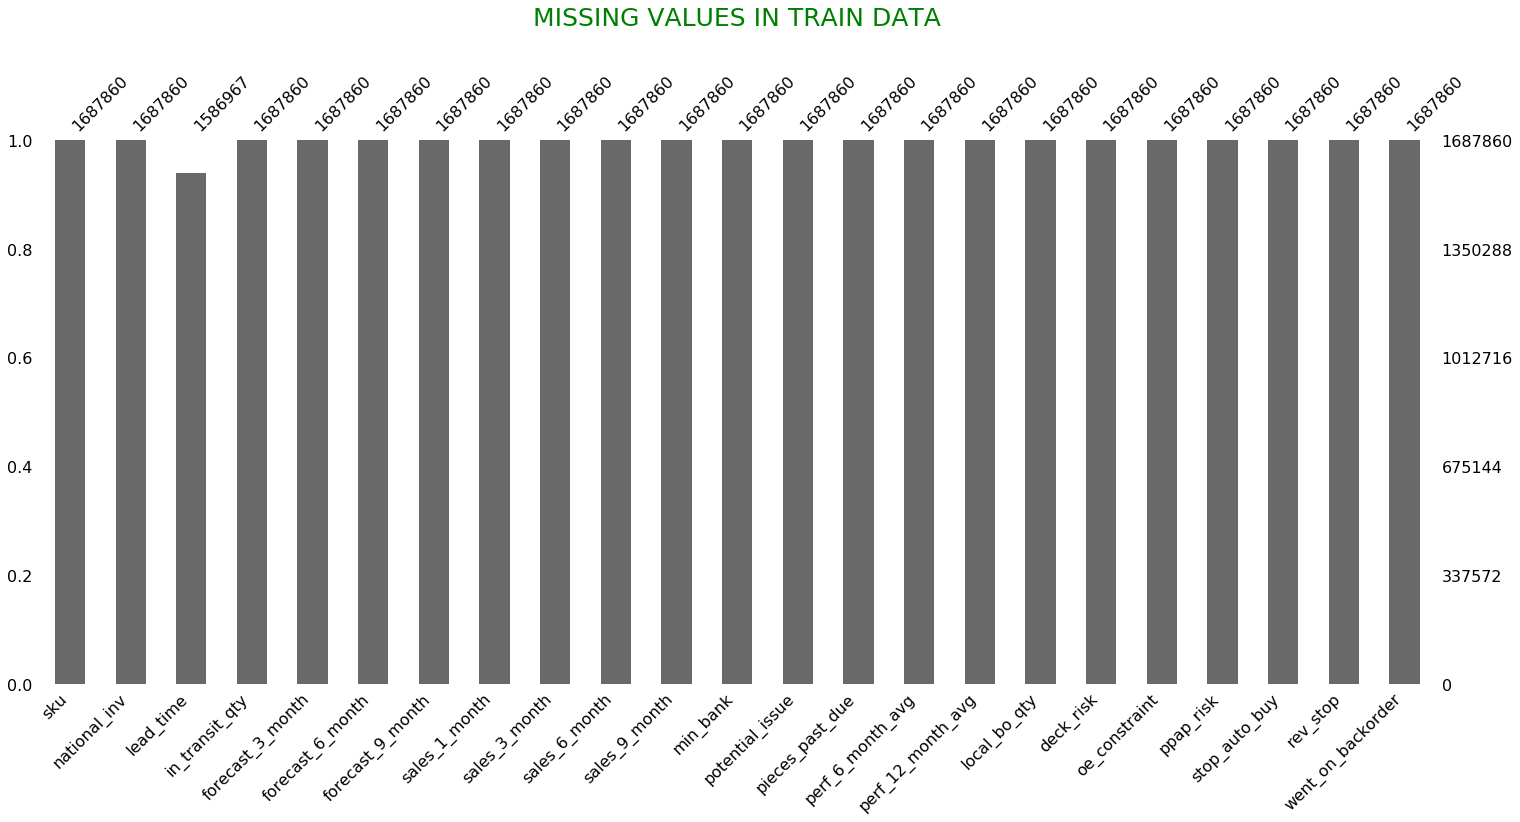

In [11]:
# msno is a visual library that is used to plot any missing values in the data with different visualizations.

msno.bar(df);
plt.title('Missing Values in train data'.upper(),fontdict={'fontsize':25},color = 'green',y=1.2)
plt.savefig('Missing Values.png')
plt.show()

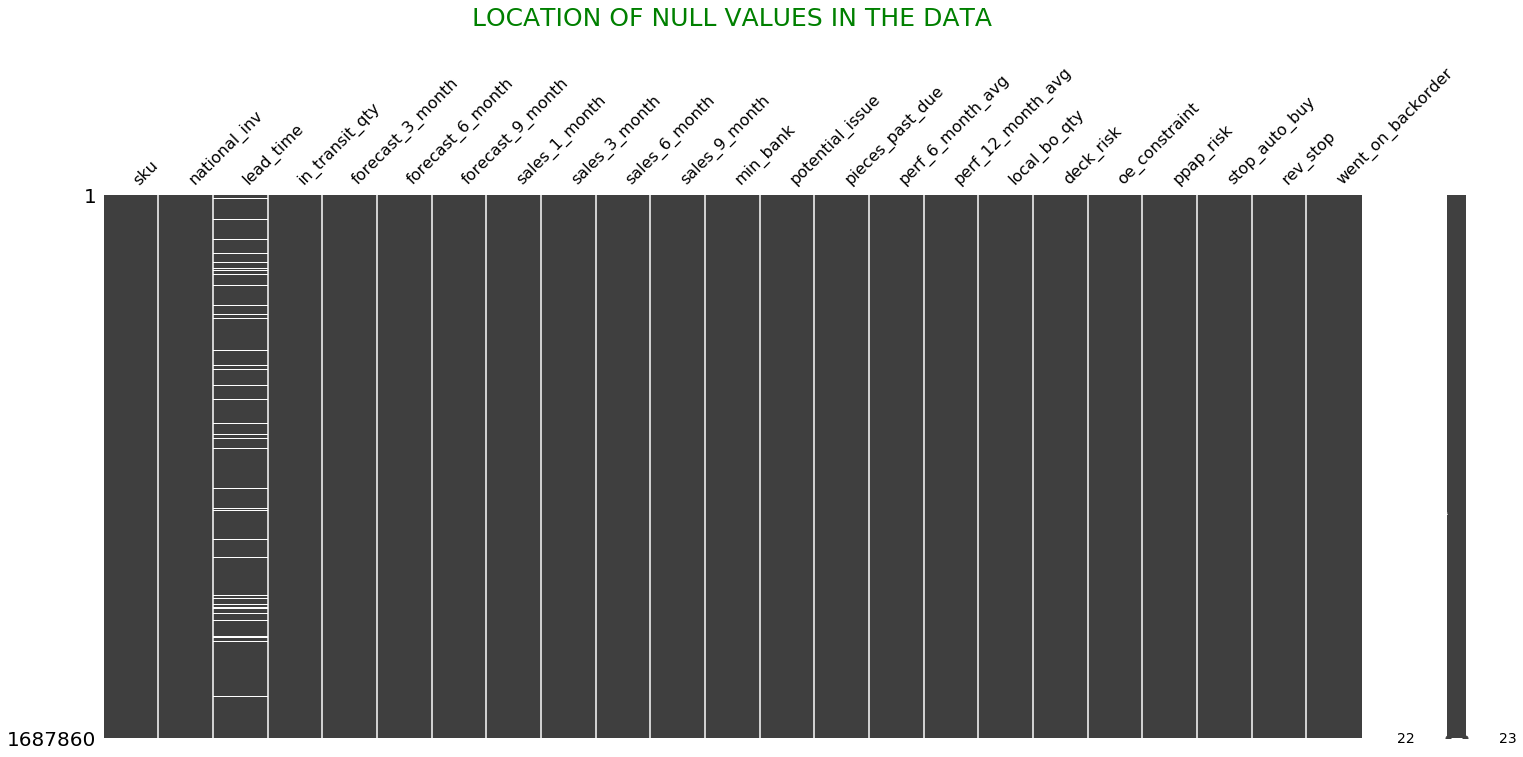

In [12]:
msno.matrix(df)
plt.title('Location of null values in the data'.upper(),fontdict={'fontsize':25},color = 'green',y=1.3)
plt.savefig('Missing Values loc.png')
plt.show();

In [30]:
# checking for null values in each feature
print('percent of null values per each feature:')
print('-'*35,'\n')
print(round((df.isna().sum())/df.shape[0] * 100).apply(lambda x: int(x)).apply(lambda x: str(x)+' %').to_string())

percent of null values per each feature:
----------------------------------- 

sku                  0 %
national_inv         0 %
lead_time            6 %
in_transit_qty       0 %
forecast_3_month     0 %
forecast_6_month     0 %
forecast_9_month     0 %
sales_1_month        0 %
sales_3_month        0 %
sales_6_month        0 %
sales_9_month        0 %
min_bank             0 %
potential_issue      0 %
pieces_past_due      0 %
perf_6_month_avg     0 %
perf_12_month_avg    0 %
local_bo_qty         0 %
deck_risk            0 %
oe_constraint        0 %
ppap_risk            0 %
stop_auto_buy        0 %
rev_stop             0 %
went_on_backorder    0 %


In [32]:
print('No.of Null values in lead_time:',df.lead_time.isnull().sum())
print('-'*45)
print('% of Null values in lead_time:',np.round((df.lead_time.isnull().sum())/df.shape[0],3)*100)

No.of Null values in lead_time: 100893
---------------------------------------------
% of Null values in lead_time: 6.0


<font color='green'>
<i>
<b>  
    
- There are no null values in any of the features except for lead_time, lead_time contains 100893 rows with null values which is only 6% of the whole data. We can drop these rows as not too many values are missing.


In [33]:
#dropping nan rows in the data
df.dropna(inplace=True)
print('No.of null values after dropping null valued rows:')
print('-'*35,'\n')
print(df.isna().sum().to_string())

No.of null values after dropping null valued rows:
----------------------------------- 

sku                  0
national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0


In [34]:
#removing sku feature since it is just a unique id
df.drop('sku',axis = 1,inplace = True)
df.head()

national_inv  lead_time  in_transit_qty  forecast_3_month  \
1           2.0        9.0             0.0               0.0   
3           7.0        8.0             0.0               0.0   
5          13.0        8.0             0.0               0.0   
7           6.0        2.0             0.0               0.0   
9           4.0        8.0             0.0               0.0   

   forecast_6_month  forecast_9_month  sales_1_month  sales_3_month  \
1               0.0               0.0            0.0            0.0   
3               0.0               0.0            0.0            0.0   
5               0.0               0.0            0.0            0.0   
7               0.0               0.0            0.0            0.0   
9               0.0               0.0            0.0            0.0   

   sales_6_month  sales_9_month  ...  pieces_past_due perf_6_month_avg  \
1            0.0            0.0  ...              0.0             0.99   
3            0.0            0.0  ...              0.0             0.10   
5            0.0            0.0  ...              0.0             0.82   
7            0.0            0.0  ...              0.0             0.00   
9            0.0            0.0  ...              0.0             0.82   

   perf_12_month_avg  local_bo_qty  deck_risk  oe_constraint ppap_risk  \
1               0.99           0.0         No             No        No   
3               0.13           0.0         No             No        No   
5               0.87           0.0         No             No        No   
7               0.00           0.0        Yes             No       Yes   
9               0.87           0.0         No             No        No   

  stop_auto_buy rev_stop went_on_backorder  
1           Yes       No                No  
3           Yes       No                No  
5           Yes       No                No  
7           Yes       No                No  
9           Yes       No                No  

[5 rows x 22 columns]

In [35]:
#checking for duplicate rows in the data
print('there are ',df.duplicated().sum(),' rows that have same values as another row from the data')

there are  607496  rows that have same values as another row from the data


<font color='green'>
<i>
<b>  
    
- There  are 607496 rows which have the exact same values as another row from the data, these rows can be considered as duplicates. All these duplicated rows will be dropped considering train time complexity and also training a ML model on repeated data will not contribute much information to the loss.


In [36]:
#removing duplicate rows
print('No.of rows in dataframe before removing duplicates:',df.shape[0])
df.drop_duplicates(inplace = True)
print('No.of rows in dataframe after removing duplicates:',df.shape[0])

No.of rows in dataframe before removing duplicates: 1586967
No.of rows in dataframe after removing duplicates: 979471


<h3>3.1.2 Distribution of class variables</h3>

NO.OF DATA POINTS BELONGING TO EACH CLASS LABEL::
----------------------------------------------------
No     969448
Yes     10023 



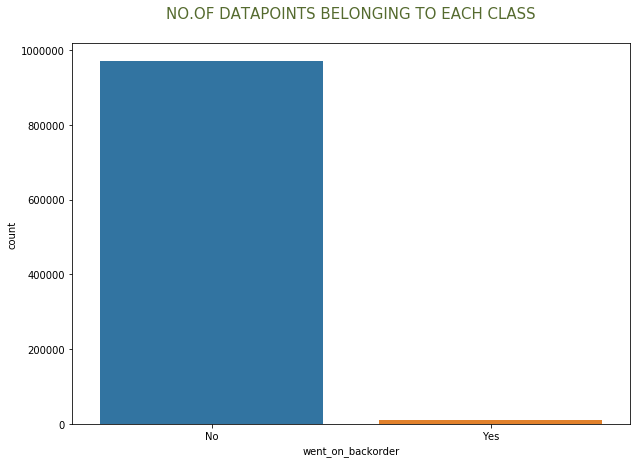

In [37]:
# plotting class distributions
print('No.of data points belonging to each class label::'.upper())
print('-'*52)
print(df.went_on_backorder.value_counts().to_string(),'\n')
plt.figure(figsize=(10,7))
sns.countplot(data=df,x='went_on_backorder');
plt.title('No.of datapoints belonging to each class'.upper(),color='darkolivegreen',fontdict={'fontsize':15},y=1.05)
plt.show()

% of non-backorder items :: 99.0
% of backorder items :: 1.0


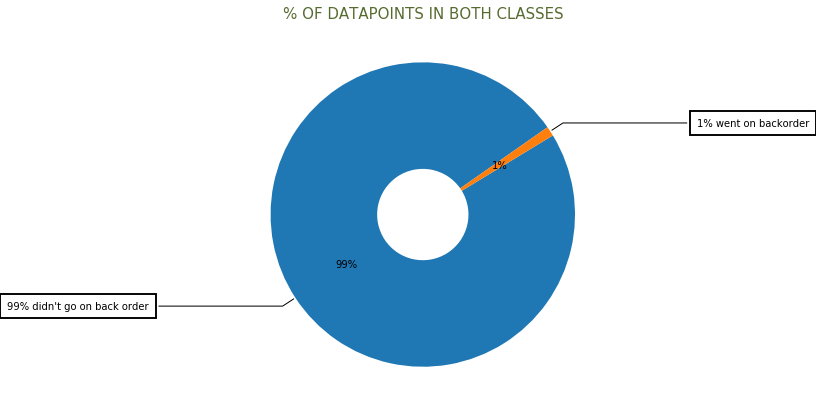

In [38]:
#https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
print('% of non-backorder items ::',round(df.went_on_backorder.value_counts()['No']/df.shape[0],3)*100)
print('% of backorder items ::',round(df.went_on_backorder.value_counts()['Yes']/df.shape[0],3)*100)

fig, ax = plt.subplots(figsize=(8, 7), subplot_kw=dict(aspect="equal"))

wedges,labels,percent = ax.pie(df['went_on_backorder'].value_counts(),autopct='%.0f%%',wedgeprops=dict(width=0.7),startangle=35)
#ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)
text = [str(percent[0].get_text())+' didn\'t go on back order',str(percent[1].get_text())+' went on backorder']
bbox_props = dict(boxstyle="square,pad=0.7", fc="w", ec="k", lw=1.9)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(text[i], xy=(x, y), xytext=(1.80*np.sign(x), 1.1*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title('% of datapoints in both classes'.upper(),y=1,color='darkolivegreen',fontdict={'fontsize':15})
plt.savefig('data_skew.png')
plt.show()


<font color='green'>
<i>
<b>
    
- Based on the above distribution of class labels, Class imbalance seems to be a major issue for the problem, extreme skewness could be observed in the classes. 99% of the  data we have is about the products that didn't go on backorder and only 1% of data is about backorder products. 


In [39]:
def percentiles(column,print_ = False,cdf = False):
    '''plot's percentile values and cdf of the feature'''
    
    percentiles = list(np.percentile(df[column],range(0,110,10)).astype(int))
    if print_:
        print('\n perrcentile values of feature '.upper(),'"',column.upper(),'":\n')
        cols = [str(i*10)+'%le' for i in range(0,11)]
        table = PrettyTable(['percentile','value'])
        for i,j in zip(cols,percentiles):
            table.add_row([i,j])
        print(table)
        
    
    fig,ax = plt.subplots(1,2,figsize=(15,6))
    
    ax[0].plot(range(0,110,10),percentiles,marker = 'H',markersize=8,markerfacecolor='slategrey',color = 'darkblue')
    ax[0].set_xticks(range(0,110,10),[str(i) + '%le' for i in range(0,110,10) ])
    ax[0].set_xlabel('percetile number')
    ax[0].set_ylabel('percentile-value',)
    ax[0].set_title('Percentile line plot')
    
    sns.kdeplot(df[column],cumulative = True,ax = ax[1],color = 'orange')
    ax[1].set_title('Cumulative Density plot')
    fig.suptitle('Percentile plot of '+ column.upper(),fontsize = 'xx-large',color = 'darkolivegreen')
    plt.show()

In [40]:
def percentile0_10(column,forclass = False):
    '''plots the first 10 percentile values of the feature'''
    if forclass == True:
        print(' '*20, 'first 10 percentile values of both Classes')
        print(' '*20,'-'*44,'\n\n')

        print('\tBackorder Products:','\t'*3,'\tNon-backorder Products:')
        print('\t','-'*18,'\t'*4,'-'*23)
        tabs = 3
        for percentile in range(0,11,):
            if percentile == 3:
                tabs = 4
            print('\t',percentile,'%le\t-',round(np.percentile(df[df['went_on_backorder']=="Yes"][column],percentile)),'\t'*tabs,\
                 '\t',percentile,'%le -',round(np.percentile(df[df['went_on_backorder']=="No"][column],percentile)))

    else:
        table = PrettyTable(['Percentile','value'])
        for percentile,value in zip(range(0,11,1),np.percentile(df[column],range(0,11,1)).astype(int)):
            table.add_row([str(percentile)+'%le: ',value])
        print('\n 0-10 percentile values of feature '.upper(),'"',column.upper(),'" :')
        print('-'*55)
        print(table)

In [41]:
def percentile90_100(column):
    '''plots the last 10 percentile values of the feature'''
    table = PrettyTable(['Percentile','value'])
    for percentile,value in zip(range(90,101,1),np.percentile(df[column],range(90,101,1)).astype(int)):
        table.add_row([str(percentile)+'%le: ',value])
    print('\n 90-100 percentile values of feature '.upper(),'"',column.upper(),'" :')
    print('-'*55)
    print(table)

In [42]:
def plot_distributions(column):
    
    '''plot distribution plots histogram and density plots for all numerical features'''
    
    plt.figure(figsize=(12,12))
    plt.subplot(2,2,1)
    plt.hist(df[column],bins = 15,color = 'darkblue')
    plt.xlabel('value')
    plt.ylabel('count')
    plt.title('Histogram of '+column,color = 'k')

    plt.subplot(2,2,2)
    sns.kdeplot(df[column],color = 'darkblue')
    plt.xlabel('value')
    plt.ylabel('density')
    plt.title('Density plot of '+column,color = 'k')

    plt.subplot(2,2,3)
    sns.kdeplot(df[df['went_on_backorder']=='Yes'][column],label = 'Went on Backorder',color = 'darkgreen')
    plt.xlabel('value')
    plt.ylabel('density')
    plt.title('Density plot of '+column,color = 'k')
    plt.legend()

    plt.subplot(2,2,4)
    sns.kdeplot(df[df['went_on_backorder']=='No'][column],label = 'Non Backorder',color = 'darkred')
    plt.xlabel('value')
    plt.ylabel('density')
    plt.title('Density plot of '+column,color = 'k')
    plt.legend()
    plt.tight_layout()
    plt.suptitle('Distribution plots of feature :'+column,color = 'darkolivegreen',fontsize = 16,y = 1.05)
        
    #plt.savefig(column+'numerical_dist.png',dpi = 50)
    plt.show()

In [43]:
def displot(column):
    '''plots density plot, cdf, histogram and boxplot for a given column value'''
    
    fig,ax = plt.subplots(2,2,figsize = (10,8))
    sns.set_style("whitegrid", {'axes.grid' : False})
    
    sns.kdeplot(data = df,x = column,color='darkgreen',ax = ax[0,0]);
    ax[0,0].set_title(column.upper() + ' Density plot',)
    
    sns.ecdfplot(df[column],color = 'orange',ax = ax[0,1])
    ax[0,1].set_title(column.upper() + ' Cumulative Distribution plot',)
    
    sns.histplot(df[column],bins=15,ax = ax[1,0])
    ax[1,0].set_title(column.upper() + ' Histogram')
    
    sns.boxplot(df[column],ax = ax[1,1])
    ax[1,1].set_title(column.upper() + ' Boxplot')
    plt.tight_layout()
    
    fig.suptitle('Distribution plots of '+ column.upper(),fontsize = 'x-large',color = 'darkolivegreen',y=1.1)
    plt.show();

In [44]:
def percetiles_each_class(column):
    '''prints percentiles of each class variable'''
    
    print(' '*20, 'Percentile Values of Both Classes')
    print(' '*20,'-'*34,'\n\n')

    print('\tBackorder Products:','\t'*3,'\tNon-backorder Products:')
    print('\t','-'*18,'\t'*4,'-'*23)
    tabs = 4
    for percentile in range(0,110,10):
        if percentile == 100:
            tabs -= 2

        print('\t',percentile,'%le\t-',np.percentile(df[df['went_on_backorder']=="Yes"][column],percentile),'\t'*tabs,\
             '\t',percentile,'%le -',np.percentile(df[df['went_on_backorder']=="No"][column],percentile))

    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plt.plot(range(0,110,10),\
             df[df['went_on_backorder']=="Yes"][column].quantile(np.array(list(range(0,110,10)))/100),color='orange',\
             marker = 'o',markersize=8,markerfacecolor='slategrey')
    plt.title('BACKORDER PRODUCTS'.upper(),color = 'red')
    plt.xlabel('PERCENTILES')
    plt.ylabel('VALUES')

    plt.subplot(122)
    plt.plot(range(0,110,10),\
             df[df['went_on_backorder']=="No"][column].quantile(np.array(list(range(0,110,10)))/100),\
             marker = 'H',markersize=8,markerfacecolor='slategrey')
    plt.title('NON-BACKORDER PRODUCTS'.upper(),color = 'red')
    plt.xlabel('PERCENTILES')
    plt.ylabel('VALUES')

    plt.show()

In [45]:
def descriptive_stats(column):
    '''prints descriptive statistics of the column given'''
    print('DESCRIPTIVE STATS:')

    table = PrettyTable(['Count','Mean','STD','min','25%le','50%le','75%le','max','skew','kurt'])
    table.add_row([df[column].describe().round(2)['count'],df[column].describe().round(2)['mean'],\
                 df[column].describe().round(2)['std'],df[column].describe().round(2)['min'],df[column].describe().round(2)['25%'],\
                 df[column].describe().round(2)['50%'],df[column].describe().round(2)['75%'],\
                 df[column].describe().round(2)['max'],\
                 round(df[column].skew(),2),
                 round(df[column].kurtosis(),2)])
    print(table)

In [46]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("indigo")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [47]:
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [50]:
def plot_AUC(train_pred,test_pred,y  ):
    
    fpr_test,tpr_test,thresholds_test = roc_curve(y_true=y_test,y_score=test_pred[:,1])
    fpr_train,tpr_train,thresholds_train = roc_curve(y_true=y,y_score=train_pred[:,1])

    precision_train, recall_train, _ = precision_recall_curve(y, train_pred[:,1])
    precision_test, recall_test, _ = precision_recall_curve(y_test, test_pred[:,1])

    print('Train ROC-AUC score for best alpha-value::',round(auc(fpr_train,tpr_train),3),'\n')
    print('Test ROC-AUC score for best alpha-value::',round(auc(fpr_test,tpr_test),3),'\n')

    print('\nTrain PR-AUC score for best alpha-value:: ',round(auc(recall_train, precision_train),3))
    print('Test PR-AUC score for best alpha-value:: ',round(auc(recall_test, precision_test),3))


    plt.figure(figsize=(16,6))

    plt.subplot(121)
    plt.title("ROC-AUC plot")
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.plot(fpr_train,tpr_train,label = 'train-data')
    plt.plot(fpr_test,tpr_test,label = 'test-data')
    plt.legend()

    plt.subplot(122)
    plt.title("PR-AUC plot")
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.plot(recall_train,precision_train,label = 'train-data')
    plt.plot(recall_test,precision_test,label = 'test-data')
    plt.legend()

    plt.show()

    best_t = find_best_threshold(thresholds_train, fpr_train, tpr_train)
    print('\n\t\t\t#####','TRAIN CONFUSION MATRIX','#####')
    plot_confusion_matrix(y_train, predict_with_best_t(train_pred[:,1], best_t))
    print('\t\t\t#####','TEST CONFUSION MATRIX','#####')
    plot_confusion_matrix(y_test, predict_with_best_t(test_pred[:,1], best_t))

In [51]:
def model_interpretabiltiy(test_pred,feat_imp):
    plt.figure(figsize=(12,8))
    plt.bar(range(len(X_train.columns)),feat_imp.values())
    plt.xlabel('FEATURE')
    plt.ylabel('WEIGHT')
    plt.title('FEATURE IMPORTANCES',color = 'red',fontdict={'fontsize':14})
    for i, feat,imp in zip(range(len(feat_imp.keys())),feat_imp.keys(),feat_imp.values()):
        plt.text(i ,imp  , str(feat), color='k', fontstyle='italic',rotation = 90)
    plt.show()
    
    '''test = np.array(test_pred)
    pos_indices = np.where((y_test==1)&(np.argmax(test,axis = 1) == 1))
    index = pos_indices[0]
    
    print('For a product that has been predicted to be Backordered has values of important features as:')
    print('-'*92)
    print('\n',X_test.iloc[index][list(feat_imp.keys())[-10:]].to_string())

    print('\n\n\nTop 5 important Backorder feature values for a product that didnt go on Backorder:')
    print('-'*80)
    print('\n',X_test.iloc[2][list(feat_imp.keys())[-10:]].to_string())'''

In [52]:
from sklearn import preprocessing

def calculte_imp(columns):
    '''returns AUC and PR-AUC of logit model trained on the provided column'''
    
    train, cv,y_train,y_cv = train_test_split(df[columns],df['went_on_backorder'], test_size =0.3, stratify=df['went_on_backorder'])
    
    le = preprocessing.LabelEncoder()
    y_train = le.fit_transform(y_train)
    y_cv = le.transform(y_cv)
    
    scaler = StandardScaler()
    train = scaler.fit_transform(train.values.reshape(-1,1))
    cv = scaler.transform(cv.values.reshape(-1,1))

    alpha = [10 ** x for x in range(-3, 4)] # hyperparam for SGD classifier.

    clf = SGDClassifier(alpha=1, penalty='l2', loss='log')
    clf.fit(train, y_train)

    pred_cv_proba = clf.predict_proba(cv)
        #print(pred_cv[:5])

    fpr, tpr, thresholds = metrics.roc_curve(y_cv, pred_cv_proba[:,1])
    precision_train, recall_train, _ = precision_recall_curve(y_cv, pred_cv_proba[:,1])
    print('for i = ',1)
    print('-'*20)
    print('AUC:: ',round(metrics.auc(fpr, tpr),3))
    print('PR-AUC score ::',round(auc(recall_train, precision_train),3),'\n')
        #best_t = find_best_threshold(thresholds, fpr, tpr)
        #print('\n\t\t\t#####',' CONFUSION MATRIX','#####')
        #plot_confusion_matrix(y_cv, predict_with_best_t(pred_cv_proba[:,1], best_t))
        



## Analysis on Numerical features

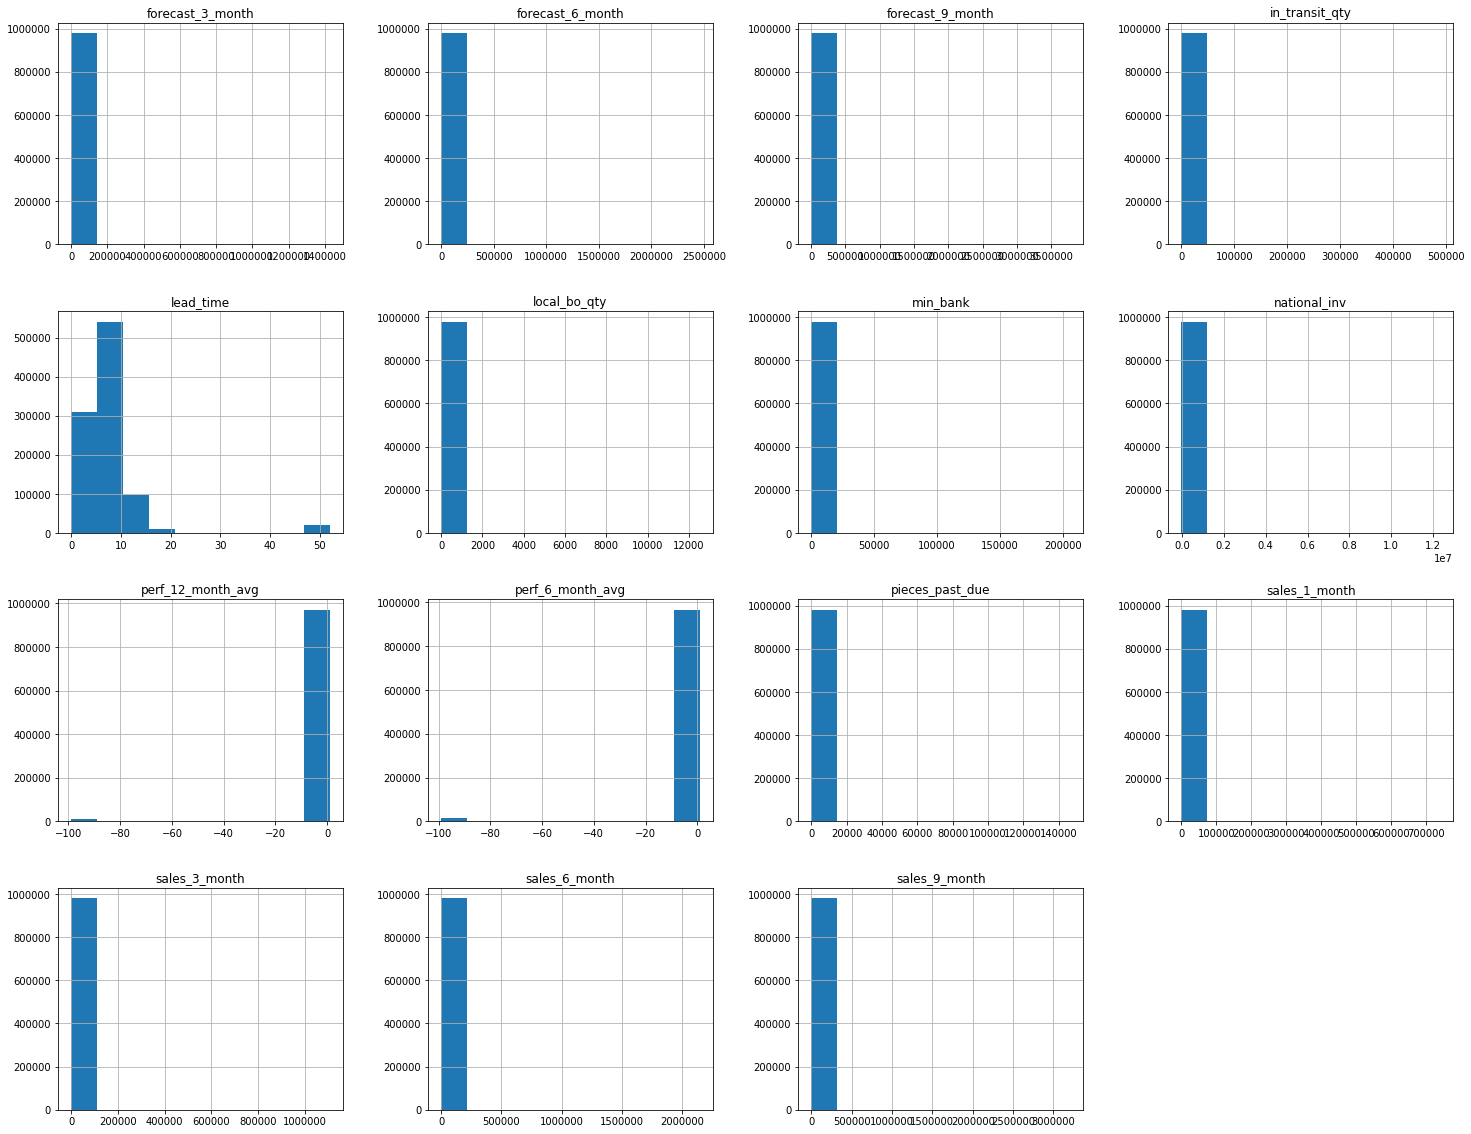

In [53]:
df.hist(figsize=(25,20));

In [54]:
df.describe().applymap('{:,.4f}'.format)

national_inv     lead_time in_transit_qty forecast_3_month  \
count     979,471.0000  979,471.0000   979,471.0000     979,471.0000   
mean          711.2917        7.7110        73.4564         303.6536   
std        38,423.4734        7.1900     1,665.9992       6,594.0192   
min       -27,256.0000        0.0000         0.0000           0.0000   
25%             8.0000        4.0000         0.0000           0.0000   
50%            35.0000        8.0000         0.0000           0.0000   
75%           149.0000        8.0000         4.0000          30.0000   
max    12,334,404.0000       52.0000   489,408.0000   1,427,612.0000   

      forecast_6_month forecast_9_month sales_1_month   sales_3_month  \
count     979,471.0000     979,471.0000  979,471.0000    979,471.0000   
mean          589.1993         865.7564       92.1282        288.8912   
std        12,850.0313      18,863.4919    2,360.2223      6,325.1426   
min             0.0000           0.0000        0.0000          0.0000   
25%             0.0000           0.0000        0.0000          1.0000   
50%             3.0000           7.0000        2.0000          8.0000   
75%            70.0000         110.0000       16.0000         52.0000   
max     2,461,360.0000   3,777,304.0000  741,774.0000  1,105,478.0000   

        sales_6_month   sales_9_month      min_bank pieces_past_due  \
count    979,471.0000    979,471.0000  979,471.0000    979,471.0000   
mean         570.0297        880.5077       85.8645          3.5020   
std       12,315.5705     19,274.8296    1,423.3940        309.8039   
min            0.0000          0.0000        0.0000          0.0000   
25%            3.0000          4.0000        0.0000          0.0000   
50%           17.0000         26.0000        1.0000          0.0000   
75%          106.0000        162.0000       23.0000          0.0000   
max    2,146,625.0000  3,205,172.0000  205,786.0000    146,496.0000   

      perf_6_month_avg perf_12_month_avg  local_bo_qty  
count     979,471.0000      979,471.0000  979,471.0000  
mean           -0.7191           -0.2068        1.0220  
std            12.2273            9.9451       42.5556  
min           -99.0000          -99.0000        0.0000  
25%             0.7300            0.7200        0.0000  
50%             0.8700            0.8600        0.0000  
75%             0.9700            0.9600        0.0000  
max             1.0000            1.0000   12,530.0000

#### By looking at the distributions and statistic description of the numerical features following observations have been made,
--------------------------------------------------------------------------------------------------------------

<font color='green'>
<i>
<b>

- There is a large difference between the 75% and max value for almost all the features  except for lead time & perfromance features, also from the distribution plots we can observe data is stacked at the initial values of the distributions for almost all the features. So data must be skewed with possible outliers.

    
- The minimum value of current inventory level of products is -27256, so this indicates that there are negative inventories in the data. Having negative inventories is a useful information because typically backorders tend to have negative inventory, so this will be helpful in classifying Backorders .

    
- Some products have been given -ve values as performance score, apart from the negative values by looking at the percentile values of the performance scores, 25%le is 0.72 and 100%le value is 1 which could indicate that features have been given scores between 0 to 1.


- Only the lead time feature's distribution appears to have some spread in the data, max value of the feature is 52 which means that there are products that take 52 days to get delivered from the manufacturer once the order is placed by buyer. These products may not have any backorders because no customer will wait for 52 days for their order to get delivered, they can buy it from other competitors where product is available. But we cannot be sure about products with lead_time 52 not having Backorders because we don't know what kind of Business the data is from.
    

- There are 50% of products that doesn't have any forecast sales in the first 3 months, if the forecast is accurate then most of the products might have very few sales or no sales at all in the first 3 months. If there are no sales then there won't be any backorders.

    
- Features 'pieces_past_due' and 'local_bo_qty' have only 0's as values till 75%le, checking all the percentile values will help determine whether the features are important or not.
    
  </b></i>  
</font>

 


 PERRCENTILE VALUES OF FEATURE  " PIECES_PAST_DUE ":

+------------+--------+
| percentile | value  |
+------------+--------+
|    0%le    |   0    |
|   10%le    |   0    |
|   20%le    |   0    |
|   30%le    |   0    |
|   40%le    |   0    |
|   50%le    |   0    |
|   60%le    |   0    |
|   70%le    |   0    |
|   80%le    |   0    |
|   90%le    |   0    |
|   100%le   | 146496 |
+------------+--------+


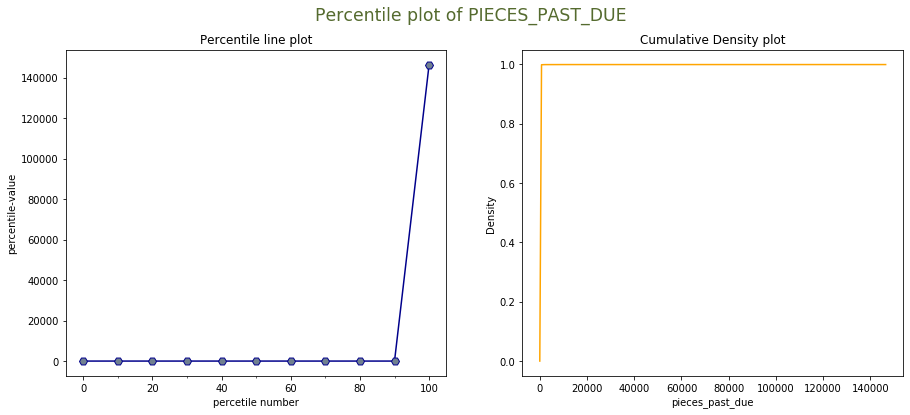


 PERRCENTILE VALUES OF FEATURE  " LOCAL_BO_QTY ":

+------------+-------+
| percentile | value |
+------------+-------+
|    0%le    |   0   |
|   10%le    |   0   |
|   20%le    |   0   |
|   30%le    |   0   |
|   40%le    |   0   |
|   50%le    |   0   |
|   60%le    |   0   |
|   70%le    |   0   |
|   80%le    |   0   |
|   90%le    |   0   |
|   100%le   | 12530 |
+------------+-------+


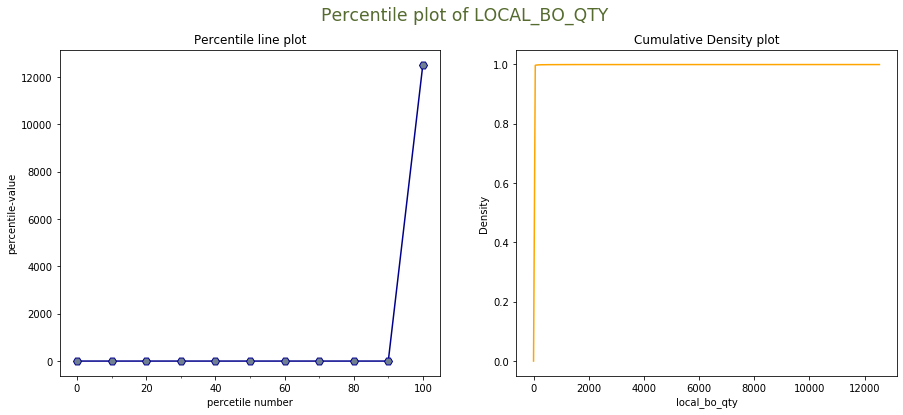

In [55]:
#checking percentile values of pieces_past_due and local_bo_qty
for feature in ['pieces_past_due','local_bo_qty']:
    percentiles(feature,print_=1);

In [56]:
#checking percentile values 90-100 of pieces_past_due and local_bo_qty
for feature in ['pieces_past_due','local_bo_qty']:
    percentile90_100(feature);


 90-100 PERCENTILE VALUES OF FEATURE  " PIECES_PAST_DUE " :
-------------------------------------------------------
+------------+--------+
| Percentile | value  |
+------------+--------+
|  90%le:    |   0    |
|  91%le:    |   0    |
|  92%le:    |   0    |
|  93%le:    |   0    |
|  94%le:    |   0    |
|  95%le:    |   0    |
|  96%le:    |   0    |
|  97%le:    |   0    |
|  98%le:    |   2    |
|  99%le:    |   18   |
|  100%le:   | 146496 |
+------------+--------+

 90-100 PERCENTILE VALUES OF FEATURE  " LOCAL_BO_QTY " :
-------------------------------------------------------
+------------+-------+
| Percentile | value |
+------------+-------+
|  90%le:    |   0   |
|  91%le:    |   0   |
|  92%le:    |   0   |
|  93%le:    |   0   |
|  94%le:    |   0   |
|  95%le:    |   0   |
|  96%le:    |   0   |
|  97%le:    |   0   |
|  98%le:    |   1   |
|  99%le:    |   4   |
|  100%le:   | 12530 |
+------------+-------+


#### Observations from percentile values of local_bo_qty and pieces_past_due: 
------------------------------------------------------------------------

<font color='green'>
<i>
<b>
   
- From the percentile plots and percentile values above,it can be observed that 97% of the products doesn't have any due from the manufacturer and 97% of the products doesn't have any previous backorders.
Since these feature values are just 0's for 97% of the products, features pieces_past_due and local_bo_qty may not provide any information in classifying backorders and can be ignored while training a ML model .


<h3>CHECKING FOR OUTLIERS </h3>

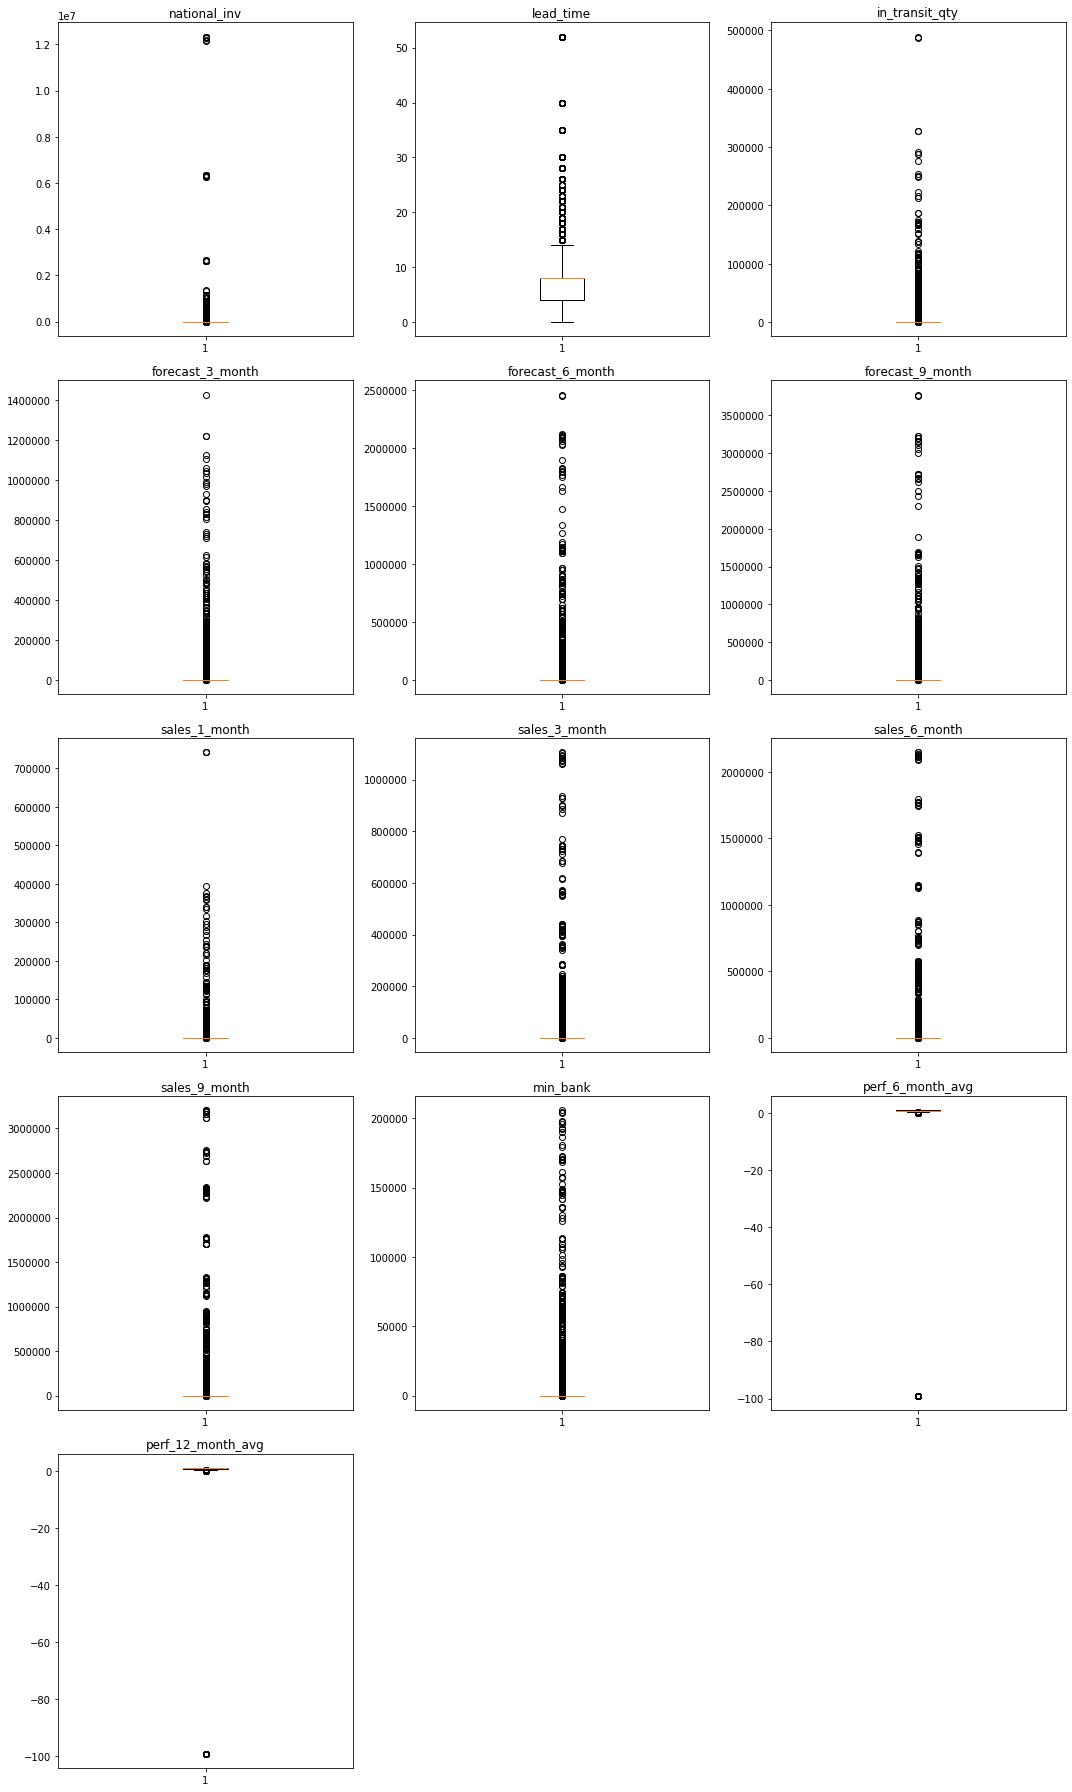

In [57]:
import math

# boxplot of each numerical feature
numerical_cols = df.select_dtypes('number').columns.drop(['local_bo_qty','pieces_past_due'])
rows = math.ceil(len(numerical_cols)/3)
cols = 3
plot_index = 1
plt.figure(figsize=(15,25))
for col in numerical_cols:
    plt.subplot(rows,cols,plot_index)
    plt.boxplot(df[col])
    plt.title(col)
    plot_index+=1
    
plt.tight_layout()
plt.show();


In [58]:
# descriptive stats of each numerical feature

table_outlier = PrettyTable(['feature','min','median','max','skewness','kurtosis','IQR','MAD','std','mean'])

for col in numerical_cols:
    table_outlier.add_row([col.upper(),df[col].min(),df[col].median(),df[col].max(),\
                          round(df[col].skew()),round(df[col].kurtosis()),df[col].quantile(0.75)-df[col].quantile(0.25),\
                          round(df[col].mad()),round(df[col].std()),round(df[col].mean())])
    
print(table_outlier)

+-------------------+----------+--------+------------+----------+----------+-------+--------+---------+-------+
|      feature      |   min    | median |    max     | skewness | kurtosis |  IQR  |  MAD   |   std   |  mean |
+-------------------+----------+--------+------------+----------+----------+-------+--------+---------+-------+
|    NATIONAL_INV   | -27256.0 |  35.0  | 12334404.0 |  268.0   | 79808.0  | 141.0 | 1147.0 | 38423.0 | 711.0 |
|     LEAD_TIME     |   0.0    |  8.0   |    52.0    |   5.0    |   26.0   |  4.0  |  3.0   |   7.0   |  8.0  |
|   IN_TRANSIT_QTY  |   0.0    |  0.0   |  489408.0  |  134.0   | 26468.0  |  4.0  | 127.0  |  1666.0 |  73.0 |
|  FORECAST_3_MONTH |   0.0    |  0.0   | 1427612.0  |  106.0   | 14908.0  |  30.0 | 516.0  |  6594.0 | 304.0 |
|  FORECAST_6_MONTH |   0.0    |  3.0   | 2461360.0  |  106.0   | 14646.0  |  70.0 | 992.0  | 12850.0 | 589.0 |
|  FORECAST_9_MONTH |   0.0    |  7.0   | 3777304.0  |  109.0   | 15727.0  | 110.0 | 1452.0 | 18863.0 | 

#### Observations from Box plots and Descriptive stats of numerical features:
-----------------------------------------------------
<font color='green'>
<i>
<b>

- Skewness and kurtosis values are extremely high for features sales,forecast,recommended stock,intransit qty,performance indicating possible outliers in the data. Also there is a large difference between the values mean & median, std & MAD which supports that there are could be outliers in the data.
    
 
- All the features are postively skewed meaning the tail is on the right side, but for performance features the tail is on the left with a -ve skewness value. From the box plots we could observe that the negative values are outliers.
    
    
- Except for Lead_time all features appears to have exterme skewness which could be outliers, but we can't get to conclusion untill distribution of each variable is examined.
    
  </b></i>  
</font>

 

<h3>CORRELATION BETWEEN FEATURES</h3>

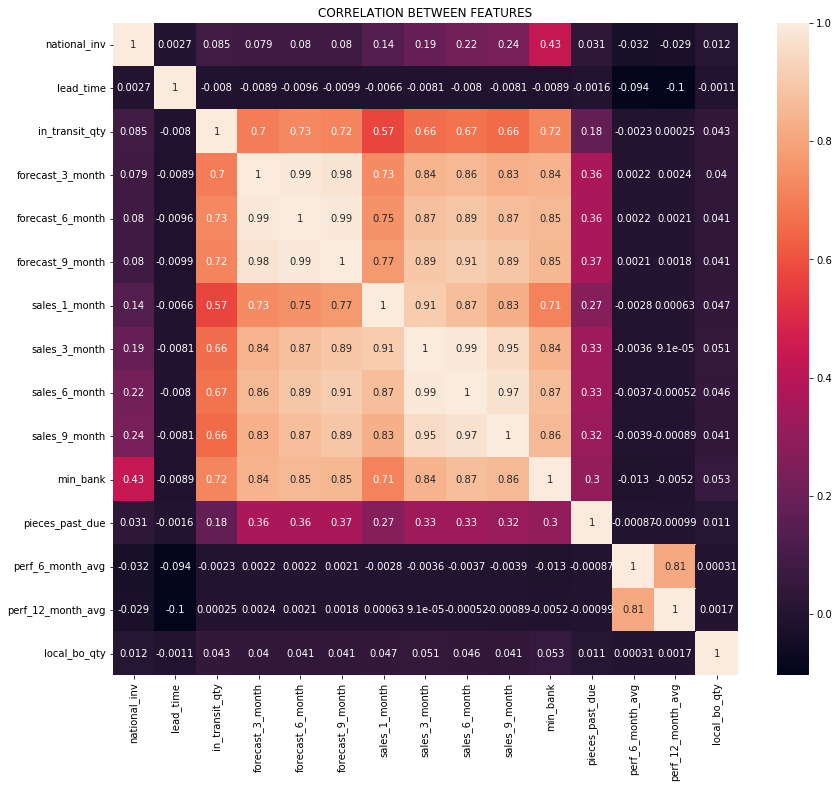

In [59]:
correlation = df.corr()
plt.figure(figsize=(14,12))
sns.heatmap(correlation,annot=True)
plt.title('Correlation between features'.upper())
plt.show()

#### Observations from correlations between numerical features:
-------
<font color='green'>
<i>
<b>

- When the minimum stock recommended for a product is high, we could expect the current inventory level of the product available also to be correspondingly high and if minimum stock recommended is low, current inv will also be low. In the above plots we can clearly observe this as the correlation value between current inventory level and minimum stock has a value of 0.43.

    
- In_transit_qunatity has positive correlation with all forecast features and sales features which indicates that as sales increase quantity of products in transport also increases and it makes sense as products that have higher sales will be reordered more in quantity.

    
- In_transit_qunatity is also positively correlated with minimum stock recommended because products that have higher recommended stock will obviously have higher transit quantity. 

    
- All the forecast features have near perfect correlation with each other and have high positive correlation with sales features. So this indicates the forecast values are good approximates of sales and considering only one forecast feature for further analysis would be enough.

    
- When a product's sales are high the minimum recommended quantity of that product will be high, similarly when sales are low recommended quantity will be less. This is can be seen from the correlation value between sales features and forecast feature with minimum stock recommended. Both sales and forecast features are highly positive correlated with minimum recommended stock. 

    
- We could just include one of the sales feature as all of the sales features are highly correlated to each other with correlation values ~ 1.0 .

    
- Performance features also have high correlation with each other, including one of the performance feature would be sufficient for further analysis and model training.
    
  </b></i>  
</font>

 



## Analysis on feature: national_inv (Current Inventory level of component)

Current Inventory level of component refers to the amount of stock that is present at the retailer. 

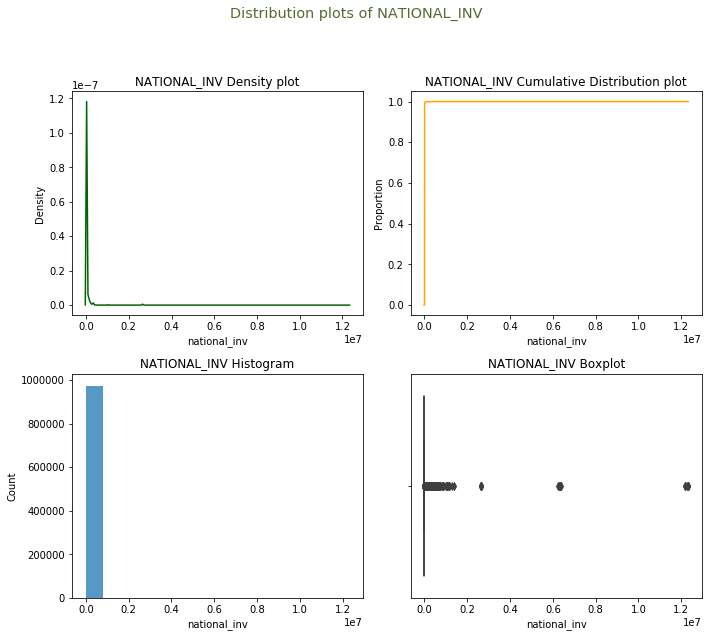

In [60]:
displot('national_inv')

#### observations from the plots:
-----

<font color='green'>
<i>
<b>

- As already observed from the skewness and kurtosis values, we can also see from the distribution plot that the feature is extremely skewed with large tail on the right side and with most of the product's inventory lying at the initial values. Feature seems to have some extreme values which could be the cause of skewness.
    

- Feature's distrbution could be exponential or pareto based on the appearence of the distribution. We could check the features distribution and convert it into a normal distribution if necessary. 
    
    
- We could not get much information from the box-plot and the CDF of the feature, CDF shows nearly 100% of data lying at the intial values.


 PERRCENTILE VALUES OF FEATURE  " NATIONAL_INV ":

+------------+----------+
| percentile |  value   |
+------------+----------+
|    0%le    |  -27256  |
|   10%le    |    3     |
|   20%le    |    6     |
|   30%le    |    11    |
|   40%le    |    19    |
|   50%le    |    35    |
|   60%le    |    61    |
|   70%le    |   108    |
|   80%le    |   213    |
|   90%le    |   566    |
|   100%le   | 12334404 |
+------------+----------+


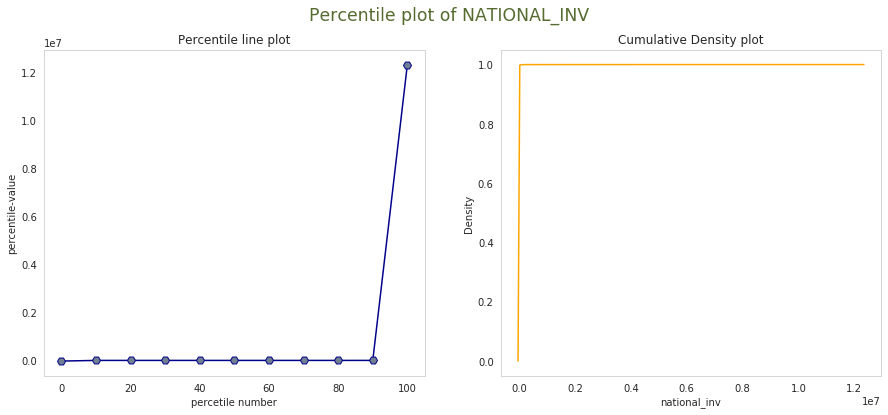

In [61]:
percentiles('national_inv',print_ = 1)

#### observaions from the percentiles:
-------

<font color='green'>
<i>
<b>
    
- As already observed from the statistic description of numerical features, 0%le(min value) is a negative value indicating negative inventory. Backorders are one of the cause for inventory values to get below zero(negative inventories), so presence of negative inventories in the data could help classifying the Backorders.
    
    
- The maximum value of current inventory level of a product is ~12.4 million units which seems to be an error value because there is no chance of keeping a stock of 12 million units for a product even though the product has extreme sales. Moreover the 90%le value is only 566, so this must be an error value.

In [62]:
print('There are',sum(df['national_inv'] < 0),'negative inventories in the data, among them',\
      len(df[(df['national_inv'] < 0) & (df['went_on_backorder'] == 'Yes')]),'are backorder products, which is',\
      round(len(df[(df['national_inv'] < 0) & (df['went_on_backorder'] == 'Yes')])/len(df[df['went_on_backorder']=='Yes']) * 100),
     '% of all the backorders in the data.\n')
print('-'*55)
percentile90_100('national_inv')



There are 5130 negative inventories in the data, among them 793 are backorder products, which is 8 % of all the backorders in the data.

-------------------------------------------------------

 90-100 PERCENTILE VALUES OF FEATURE  " NATIONAL_INV " :
-------------------------------------------------------
+------------+----------+
| Percentile |  value   |
+------------+----------+
|  90%le:    |   566    |
|  91%le:    |   655    |
|  92%le:    |   768    |
|  93%le:    |   914    |
|  94%le:    |   1103   |
|  95%le:    |   1410   |
|  96%le:    |   1872   |
|  97%le:    |   2652   |
|  98%le:    |   4207   |
|  99%le:    |   7868   |
|  100%le:   | 12334404 |
+------------+----------+


#### observaions from the percentiles 90-100:
-------


<font color='green'>
<i>
<b>
    
- 8% of the backorder data has negative inventories, so negative inventory will be  a key aspect in predicting Backorders.
    
    
- 100th %le value of the feature is a lot different than the 99th %le indicating that 100th %le is an outlier, so we will be considering only the values below 99th %le.

In [63]:
#removing values greater than 99%le
df = df[df['national_inv'] < np.percentile(df['national_inv'],99)]


 PERRCENTILE VALUES OF FEATURE  " NATIONAL_INV ":

+------------+--------+
| percentile | value  |
+------------+--------+
|    0%le    | -27256 |
|   10%le    |   2    |
|   20%le    |   6    |
|   30%le    |   11   |
|   40%le    |   19   |
|   50%le    |   34   |
|   60%le    |   59   |
|   70%le    |  103   |
|   80%le    |  200   |
|   90%le    |  503   |
|   100%le   |  7868  |
+------------+--------+


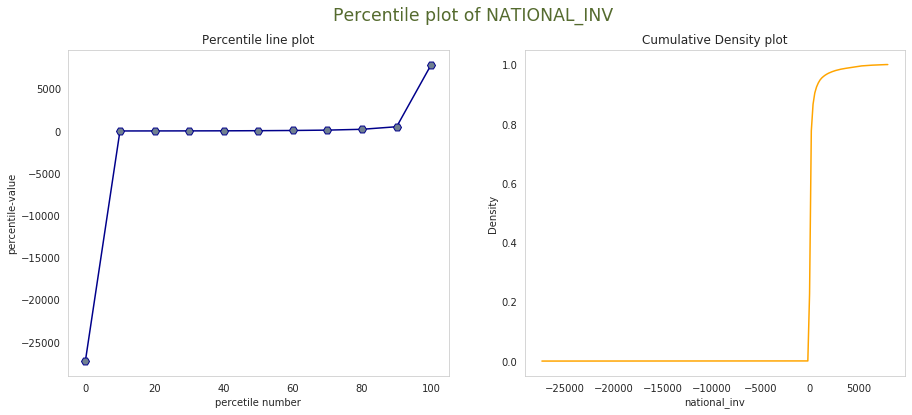

In [64]:
percentiles('national_inv',print_=1)

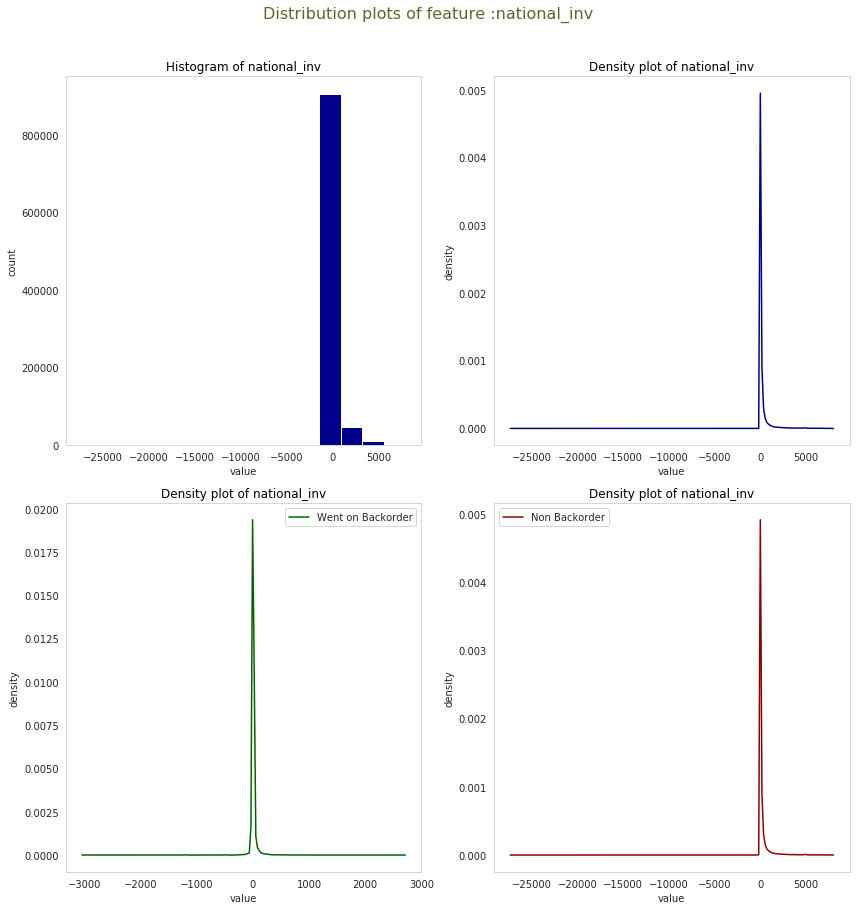

In [65]:
plot_distributions('national_inv')

In [66]:
df['national_inv'].describe()

count    969676.000000
mean        240.909786
std         715.959040
min      -27256.000000
25%           8.000000
50%          34.000000
75%         141.000000
max        7868.000000
Name: national_inv, dtype: float64

#### observations :
-------

<font color='green'>
<i>
<b>
    
- The distribution of the feature changed after removing extreme values, distribution looks like it has less spread which is because IQR of the feature is just 133 while max value is 7868 and min value is -27256. Data still has some values that are much larger than the rest.
    
    
- From the above plots we can see there is a difference in maximum and minimum values of backorder and non-backorder products.Max value appears to be 3000 for the backorder products and 5000 for non-backorder products so we could say that products with national_inv > 3000 are non-backorders. Same for the minimum values, -3000 for backorders and -25000 from non-backorders,so we can say if national_inv<-3000 it is a non-backorder

<p style="font-size:18px;"> <b>Q.</b> How important 'Current Inventory' feature is for predicting Backorders?</p>
     
    - Generally we get backorders on a product when there is no stock available and an order gets placed, this means that when we have 0 inventory and still take orders. When an order gets placed even though there is no stock, inventory value becomes negative. So the chances of backorders is high when inventory is 0 or a -ve value.

    - Another case where a business could have backorders is when the business takes orders that require more quantity than the stock available in the inventory. This could possibly happen when the inventory available is less than minimum recommended stock.

        
        
  <i>      
-  We could check the above cases by further investigating on the zero and negative inventory values.

In [67]:
print('Que) What % of Backorders are present in the data when feature value is less than equal to 0?\n')
print('Ans)',round(df[df['national_inv'] == 0]['went_on_backorder'].value_counts()['Yes']/sum(df['went_on_backorder'] == 'Yes') * 100),'% of backorders in the data are due to inventory level less than equal to 0\n')
print('-'*110)
print('\nQue) Does having inventory less than minimum recommended stock have any effect on backorders?\n')
print('Ans) When compared to the overall backorders in the data, there are',\
      round(df[df['national_inv']<df['min_bank']]['went_on_backorder'].value_counts()['Yes']/sum(df['went_on_backorder'] == 'Yes')*100 )\
      ,'% of products that went on backorder when current inventory is less than recommended stock units.')

Que) What % of Backorders are present in the data when feature value is less than equal to 0?

Ans) 32.0 % of backorders in the data are due to inventory level less than equal to 0

--------------------------------------------------------------------------------------------------------------

Que) Does having inventory less than minimum recommended stock have any effect on backorders?

Ans) When compared to the overall backorders in the data, there are 34.0 % of products that went on backorder when current inventory is less than recommended stock units.


#### observations:
-------


<font color='green'>
<i>
<b>
    
- 32% of overall backorders are caused when the current inventory is less than equal to 0 and for Non-Backorders only 4% of the data is less than 0, so if we say all the products with negative inventories will get Backorders then we would classify 32% of Backorders accurately. Binning the values less than 0 as one category will be very helpful in better prediction of Backorders.
    
 
- Looking at all the products that went on Backorder, there are 34% of Products that have current inventory less than the minimum stock recommended. So creating a categorical feature with categories YES for products with current inventory less than minimum stock and NO for current inventory greater minimum stock could help in predicting 34% of bakorders.  

                     Percentile Values of Both Classes
                     ---------------------------------- 


	Backorder Products: 			 	Non-backorder Products:
	 ------------------ 				 -----------------------
	 0 %le	- -2999.0 				 	 0 %le - -27256.0
	 10 %le	- 0.0 				 	 10 %le - 3.0
	 20 %le	- 0.0 				 	 20 %le - 6.0
	 30 %le	- 0.0 				 	 30 %le - 11.0
	 40 %le	- 1.0 				 	 40 %le - 19.0
	 50 %le	- 1.0 				 	 50 %le - 35.0
	 60 %le	- 3.0 				 	 60 %le - 60.0
	 70 %le	- 5.0 				 	 70 %le - 105.0
	 80 %le	- 8.0 				 	 80 %le - 203.0
	 90 %le	- 20.0 				 	 90 %le - 509.0
	 100 %le	- 2669.0 		 	 100 %le - 7868.0


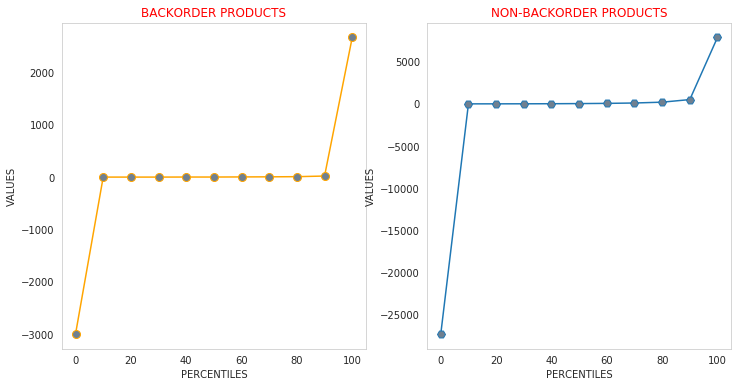

In [68]:
percetiles_each_class('national_inv')

In [69]:
# checking the first 10 percentiles to see how many negative values are there in the data

percentile0_10('national_inv',forclass=1)

                     first 10 percentile values of both Classes
                     -------------------------------------------- 


	Backorder Products: 			 	Non-backorder Products:
	 ------------------ 				 -----------------------
	 0 %le	- -2999.0 			 	 0 %le - -27256.0
	 1 %le	- -66.0 			 	 1 %le - 0.0
	 2 %le	- -23.0 			 	 2 %le - 0.0
	 3 %le	- -9.0 				 	 3 %le - 0.0
	 4 %le	- -4.0 				 	 4 %le - 0.0
	 5 %le	- -3.0 				 	 5 %le - 1.0
	 6 %le	- -1.0 				 	 6 %le - 1.0
	 7 %le	- -1.0 				 	 7 %le - 2.0
	 8 %le	- 0.0 				 	 8 %le - 2.0
	 9 %le	- 0.0 				 	 9 %le - 2.0
	 10 %le	- 0.0 				 	 10 %le - 3.0


In [70]:
print('No.of datapoints in Backorder products with negative inventory:',df[(df['went_on_backorder'] == 'Yes') & (df['national_inv']<0)].shape[0])
print('No.of datapoints in Backorder products with negative inventory:',df[(df['went_on_backorder'] == 'No') & (df['national_inv']<0)].shape[0])

No.of datapoints in Backorder products with negative inventory: 793
No.of datapoints in Backorder products with negative inventory: 4337


In [71]:
pred = df['national_inv'].apply(lambda x : 'Yes' if (x > -3000 and x < 20) else 'No')

y_true = df['went_on_backorder']
y_pred = pred

matrix = confusion_matrix(y_true, y_pred)
neg_acc,pos_acc = matrix.diagonal()/matrix.sum(axis=1)

print('"If we were to say that all the products with current inv less than 20 are Backorders, then we will get',\
     round(neg_acc*100), '% accuracy on Non-Backorder products and',round(pos_acc*100),'% accuracy on Backorder products"')

"If we were to say that all the products with current inv less than 20 are Backorders, then we will get 60.0 % accuracy on Non-Backorder products and 90.0 % accuracy on Backorder products"


In [72]:
df[df['national_inv'] == 0]['went_on_backorder'].value_counts()

No     34917
Yes     3203
Name: went_on_backorder, dtype: int64

#### observations :
-------


<font color='green'>
<i>
<b>
    
- The percentile values of Backorder products and Non-Backorder products vary significantly, percentiles of Backorders are much lesser than Non-Backorders.
    
    
- For 90% of the backorder products the inventory level is less than equal to 20, where as 40% of non-Backorders have inventory less than 20. If we were to say all the products with less than 20 inventory will go to backorders,  we will be 90% accurate on predicting Backorders and 60% accurate in predicting non-Backorders. But 40% of non-Backorders will be wrongly predicted as Backorders which is greater than 300K products.
    
    
- So we can't say that all products that have inventory less than 20 are Backorders, but current inventory less than 20 could have an interaction with some other feature which could help in better classification of Backorders and Non-Backorders.
    
    
- 8% of Backorders have negative inventory, where as less than 1% of Non-Backorders have negative inventory. We could say probability of negative inventory being backorders is high, but we should consider the class imbalance here because there are only 793 negative inventory datapoints in backorder data where as Non-Backorders have 4337 negative inventory values.
    
    
- So, due to class imbalance model may not identify the higher probabilty of negative inventory being a backorder, balancing the data might help in this situation.
    
    
    

In [73]:
# training a logit model on only current inventory feature to check correlation with class variable
calculte_imp('national_inv')

for i =  1
--------------------
AUC::  0.855
PR-AUC score :: 0.079 



<p style="font-size:18px;"> <b>Q.<font color = 'darkblue'> <i>Will 'Current Inventory' feature be useful for building a good ML model?</i></p>
   
 
    - Training a logit model with just Current Inventory lead to an AUC of 0.85. So we can easily say Current Inventory will be very useful in building a ML model that predicts Backorders.

<h2> Analysis on feature:Lead time</h2>


Transit time is the total time it takes for goods to get from Point A to Point B.

In [74]:
df['lead_time'].describe()

count    969676.000000
mean          7.696529
std           7.148469
min           0.000000
25%           4.000000
50%           8.000000
75%           8.000000
max          52.000000
Name: lead_time, dtype: float64

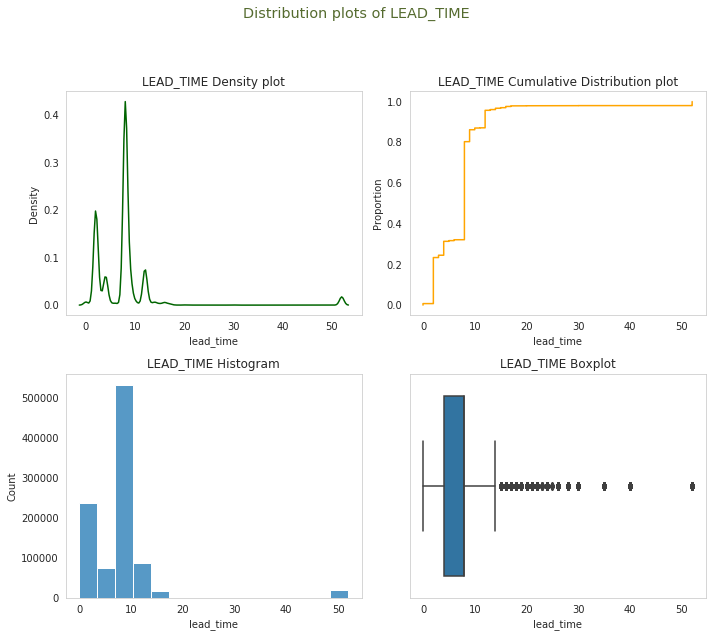

In [75]:
displot('lead_time')

#### observations:
----
<font color='green'>
<i>
<b>
  
- Lead time is a discrete variable with minimum lead time being 0 days and maximum being 52 days. Min value being 0 tells us that there are products that take 0 days to get delivered from the manufacturer. Most probably products with lead time 0 may not have any backorders.
    

- From the density plot and histogram we could observe that there are more than 500000 products whose lead time is between 7 and 10 days which is more than 51% of the data, 200000 products have lead time between 0 and 3 days which 20% of the data. So, more than 70% of the products have lead time between 0-10 days.
    
    
- From the CDF it appears that 90% of the products will be delivered in less than 20 days to the buyer. But there are also some products that have lead time greater than 20 days, these values appears to be outliers from the boxplot. If there are no backorders when lead time is above 20 days, we could remove those datapoints.
   
   

In [76]:
print('\nThere are',df[df['lead_time'] > 20].shape[0],'products that have lead time greater than 20 days, among them',\
      df[(df['lead_time']>20) &( df['went_on_backorder']=='Yes')].shape[0],'are backorders.\n')

print('-'*100)

print('\nThere are',df[df['lead_time'] == 52].shape[0],'products that have lead time 52 days, among them',\
      df[(df['lead_time'] == 52) &( df['went_on_backorder']=='Yes')].shape[0],'are backorders.\n')

print('-'*100)

print('\nThere are',df[(df['lead_time'] == 0)].shape[0],'products that have lead time 0 days, among them'\
      ,df[(df['lead_time'] == 0) & (df['went_on_backorder'] == 'Yes')].shape[0], 'are backorders')


There are 19882 products that have lead time greater than 20 days, among them 17 are backorders.

----------------------------------------------------------------------------------------------------

There are 19128 products that have lead time 52 days, among them 17 are backorders.

----------------------------------------------------------------------------------------------------

There are 7238 products that have lead time 0 days, among them 151 are backorders


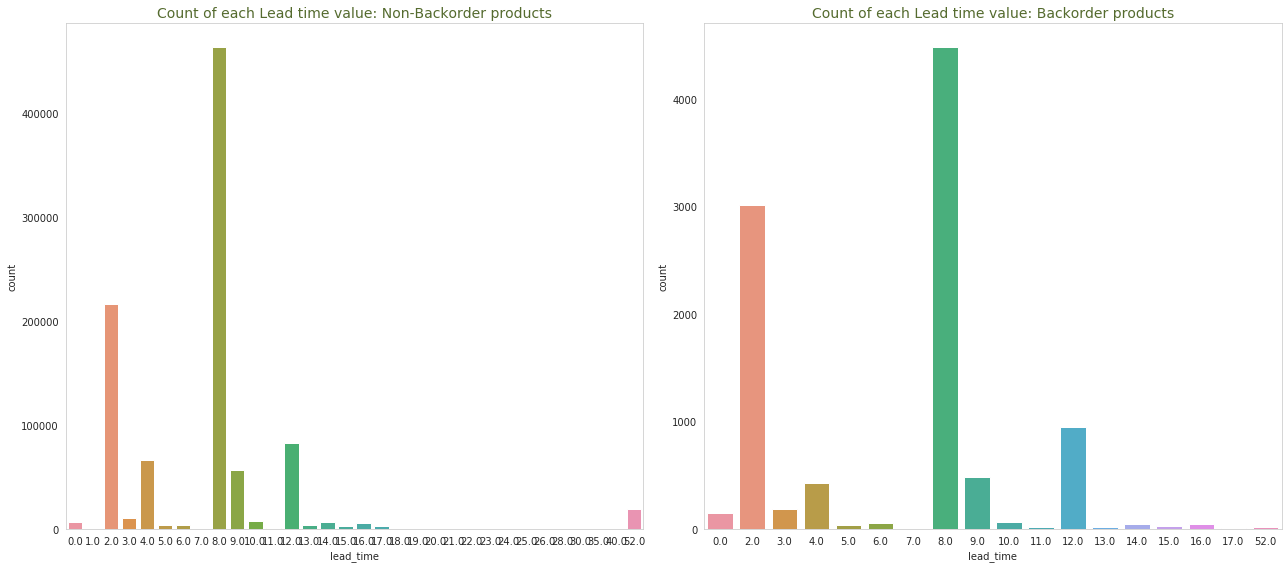

In [77]:
#count plot of lead time for each class
fig,ax = plt.subplots(1,2,figsize = (18,8))
sns.countplot(data = df[df['went_on_backorder'] == 'No'],x= 'lead_time',ax = ax[0]);
ax[0].set_title('Count of each Lead time value: Non-Backorder products',fontdict={'fontsize':14}, color = 'darkolivegreen')

sns.countplot(data = df[df['went_on_backorder'] == 'Yes'],x= 'lead_time',ax = ax[1]);
ax[1].set_title('Count of each Lead time value: Backorder products',fontdict={'fontsize':14}, color = 'darkolivegreen')
plt.tight_layout()
plt.show()

In [78]:
print('There are',round((df[df['lead_time'] == 8].shape[0]/df.shape[0])*100),'% of data that have Lead time 8 days.')
print('There are',round((df[df['lead_time'] == 2].shape[0]/df.shape[0])*100),'% of data that have Lead time 2 days.')

There are 48 % of data that have Lead time 8 days.
There are 23 % of data that have Lead time 2 days.


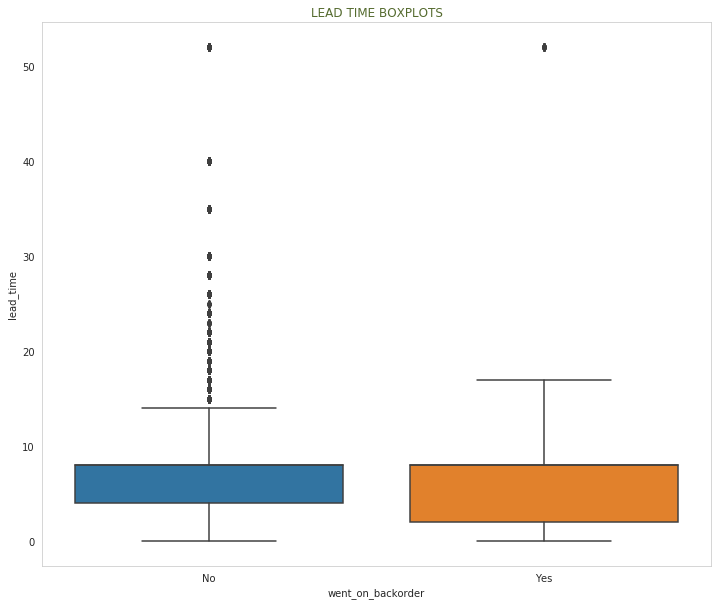

In [79]:
plt.figure(figsize=(12,10))
sns.boxplot(x="went_on_backorder", y="lead_time", data=df,order=["No", "Yes"])
plt.title('Lead time boxplots'.upper(),color='darkolivegreen')
plt.show()

#### observations:
-------

<font color='green'>
<i>
<b>

-  From the count plots we can observe that 48% of the products have lead time 8 days and 23% of the products have lead time 2 days, both comprise 70% of the whole data.
    
    
- There are 19882 products that have lead time greater than 20 days, among them 17 products are backorders and all of those 17 backorder products have lead time of 52 days. So there aren't any Backorders between the values 20 and 52, this could be useful information for seperating out Non-Backorders from Backorders.

    
- There are 7238 products that have lead time 0 days, among them 151 are backorders. So there is a possibility of backorders when lead time is 0 days.
    

- There is no difference we could find from boxplots and count plots of the two different classes, Lead time of both Backorder products and Non-Backorder product appears to have same distribution.

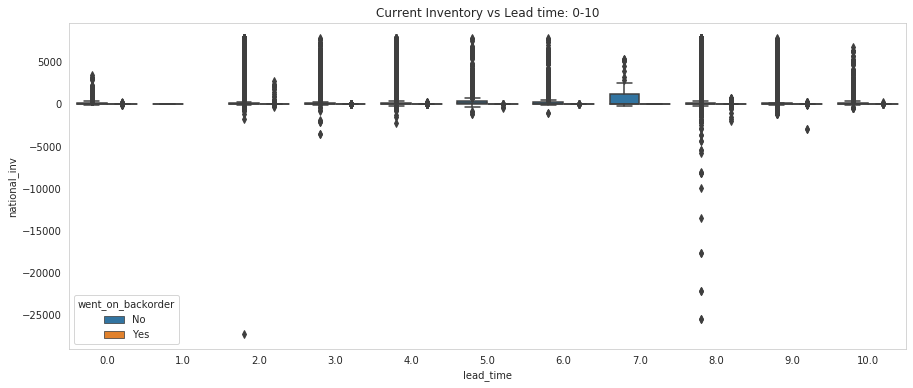

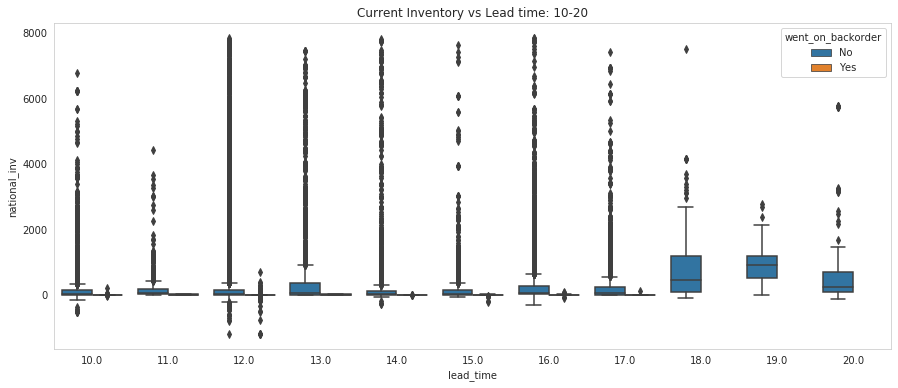

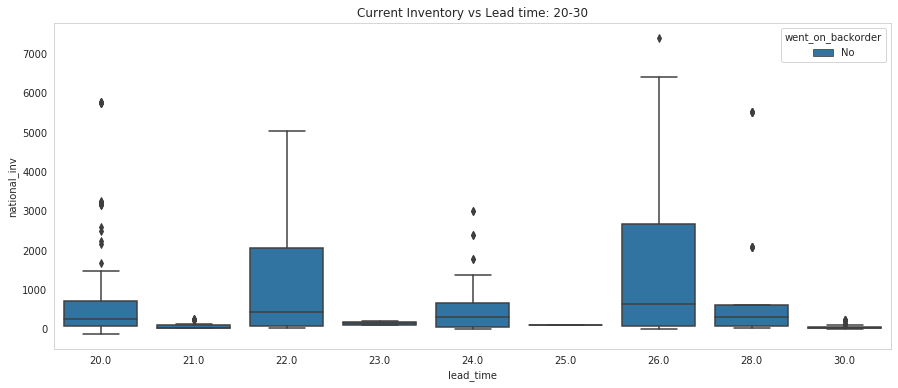

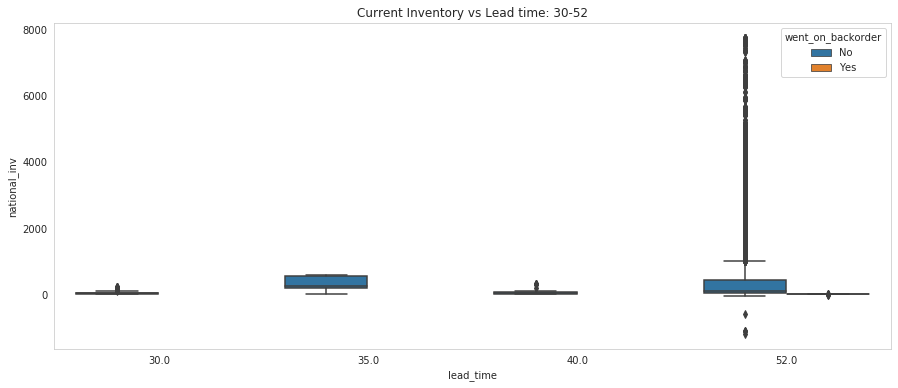

In [80]:
#checking interaction between current inventory and lead time
start_ind = 0
end_ind = 10
for _ in range(int(np.ceil(len(df['lead_time'].unique())/10))):
    
    if start_ind == 30:
        end_ind = 52
    
    plt.figure(figsize=(15,6))
    sns.boxplot(data = df[(df['lead_time']>=start_ind) & (df['lead_time']<=end_ind)],x = 'lead_time',y = 'national_inv',hue = 'went_on_backorder')
    plt.title('Current Inventory vs Lead time: '+str(start_ind)+'-'+str(end_ind))
    plt.show()
    start_ind = end_ind
    end_ind += 10

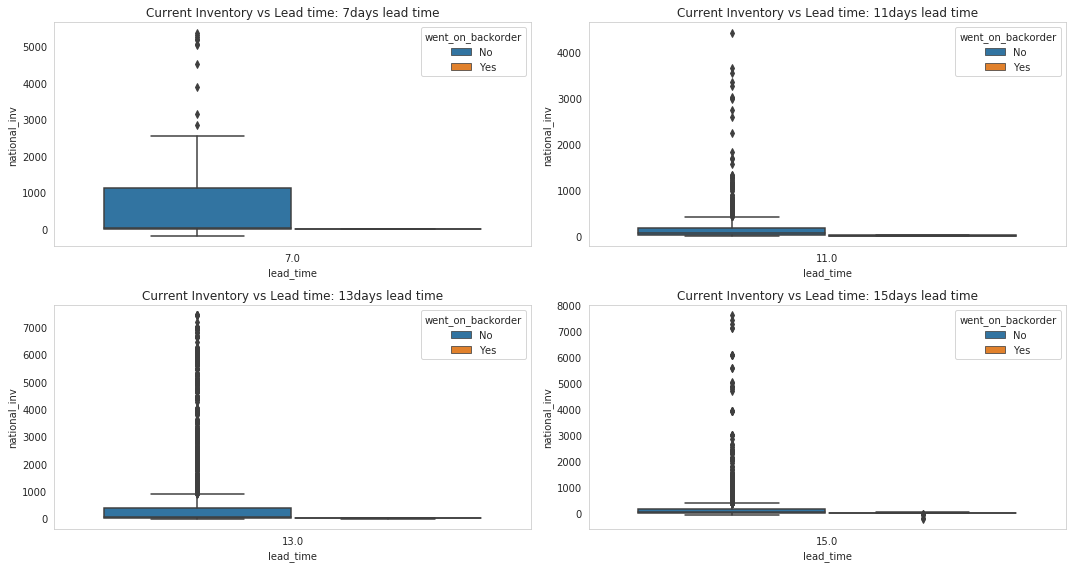

In [81]:
rows = 2
cols = 2
plot_index = 1
plt.figure(figsize=(15,8))
for lead_time in [7,11,13,15]:
    plt.subplot(rows,cols,plot_index)
    sns.boxplot(data = df[df['lead_time']==lead_time],x = 'lead_time',y = 'national_inv',hue = 'went_on_backorder')
    plt.title('Current Inventory vs Lead time: '+str(lead_time)+'days lead time')
    plot_index+=1
    
plt.tight_layout()
plt.show();

#### observations:
----
<font color = 'green'>
    <b>
        <i>

- From the above boxplots between lead time and current inventory, range of current inventory values are high for NOn-Backorders when lead time is 7,11,13,15. This could be useful in seperating out Non-Backorders from Backorders.
 
            
- As already observed there no Backorders when lead time is greater than equal to 18 and less than 52 which will also be useful for the classification of Non-Backorders from Backorders.

<p style="font-size:18px;"> <b>Q.</b> How important 'Lead Time' feature is for predicting Backorders?</p>
     
- In the real world if a product has longer lead time retailer will try to keep more units in stock to avoid Backorders. That is the reason we didn't observe many Backorders when lead time is greater than 17, a Business will take Backorders mostly if they knew the lead time is short. 


- So for a Business to accept Backorders, products should have shorter lead time. But this doesn't mean only products that run into backorders have shorter lead time Non-Backorders can also have shroter lead time and that is the reason there is no difference between lead time of Backorders and Non-Backorders. So we can't really make a decision just based on lead time. 


- For shorter lead time, inventory for backorders are less compared to Non-backorders and inventory is 0 for bacckorders if lead time is greater than 17 which shows some interaction with the current inventory level feature. This interaction could be useful for predicting Backorders.
    
    
- Lead time could be helpful in creating a new feature "Lead Time Demand" which is a measure of customer demand for a particular product during the lead time. Lead Time demand could be helpful in predicting backorders because higher demand for a product implies higher chances of Backorders.


- So based on the analysis above, lead time could be useful when combined with other features. Building a model with Lead time could help futher in determining whether the feature is important or not.


In [82]:
#training a logit model on this feature alone to see how useful it could be for classification
calculte_imp('lead_time')

for i =  1
--------------------
AUC::  0.547
PR-AUC score :: 0.022 



<p style="font-size:18px;"> <b>Q.<font color = 'darkblue'> <i>Will 'Lead Time' feature be useful for building a good ML model?</i></p>
   
 
    - Training a logit model with just lead time gave an AUC of 0.55 which is same as a random model. Feature alone may not be helpful in classifying Backorders but can be helpful in presence of other features.

<h2> Analysis on feature: In transit quantity </h2>

goods or supplies that has already been shipped from the supplier’s warehouse but not yet delivered to the buyer

In [83]:
descriptive_stats('in_transit_qty')

DESCRIPTIVE STATS:
+----------+-------+--------+-----+-------+-------+-------+----------+--------+---------+
|  Count   |  Mean |  STD   | min | 25%le | 50%le | 75%le |   max    |  skew  |   kurt  |
+----------+-------+--------+-----+-------+-------+-------+----------+--------+---------+
| 969676.0 | 40.59 | 451.79 | 0.0 |  0.0  |  0.0  |  4.0  | 186624.0 | 181.45 | 61052.2 |
+----------+-------+--------+-----+-------+-------+-------+----------+--------+---------+


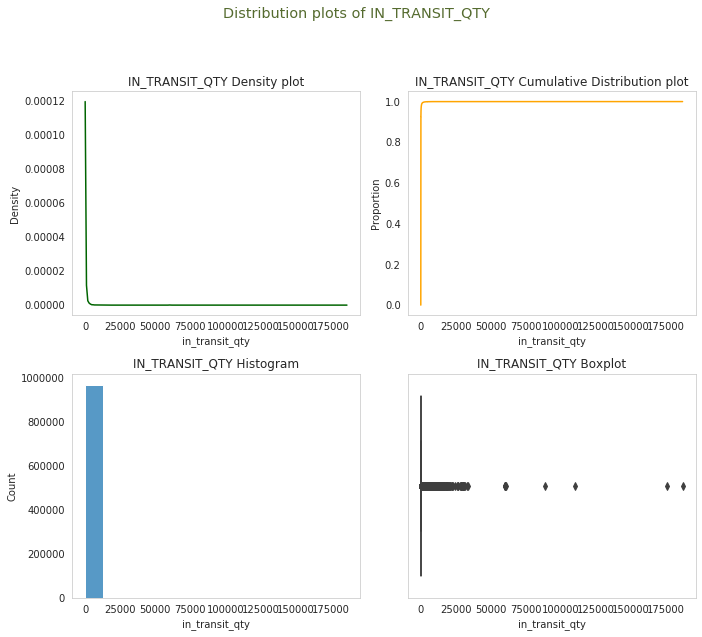

In [84]:
displot('in_transit_qty')

#### observations:
----

<font color = 'green'>
    <b>
        <i>
            
- As already observed 50%le of the feature is 0, which says that there is no quantity intransit for 50% of the products.
            
            
- From the descriptive stats and plots we could see that the feature is extremely skewed to the right with skewness value 181. We could see almost all the values lie at intial values. Also there is a large difference between 75% and 100% value of the feature, the difference is 186620, this indicates that feature has some extreme values which could possibly be outliers.
            


 PERRCENTILE VALUES OF FEATURE  " IN_TRANSIT_QTY ":

+------------+--------+
| percentile | value  |
+------------+--------+
|    0%le    |   0    |
|   10%le    |   0    |
|   20%le    |   0    |
|   30%le    |   0    |
|   40%le    |   0    |
|   50%le    |   0    |
|   60%le    |   0    |
|   70%le    |   1    |
|   80%le    |   9    |
|   90%le    |   48   |
|   100%le   | 186624 |
+------------+--------+


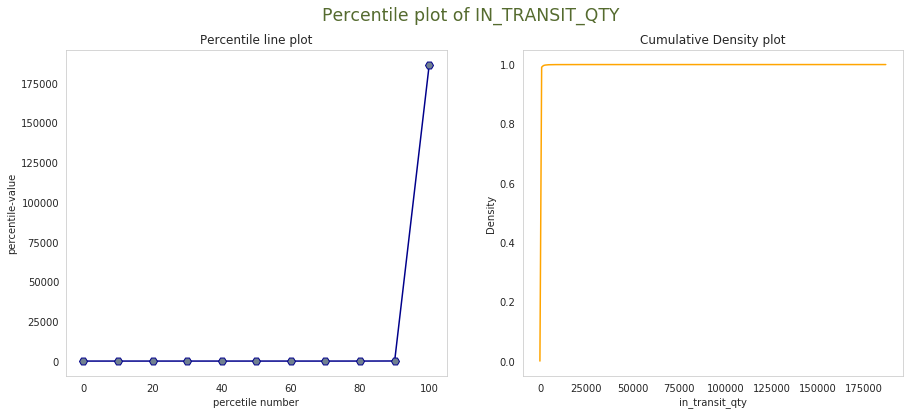

In [85]:
percentiles('in_transit_qty',print_=True)

In [86]:
percentile90_100('in_transit_qty')


 90-100 PERCENTILE VALUES OF FEATURE  " IN_TRANSIT_QTY " :
-------------------------------------------------------
+------------+--------+
| Percentile | value  |
+------------+--------+
|  90%le:    |   48   |
|  91%le:    |   57   |
|  92%le:    |   70   |
|  93%le:    |   86   |
|  94%le:    |  107   |
|  95%le:    |  138   |
|  96%le:    |  186   |
|  97%le:    |  259   |
|  98%le:    |  402   |
|  99%le:    |  769   |
|  100%le:   | 186624 |
+------------+--------+


#### observations:
----

<font color = 'green'>
<b>
<i>
  
- 80%le value of the feature is '9' indicating that 80% of the products have less than 10 units in transit, among them 60% doesn't have any quantity in transit.
    
    
- As like the current inventory feature in transit qty also has a spike in value after the 99%le. 99%le of values lie below 769 but 100%le is 186624 which could be an erroneous point. We will only consider the products with in transit less than 99%le which is 769. 
    


In [87]:
#inclding only the values that are less than 90%le value

df = df[df['in_transit_qty']<=769]
df.shape

(959979, 22)

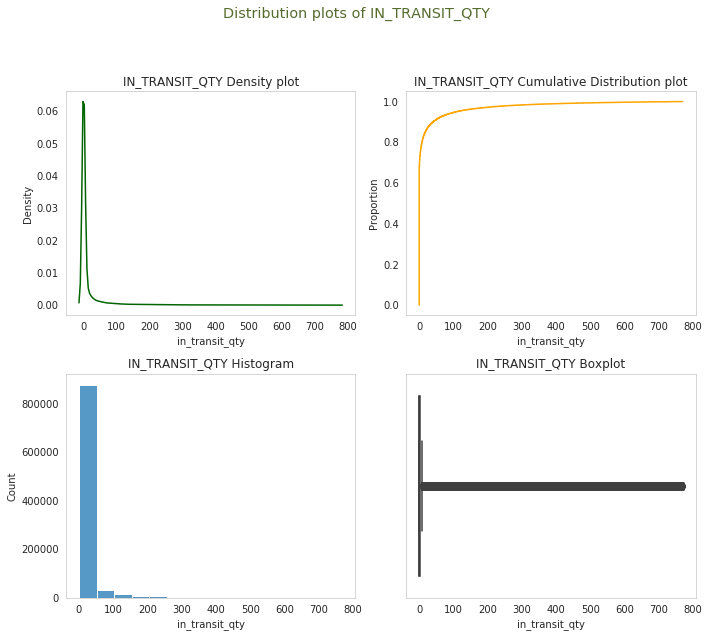

In [88]:
displot('in_transit_qty')

                     Percentile Values of Both Classes
                     ---------------------------------- 


	Backorder Products: 			 	Non-backorder Products:
	 ------------------ 				 -----------------------
	 0 %le	- 0.0 				 	 0 %le - 0.0
	 10 %le	- 0.0 				 	 10 %le - 0.0
	 20 %le	- 0.0 				 	 20 %le - 0.0
	 30 %le	- 0.0 				 	 30 %le - 0.0
	 40 %le	- 0.0 				 	 40 %le - 0.0
	 50 %le	- 0.0 				 	 50 %le - 0.0
	 60 %le	- 0.0 				 	 60 %le - 0.0
	 70 %le	- 0.0 				 	 70 %le - 1.0
	 80 %le	- 0.0 				 	 80 %le - 8.0
	 90 %le	- 2.0 				 	 90 %le - 41.0
	 100 %le	- 707.0 		 	 100 %le - 769.0


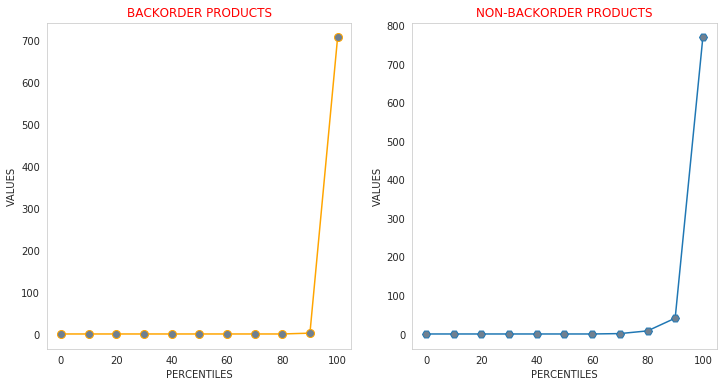

In [89]:
percetiles_each_class('in_transit_qty')

#### observations:
----
<font color = 'green'>
<b>
<i>
    

- After the removal of the extreme values, distribtuion of the feature looks like a Pareto distribution, transforming the feature to a Gaussian distribution could help in better perfromance of models like Logit.

    
- If we observe the percentile values of both classes, 80% of the data that went on backorders didn't have any quantity in transit while 60% of Non-Backorders didn't have any in transit qty and there appears to be some difference in the transit qty of backorders and non-Backorders when values are greater than 1, checking the in transit qty above 1 for both classes could give some info.



In [90]:
print(' '*20, 'Percentile Values of Both Classes 90-100')
print(' '*20,'-'*40,'\n\n')

print('\tBackorder Products:','\t'*3,'\tNon-backorder Products:')
print('\t','-'*18,'\t'*4,'-'*23)
tabs = 4
for percentile in range(90,101):
    if percentile == 100:
        tabs -= 2
        
    print('\t',percentile,'%le\t-',round(np.percentile(df[df['went_on_backorder']=="Yes"]['in_transit_qty'],percentile)),'\t'*tabs,\
         '\t',percentile,'%le -',np.percentile(df[df['went_on_backorder']=="No"]['in_transit_qty'],percentile))

                     Percentile Values of Both Classes 90-100
                     ---------------------------------------- 


	Backorder Products: 			 	Non-backorder Products:
	 ------------------ 				 -----------------------
	 90 %le	- 2.0 				 	 90 %le - 41.0
	 91 %le	- 3.0 				 	 91 %le - 49.0
	 92 %le	- 4.0 				 	 92 %le - 59.0
	 93 %le	- 5.0 				 	 93 %le - 72.0
	 94 %le	- 6.0 				 	 94 %le - 88.0
	 95 %le	- 10.0 				 	 95 %le - 109.0
	 96 %le	- 14.0 				 	 96 %le - 141.0
	 97 %le	- 22.0 				 	 97 %le - 190.0
	 98 %le	- 40.0 				 	 98 %le - 263.0
	 99 %le	- 72.0 				 	 99 %le - 407.0
	 100 %le	- 707.0 		 	 100 %le - 769.0


In [91]:
#check the dist of intransit qty when values>=1
df1 = df[df['in_transit_qty']>=1]

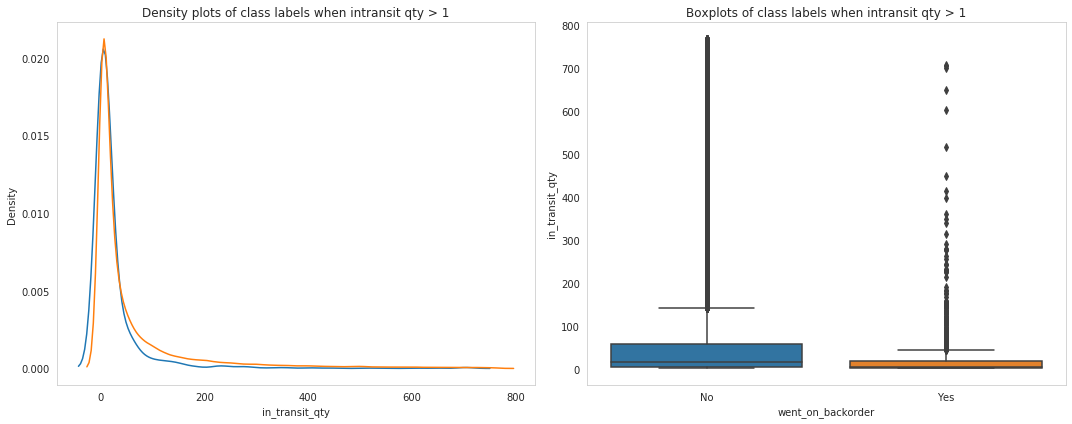

In [92]:
fig,ax = plt.subplots(1,2,figsize = (15,6))

sns.kdeplot(data = df1[df1['went_on_backorder'] == 'Yes'],x= 'in_transit_qty',ax = ax[0],label = 'Backorder Products')
sns.kdeplot(data = df1[df1['went_on_backorder'] == 'No'],x= 'in_transit_qty',ax = ax[0],label = 'Non-Backorder Products')
ax[0].set_title('Density plots of class labels when intransit qty > 1')
sns.boxplot(data = df1,y = 'in_transit_qty',x = 'went_on_backorder', order=["No", "Yes"],ax = ax[1])
ax[1].set_title('Boxplots of class labels when intransit qty > 1')
plt.tight_layout()
plt.show()

#### observations:
----
<i>
<b>
    
<font color = 'green'>

    
- There is some difference we could observe from the values greater than 90%le of intransit qty for Backorder products and Non-Backorder products, Backorders have intransit qty between 2-72 where as Non-Backorder have intransit between 41-769 . But upon looking at distribution of intransit values greater than 1 for both Backorder products and Non-Backorder products, data appears to overlap without any clear seperation between classes.
    
     
</font>
</b>
</i>

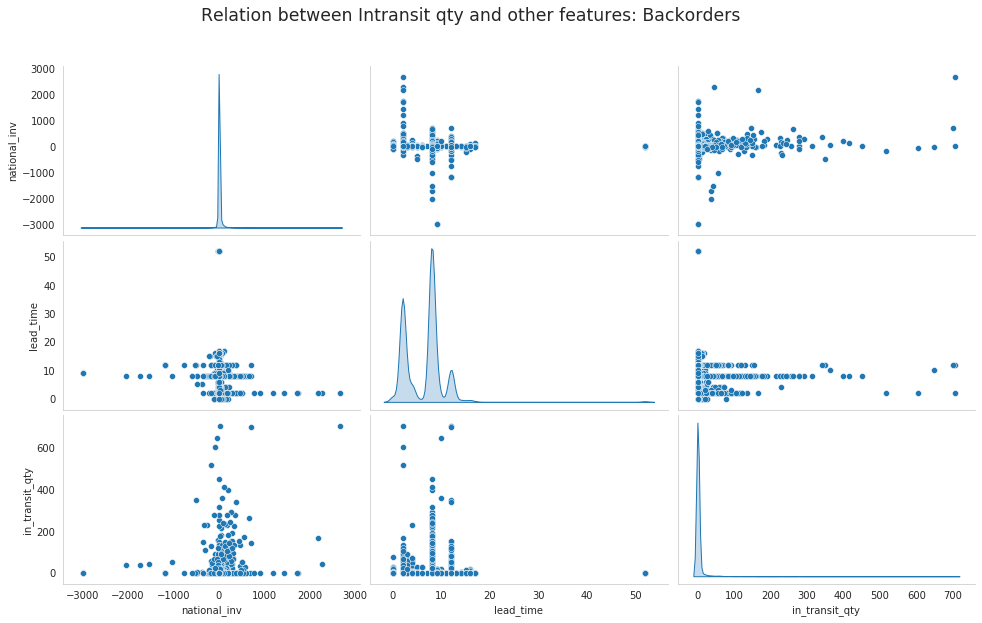

In [93]:
g = sns.pairplot(df[df['went_on_backorder'] == 'Yes'][['national_inv','lead_time','in_transit_qty']],diag_kind='kde',);
g.fig.set_size_inches(15,8)
g.fig.suptitle("Relation between Intransit qty and other features: Backorders", y=1.08,fontsize = 'xx-large');

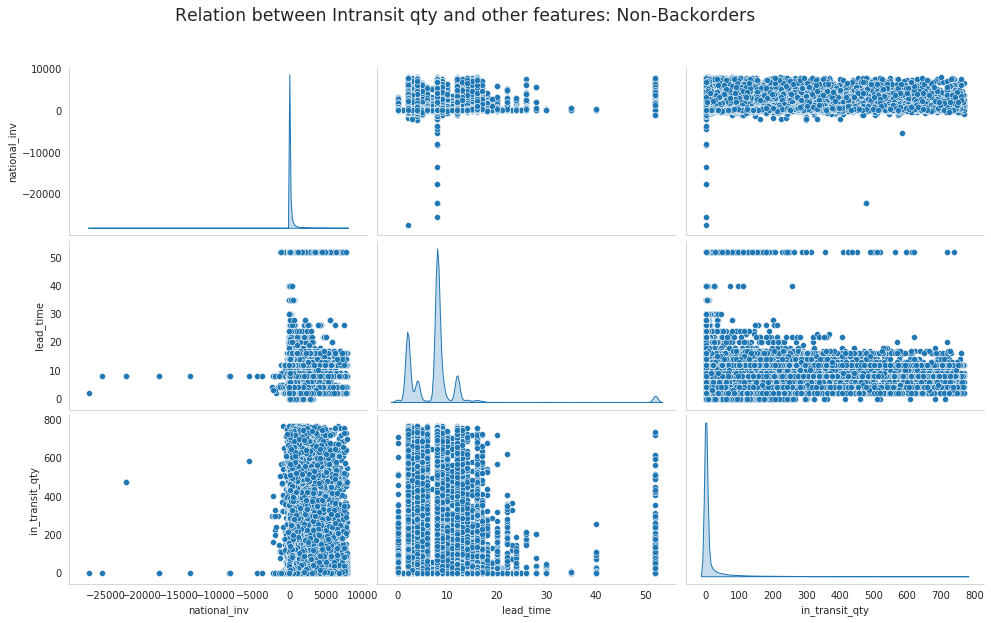

In [94]:
g2 = sns.pairplot(df[df['went_on_backorder'] == 'No'][['national_inv','lead_time','in_transit_qty']],diag_kind='kde',);
g2.fig.set_size_inches(15,8)
g2.fig.suptitle("Relation between Intransit qty and other features: Non-Backorders", y=1.08,fontsize = 'xx-large');

#### observations:
----
<i>
<b>
    
<font color = 'green'>

- From the above pair plots we could observe that, when lead time is between 0&10 intransit qty of Non-Backorders are much larger than that of Backorders,the same when lead time 52 days.


-  We could also observe that there aren't many intransit qty for non-backorder products when the current_inv is negative. 


- Feature intransit qty has some interaction with the features current inventory and lead time that could be observed from the above plots. This interaction will be helpful when building tree based models.  

<p style="font-size:18px;"> <b>Q.</b> How important 'In transit qty' feature is for predicting Backorders?</p>


- From the above analysis intransit qty alone may not be useful in classifying Backorders but it seems to have some interaction with the other features which would be helpful in training ML models.


- If we observe the values of intransit qty that are greater than 1, we could find some difference between the qty intransit for backorders and non-backorders.


- So we could say that feature might be useful for predicting possible Backorders.

In [95]:
#training a logit model on this feature alone to see how useful it could be for classification
calculte_imp('in_transit_qty')

for i =  1
--------------------
AUC::  0.599
PR-AUC score :: 0.44 



<p style="font-size:18px;"> <b>Q.<font color = 'darkblue'> <i>Will 'Intransit qty' feature be useful for building a good ML model?</i></p>
   
 
    - Training a logit model with Intransit qty gave an AUC of 0.60 which is better than lead time, but the PR AUC is 0.44 which is a good score. So we could say feature will be helpful in building a well performing model .

<h3> Analysis on feature "Forecast sales"</h3>

    - Since all the forecast features are highly correlated with each other, we'd only be analyzing the feature forecast sales till 9 months.

In [96]:
descriptive_stats('forecast_9_month')

DESCRIPTIVE STATS:
+----------+--------+---------+-----+-------+-------+-------+-----------+--------+----------+
|  Count   |  Mean  |   STD   | min | 25%le | 50%le | 75%le |    max    |  skew  |   kurt   |
+----------+--------+---------+-----+-------+-------+-------+-----------+--------+----------+
| 959979.0 | 326.39 | 3925.49 | 0.0 |  0.0  |  6.0  | 100.0 | 1513728.0 | 164.97 | 40837.98 |
+----------+--------+---------+-----+-------+-------+-------+-----------+--------+----------+


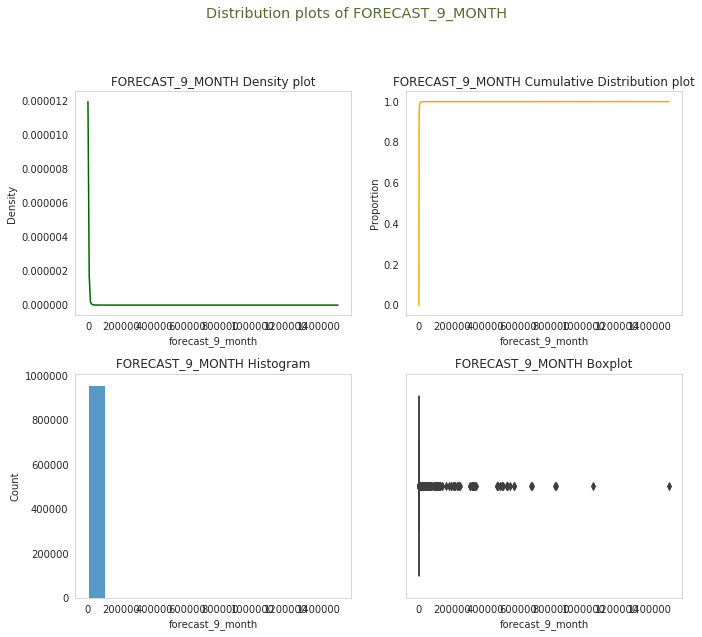

In [97]:
displot('forecast_9_month')

#### observations:
---
<i>
<b>
    
<font color = 'green'>

- From the descriptive stats we can obeserve that there are atleast 25% of products that donot have any forecast sales
    for 9 months, all these products might not have any backorders and will be useful for seperating non-backorders from backorders.


- As like the features Current inventory and Intransit quantity, Forecast feature have large values for skewness and kurtosis, there is a large difference between mean and median, 75%le and 100%le indicating data has exterme values which are possibly outliers.




 PERRCENTILE VALUES OF FEATURE  " FORECAST_9_MONTH ":

+------------+---------+
| percentile |  value  |
+------------+---------+
|    0%le    |    0    |
|   10%le    |    0    |
|   20%le    |    0    |
|   30%le    |    0    |
|   40%le    |    0    |
|   50%le    |    6    |
|   60%le    |    22   |
|   70%le    |    62   |
|   80%le    |   168   |
|   90%le    |   576   |
|   100%le   | 1513728 |
+------------+---------+


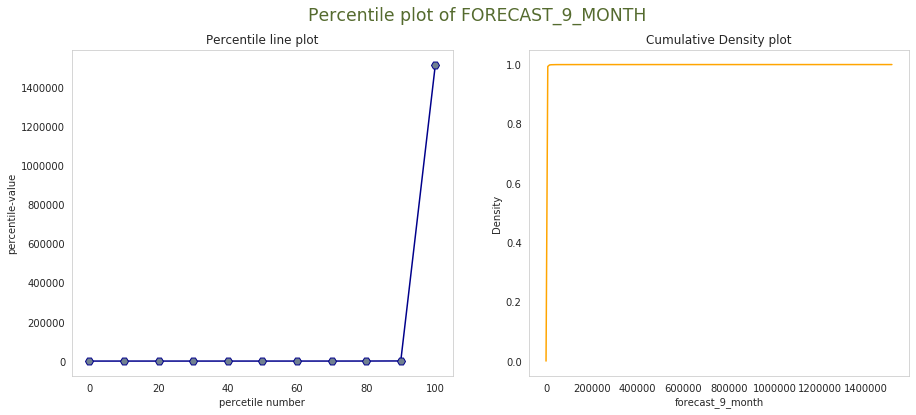

In [98]:
percentiles('forecast_9_month',print_=1)

In [99]:
print('There are',df[df['forecast_9_month'] == 0]['went_on_backorder'].value_counts()['Yes'],'Backorders when forecast sales of products are 0')

There are 674 Backorders when forecast sales of products are 0


In [100]:
percentile90_100('forecast_9_month')


 90-100 PERCENTILE VALUES OF FEATURE  " FORECAST_9_MONTH " :
-------------------------------------------------------
+------------+---------+
| Percentile |  value  |
+------------+---------+
|  90%le:    |   576   |
|  91%le:    |   673   |
|  92%le:    |   800   |
|  93%le:    |   953   |
|  94%le:    |   1140  |
|  95%le:    |   1411  |
|  96%le:    |   1800  |
|  97%le:    |   2330  |
|  98%le:    |   3264  |
|  99%le:    |   5364  |
|  100%le:   | 1513728 |
+------------+---------+


#### observations:
---

<i>
<b>
    
<font color = 'green'>

- From the percentile values we can see the 100%le value being too large than the 99%le of the forecast, this could be due to an error while collecting the data and we will only consider values less than 99%le.


- There are 674 Backorders even when the forecast values are 0, so there is a chance of getting backorders when forecast is 0.

In [101]:
print('No.of datapoints before removing extreme values:', df.shape[0])
df = df[df['forecast_9_month'] < np.percentile(df['forecast_9_month'],99)]
print('No.of datapoints after removing extreme values:', df.shape[0])

No.of datapoints before removing extreme values: 959979
No.of datapoints after removing extreme values: 950375



 PERRCENTILE VALUES OF FEATURE  " FORECAST_9_MONTH ":

+------------+-------+
| percentile | value |
+------------+-------+
|    0%le    |   0   |
|   10%le    |   0   |
|   20%le    |   0   |
|   30%le    |   0   |
|   40%le    |   0   |
|   50%le    |   6   |
|   60%le    |   21  |
|   70%le    |   60  |
|   80%le    |  155  |
|   90%le    |  500  |
|   100%le   |  5362 |
+------------+-------+


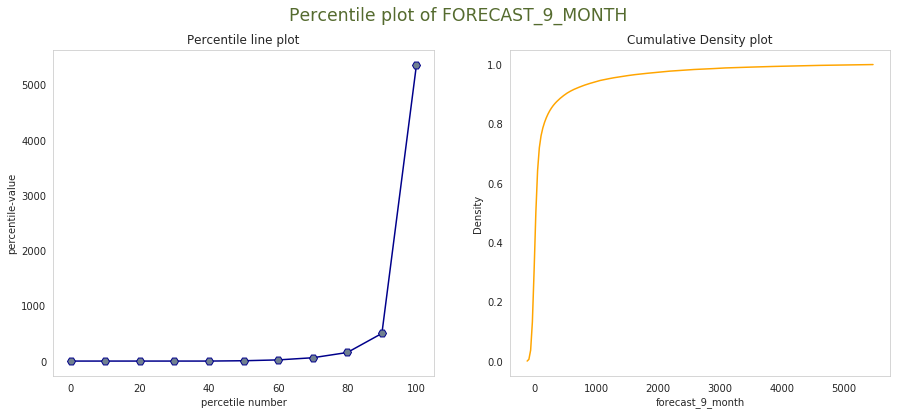

In [102]:
percentiles('forecast_9_month',print_=1)

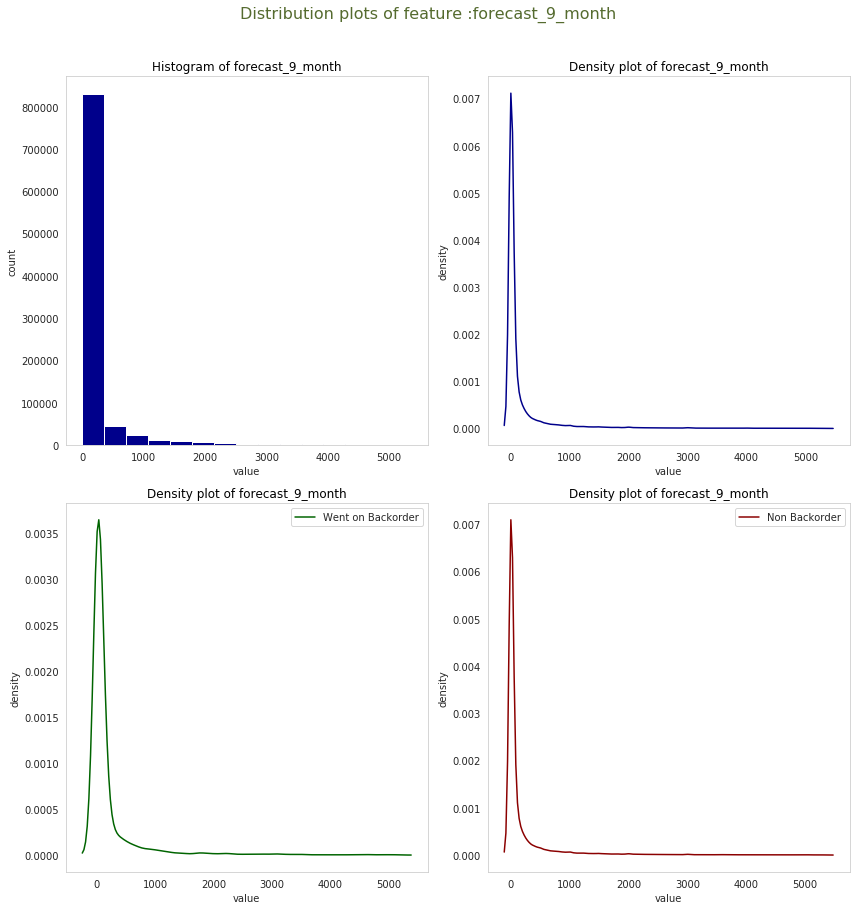

In [103]:
plot_distributions('forecast_9_month')

                     Percentile Values of Both Classes
                     ---------------------------------- 


	Backorder Products: 			 	Non-backorder Products:
	 ------------------ 				 -----------------------
	 0 %le	- 0.0 				 	 0 %le - 0.0
	 10 %le	- 2.0 				 	 10 %le - 0.0
	 20 %le	- 6.0 				 	 20 %le - 0.0
	 30 %le	- 11.0 				 	 30 %le - 0.0
	 40 %le	- 18.0 				 	 40 %le - 0.0
	 50 %le	- 29.0 				 	 50 %le - 6.0
	 60 %le	- 45.0 				 	 60 %le - 20.0
	 70 %le	- 72.0 				 	 70 %le - 60.0
	 80 %le	- 132.0 				 	 80 %le - 155.0
	 90 %le	- 444.0 				 	 90 %le - 500.0
	 100 %le	- 5138.0 		 	 100 %le - 5362.0


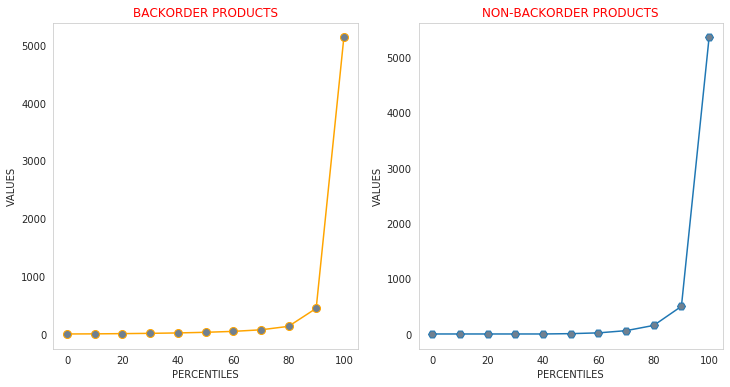

In [104]:
percetiles_each_class('forecast_9_month')

#### observations:
---

<i>
<b>
    
<font color = 'green'>


- We could still observe difference between 90%le and 100%le of forecast values but not much as before removing the extreme values, similar to the intransit quantity distrbution of the data looks like a Pareto distribution with 90% of the values less than 500 and the rest between 500 and 3300. So converting the feature to Normal distribution might help while training models that assumes data to be Normal.


- The distributions of forecast sales for products that have Backorders and products that didn't have backorders doesn't seem to have any significance difference, but the percentile values shows that there is difference in the values of forecast sales for backorders and non-backorders. Backorders have higher forecast sales that Non-backorders.


- Looking at the percentile values between 10%le - 70%le of products with Backorders, we could say that all the products that have forecast values between 1 and 70 are Backordered products. Then we will predict 60% of the  Backorder data correctly but predicting 30% non-backorder products incorrectly as backorders. This is could be an useful insight to predict backorders.

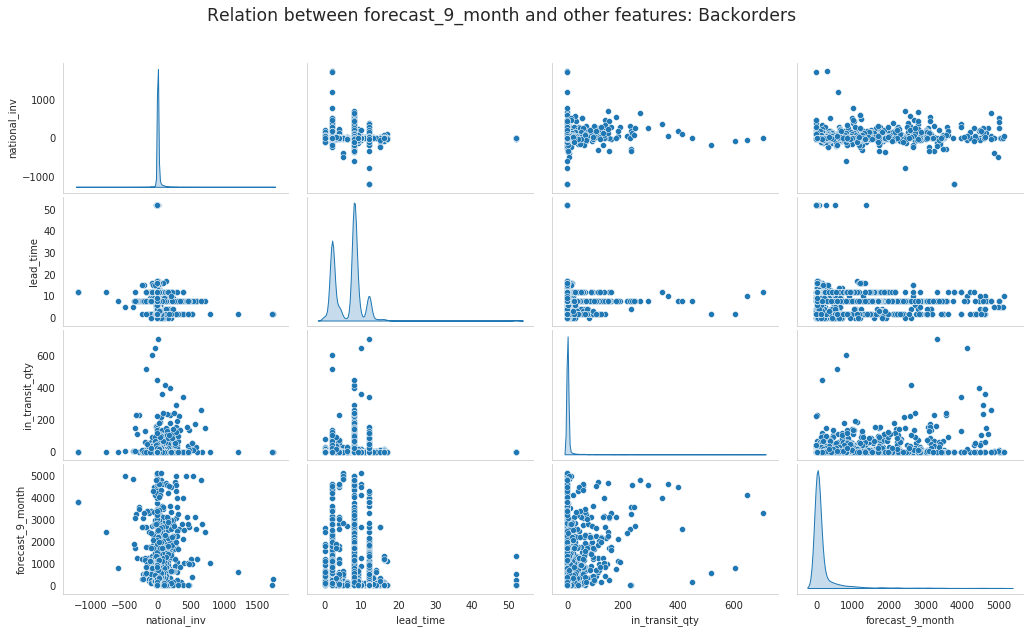

In [105]:
g = sns.pairplot(df[df['went_on_backorder'] == 'Yes'][['national_inv','lead_time','in_transit_qty','forecast_9_month']],diag_kind='kde',);
g.fig.set_size_inches(15,8)
g.fig.suptitle("Relation between forecast_9_month and other features: Backorders", y=1.08,fontsize = 'xx-large');

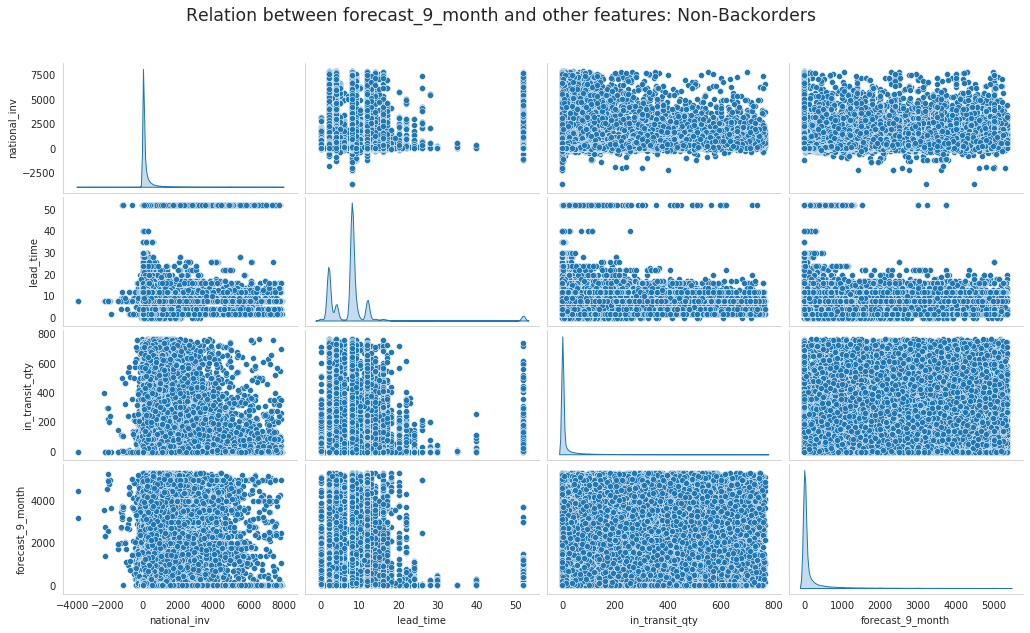

In [106]:
g1 = sns.pairplot(df[df['went_on_backorder'] == 'No'][['national_inv','lead_time','in_transit_qty','forecast_9_month']],diag_kind='kde',);
g1.fig.set_size_inches(15,8)
g1.fig.suptitle("Relation between forecast_9_month and other features: Non-Backorders", y=1.08,fontsize = 'xx-large');

<i>
<b>
    
<font color = 'green'>
- There aren't any significant interactions we could observe from the above pairplots between Forecast and other features .

<p style="font-size:18px;"> <b>Q.</b> How important 'Forecast sales' feature is for predicting Backorders?</p>

- Typically when there are large no.of sales for a product or there is an unusual demand for the product, then the product might get into Backorders. Forecast is nothing but prediction of future sales, so we could say if the forecast sales are high there will be Backorders. We could observe this from the above analysis where forecast sales for products that got backorders are higher than that of products that didn't go on backorder.


- So the feature may be helpful for predicting backorders, training a simple model on this feature alone can help determine the relation with class variable and whether it will be useful for training a ML model or not.

In [107]:
#training a logit model on this feature alone to see how useful it could be for classification
calculte_imp('forecast_9_month')

for i =  1
--------------------
AUC::  0.36
PR-AUC score :: 0.042 



<p style="font-size:18px;"> <b>Q.<font color = 'darkblue'> <i>Will 'Forecast sales' feature be useful for building a good ML model?</i></p>
   
 
    - Training a logit model with the feature alone gave an AUC of 0.645 which is better than a random model, Featuer might be useful for Ml models when combined with other features.

<h3> Analysis on Feature: Sales prior 9 months </h3>

In [108]:
descriptive_stats('sales_9_month')

DESCRIPTIVE STATS:
+----------+--------+---------+-----+-------+-------+-------+-----------+--------+-----------+
|  Count   |  Mean  |   STD   | min | 25%le | 50%le | 75%le |    max    |  skew  |    kurt   |
+----------+--------+---------+-----+-------+-------+-------+-----------+--------+-----------+
| 950375.0 | 264.56 | 4341.23 | 0.0 |  4.0  |  24.0 | 139.0 | 1703428.0 | 344.21 | 129135.73 |
+----------+--------+---------+-----+-------+-------+-------+-----------+--------+-----------+


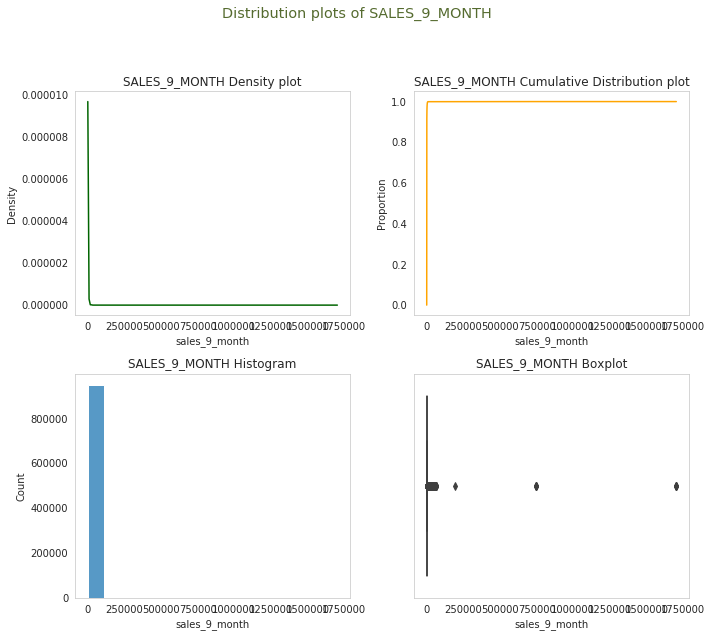

In [109]:
displot('sales_9_month')

#### observations:
---

<i>
<b>
    
<font color = 'green'>
    
-  As like the other features data is extremely right skewed,with 75% of the products having units sold less than 130 by the end of 9th month and rest of the sales are between 131 and 1703330. Looking at the max value we could clearly say that it is an error point. Similar to the other features we'll be removing values that vary significantly with other values.


 PERRCENTILE VALUES OF FEATURE  " SALES_9_MONTH ":

+------------+---------+
| percentile |  value  |
+------------+---------+
|    0%le    |    0    |
|   10%le    |    0    |
|   20%le    |    2    |
|   30%le    |    6    |
|   40%le    |    13   |
|   50%le    |    24   |
|   60%le    |    46   |
|   70%le    |    94   |
|   80%le    |   212   |
|   90%le    |   614   |
|   100%le   | 1703428 |
+------------+---------+


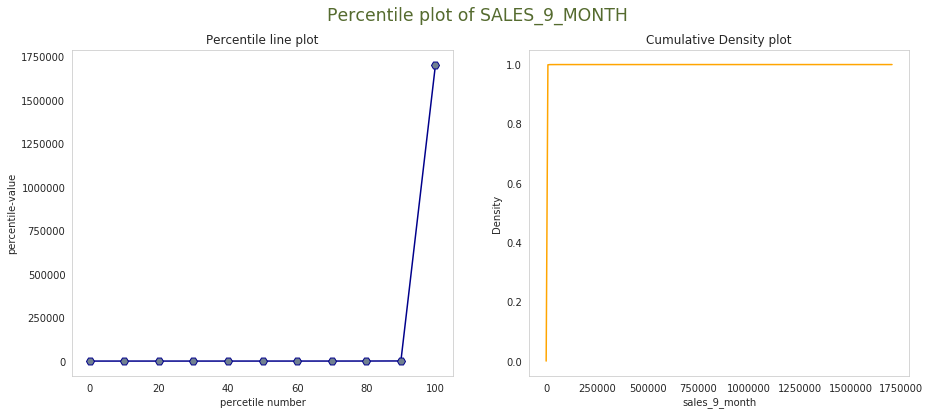

In [110]:
percentiles('sales_9_month',print_=1)

In [111]:
percentile90_100('sales_9_month')


 90-100 PERCENTILE VALUES OF FEATURE  " SALES_9_MONTH " :
-------------------------------------------------------
+------------+---------+
| Percentile |  value  |
+------------+---------+
|  90%le:    |   614   |
|  91%le:    |   704   |
|  92%le:    |   807   |
|  93%le:    |   938   |
|  94%le:    |   1110  |
|  95%le:    |   1333  |
|  96%le:    |   1623  |
|  97%le:    |   2013  |
|  98%le:    |   2629  |
|  99%le:    |   3664  |
|  100%le:   | 1703428 |
+------------+---------+


                     Percentile Values of Both Classes
                     ---------------------------------- 


	Backorder Products: 			 	Non-backorder Products:
	 ------------------ 				 -----------------------
	 0 %le	- 0.0 				 	 0 %le - 0.0
	 10 %le	- 1.0 				 	 10 %le - 0.0
	 20 %le	- 4.0 				 	 20 %le - 2.0
	 30 %le	- 8.0 				 	 30 %le - 6.0
	 40 %le	- 15.0 				 	 40 %le - 13.0
	 50 %le	- 23.0 				 	 50 %le - 24.0
	 60 %le	- 34.80000000000018 				 	 60 %le - 47.0
	 70 %le	- 52.0 				 	 70 %le - 95.0
	 80 %le	- 92.0 				 	 80 %le - 214.0
	 90 %le	- 295.2000000000007 				 	 90 %le - 618.0
	 100 %le	- 32538.0 		 	 100 %le - 1703428.0


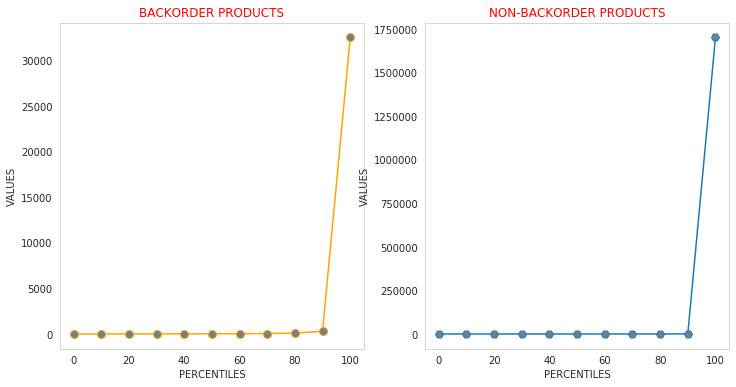

In [112]:
percetiles_each_class('sales_9_month')

In [113]:
print('No.of rows in dataframe before removing extreme values',df.shape[0])
df = df[df['sales_9_month']<np.percentile(df['sales_9_month'],99)]
print('No.of rows in dataframe after removing extreme values',df.shape[0])

No.of rows in dataframe before removing extreme values 950375
No.of rows in dataframe after removing extreme values 940864


                     Percentile Values of Both Classes
                     ---------------------------------- 


	Backorder Products: 			 	Non-backorder Products:
	 ------------------ 				 -----------------------
	 0 %le	- 0.0 				 	 0 %le - 0.0
	 10 %le	- 1.0 				 	 10 %le - 0.0
	 20 %le	- 4.0 				 	 20 %le - 2.0
	 30 %le	- 8.0 				 	 30 %le - 6.0
	 40 %le	- 15.0 				 	 40 %le - 12.0
	 50 %le	- 23.0 				 	 50 %le - 23.0
	 60 %le	- 34.0 				 	 60 %le - 45.0
	 70 %le	- 51.0 				 	 70 %le - 90.0
	 80 %le	- 90.0 				 	 80 %le - 199.0
	 90 %le	- 271.0 				 	 90 %le - 548.0
	 100 %le	- 3607.0 		 	 100 %le - 3663.0


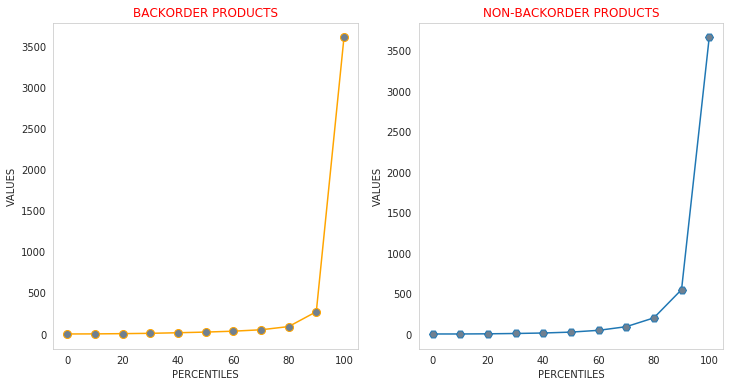

In [114]:
percetiles_each_class('sales_9_month')

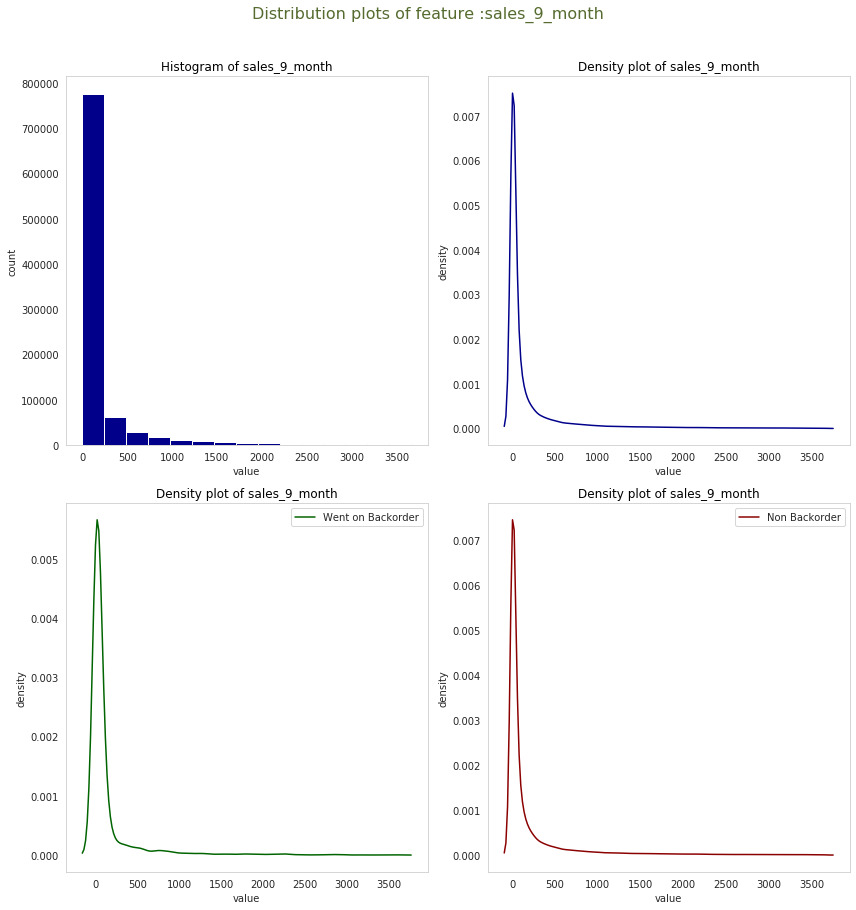

In [115]:
plot_distributions('sales_9_month')

#### observations:
---

<i>
   <b> 
       
   <font color = 'green'> 
       


- Typically the sales of the products that get Backorders tend to be higher but there isn't any significant difference between the distributions of backorder sales and non-backorder sales that we can observe from histograms, density plots and percentiles.


- Sales values in sales_3_month,sales_6_month and sales_9_month are result of adding the sales with previous 3 month sales. Creating features that have individual 3 month sales could help us understand the sales over the time.

       
- One of the reason for backorders is unusual demand or unusual sales of products due to seasonality. Checking for sudden spike in sales over time could help get some useful insights for building a better model.
       
</font>
</b>
</i>


In [116]:
#Creating features that have individual 3 month sales
df['sales_1to3'] = (df['sales_3_month']-df['sales_1_month'])
df['sales_3to6'] = (df['sales_6_month']-df['sales_3_month'])
df['sales_6to9'] = (df['sales_9_month']-df['sales_6_month'])


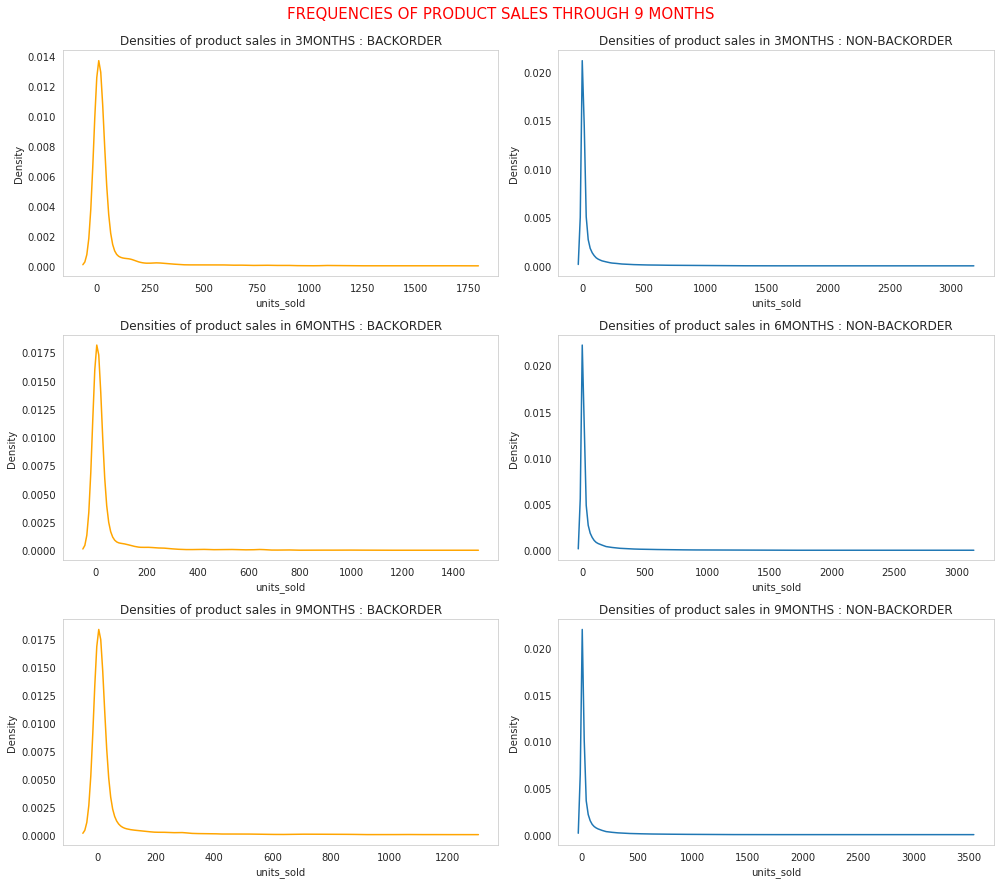

In [117]:
# distibtutions of all individual 3 month sales
fig,ax = plt.subplots(3,2,tight_layout = True,figsize = (14,12))
for i,col in zip([0,1,2],['sales_3_month','sales_3to6','sales_6to9']):
    #ax[i,0].hist(df[df['went_on_backorder']=='Yes'][col],bins = 20,color='orange')
    sns.kdeplot(df[df['went_on_backorder']=='Yes'][col],color='orange',ax=ax[i,0])
    ax[i,0].set_title('Densities of product sales in '+str(3*(i+1))+ 'months : backorder'.upper())
    ax[i,0].set_xlabel('units_sold')
    #ax[i,0].set_ylabel('frequencies')

    #ax[i,1].hist(df[df['went_on_backorder']=="No"][col],bins = 20)
    sns.kdeplot(df[df['went_on_backorder']=='No'][col],ax=ax[i,1])
    ax[i,1].set_title('Densities of product sales in '+str(3*(i+1))+ 'months : non-backorder'.upper())
    ax[i,1].set_xlabel('units_sold')
    #ax[i,1].set_ylabel('frequencies')

fig.suptitle('Frequencies of Product sales through 9 months'.upper(),color='red',y=1.02,fontsize=15)
plt.show();

In [118]:
percentiles1 = list(np.percentile(df['sales_1_month'],range(0,110,10)).astype(int))
percentiles3 = list(np.percentile(df['sales_1to3'],range(0,110,10)).astype(int))
percentiles6 = list(np.percentile(df['sales_3to6'],range(0,110,10)).astype(int))
percentiles9 = list(np.percentile(df['sales_6to9'],range(0,110,10)).astype(int))

print('\n perrcentile values of individual 3 month sales '.upper(),':\n')
table = PrettyTable(['percentile','month_1','month 1-3','month 3-6','month 6-9'])
for i in range(0,11):
    table.add_row([str(i*10)+'%le',percentiles1[i],percentiles3[i],percentiles6[i],percentiles9[i]])
print(table)


 PERRCENTILE VALUES OF INDIVIDUAL 3 MONTH SALES  :

+------------+---------+-----------+-----------+-----------+
| percentile | month_1 | month 1-3 | month 3-6 | month 6-9 |
+------------+---------+-----------+-----------+-----------+
|    0%le    |    0    |     0     |     0     |     0     |
|   10%le    |    0    |     0     |     0     |     0     |
|   20%le    |    0    |     0     |     0     |     0     |
|   30%le    |    0    |     1     |     2     |     1     |
|   40%le    |    1    |     3     |     4     |     3     |
|   50%le    |    2    |     5     |     7     |     7     |
|   60%le    |    4    |     10    |     14    |     14    |
|   70%le    |    9    |     20    |     29    |     29    |
|   80%le    |    19   |     43    |     64    |     65    |
|   90%le    |    55   |    122    |    176    |    182    |
|   100%le   |   3084  |    3118   |    3106   |    3514   |
+------------+---------+-----------+-----------+-----------+


In [119]:
for column in ['sales_1_month','sales_1to3','sales_3to6','sales_6to9']:
    print('\n\n',' '*20, 'Percentile Values of Both Classes: '+column)
    print(' '*20,'-'*50,'\n')

    print('\tBackorder Products:','\t'*3,'\tNon-backorder Products:')
    print('\t','-'*18,'\t'*4,'-'*23)
    tabs = 4
    for percentile in range(0,110,10):
        if percentile == 100:
            tabs -= 2

        print('\t',percentile,'%le\t-',np.percentile(df[df['went_on_backorder']=="Yes"][column],percentile),'\t'*tabs,\
             '\t',percentile,'%le -',np.percentile(df[df['went_on_backorder']=="No"][column],percentile))



                      Percentile Values of Both Classes: sales_1_month
                     -------------------------------------------------- 

	Backorder Products: 			 	Non-backorder Products:
	 ------------------ 				 -----------------------
	 0 %le	- 0.0 				 	 0 %le - 0.0
	 10 %le	- 0.0 				 	 10 %le - 0.0
	 20 %le	- 0.0 				 	 20 %le - 0.0
	 30 %le	- 1.0 				 	 30 %le - 0.0
	 40 %le	- 2.0 				 	 40 %le - 1.0
	 50 %le	- 3.0 				 	 50 %le - 2.0
	 60 %le	- 5.0 				 	 60 %le - 4.0
	 70 %le	- 7.0 				 	 70 %le - 9.0
	 80 %le	- 12.0 				 	 80 %le - 19.0
	 90 %le	- 36.0 				 	 90 %le - 55.0
	 100 %le	- 1431.0 		 	 100 %le - 3084.0


                      Percentile Values of Both Classes: sales_1to3
                     -------------------------------------------------- 

	Backorder Products: 			 	Non-backorder Products:
	 ------------------ 				 -----------------------
	 0 %le	- 0.0 				 	 0 %le - 0.0
	 10 %le	- 0.0 				 	 10 %le - 0.0
	 20 %le	- 1.0 				 	 20 %le - 0.0
	 30 %le	- 2.

#### observations:
---

<i>
   <b> 
       
   <font color = 'green'> 
       


- Distribution plots of backorder and non-backorder product's individual 3 month sales doesn't give much information, ditributions for both backorders and non-backorders are similar. There is also no drastic increase in the sales we could observe in a particular 3month period, percentile values of all 4 individual 3 month sales appear to be the same. So we can say that there are no sudden spike in the sales of the products.

       
- But there is an insight we can observe when comparing the percentiles of each class, percentiles of backorders seem to be lesser than that of non-backorders for almost all individual 3 month sale features. So the sales of backorders could be lesser than non-backorders.

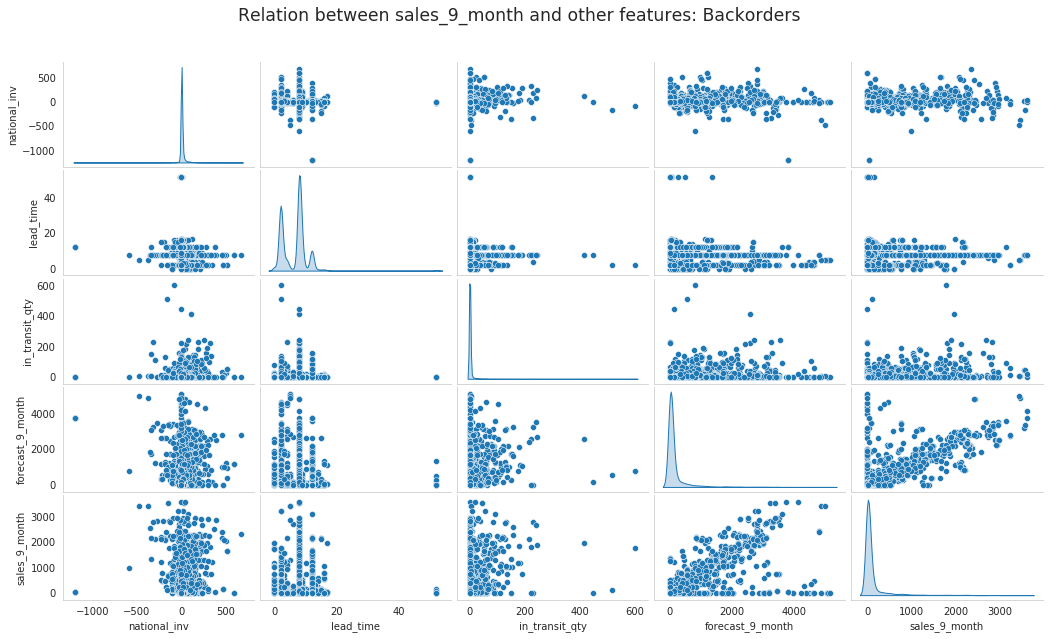

In [120]:
g = sns.pairplot(df[df['went_on_backorder'] == 'Yes'][['national_inv','lead_time','in_transit_qty','forecast_9_month','sales_9_month']],diag_kind='kde',);
g.fig.set_size_inches(15,8)
g.fig.suptitle("Relation between sales_9_month and other features: Backorders", y=1.08,fontsize = 'xx-large');

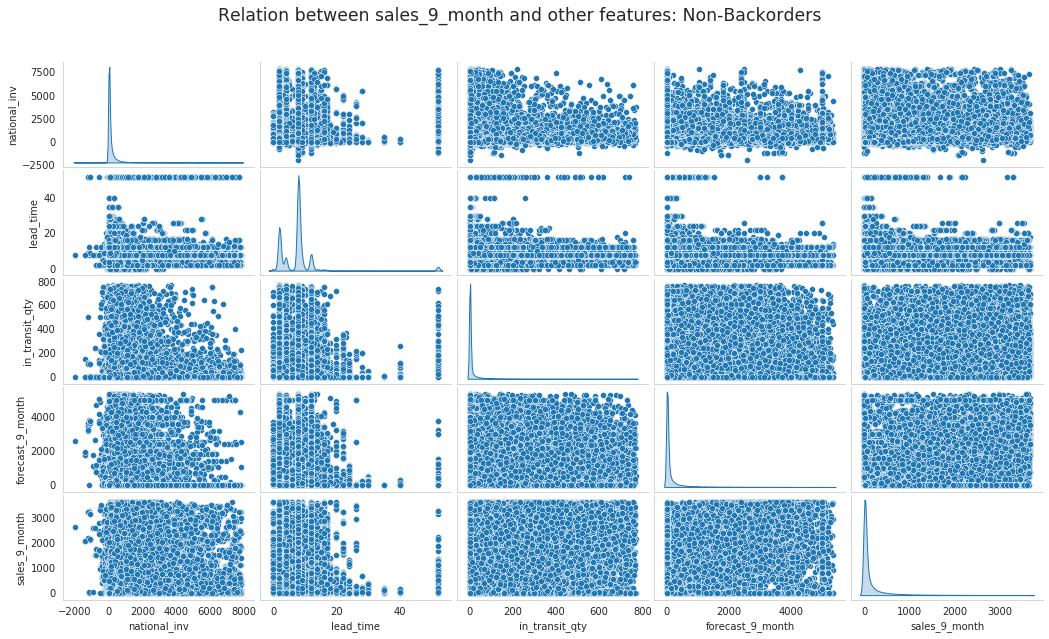

In [121]:
g = sns.pairplot(df[df['went_on_backorder'] == 'No'][['national_inv','lead_time','in_transit_qty','forecast_9_month','sales_9_month']],diag_kind='kde',);
g.fig.set_size_inches(15,8)
g.fig.suptitle("Relation between sales_9_month and other features: Non-Backorders", y=1.08,fontsize = 'xx-large');

<i>
   <b> 
       
   <font color = 'green'> 

- There isn't any significant interaction between the features we can observe from the  pair plot, for backorders forcast and sales feature appear to be correlated but not for non-backorders

In [122]:
#training a logit model on this feature alone to see how useful it could be for classification
for feature in ['sales_1_month','sales_1to3','sales_3to6','sales_6to9','sales_9_month']:
    print('IMportance of feature: '+feature)
    calculte_imp(feature)

IMportance of feature: sales_1_month
for i =  1
--------------------
AUC::  0.466
PR-AUC score :: 0.117 

IMportance of feature: sales_1to3
for i =  1
--------------------
AUC::  0.504
PR-AUC score :: 0.1 

IMportance of feature: sales_3to6
for i =  1
--------------------
AUC::  0.535
PR-AUC score :: 0.113 

IMportance of feature: sales_6to9
for i =  1
--------------------
AUC::  0.547
PR-AUC score :: 0.14 

IMportance of feature: sales_9_month
for i =  1
--------------------
AUC::  0.512
PR-AUC score :: 0.059 



<p style="font-size:18px;"> <b>Q.<font color = 'darkblue'> <i>Will 'Sales' feature be useful for building a good ML model?</i></p>
   
 
    - Training a logit model with the sale for past 9 month gave an AUC of 0.516 which is same as a random model, but pr-auc of individual sales features are some good so these might be useful while training Ml models.

<h3> Analysis on feature: Minimum recommended stock </h3>

In [123]:
descriptive_stats('min_bank')

DESCRIPTIVE STATS:
+----------+-------+-------+-----+-------+-------+-------+--------+-------+---------+
|  Count   |  Mean |  STD  | min | 25%le | 50%le | 75%le |  max   |  skew |   kurt  |
+----------+-------+-------+-----+-------+-------+-------+--------+-------+---------+
| 940864.0 | 24.68 | 79.84 | 0.0 |  0.0  |  1.0  |  19.0 | 6074.0 | 21.03 | 1036.14 |
+----------+-------+-------+-----+-------+-------+-------+--------+-------+---------+


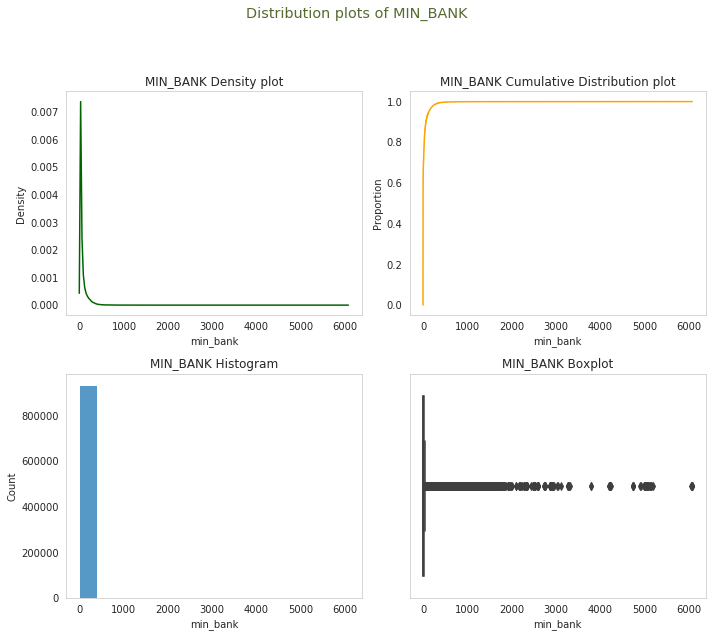

In [124]:
displot('min_bank')


 PERRCENTILE VALUES OF FEATURE  " MIN_BANK ":

+------------+-------+
| percentile | value |
+------------+-------+
|    0%le    |   0   |
|   10%le    |   0   |
|   20%le    |   0   |
|   30%le    |   0   |
|   40%le    |   1   |
|   50%le    |   1   |
|   60%le    |   3   |
|   70%le    |   11  |
|   80%le    |   27  |
|   90%le    |   67  |
|   100%le   |  6074 |
+------------+-------+


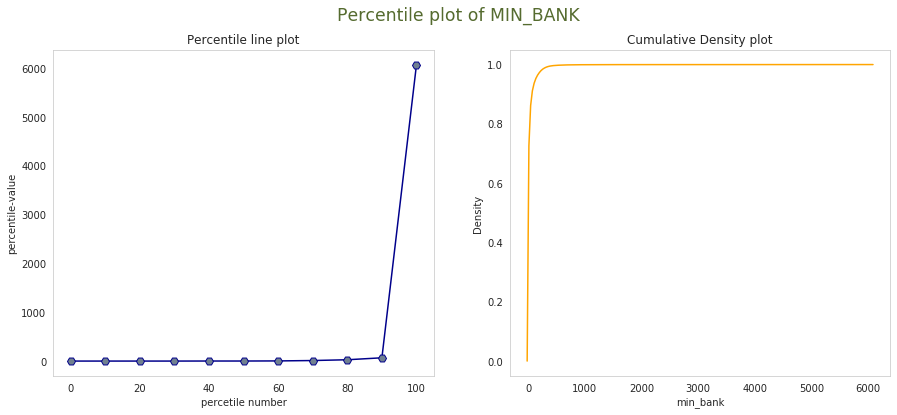

In [125]:
percentiles('min_bank',print_=1)

#### observations:
---
<i>
   <b> 
       
   <font color = 'green'> 
       
       
- The distribution of the feature is same as the other features, but skewness ang kurtosis of the distribution are much lesser compared to the other features. Distribution looks like a pareto distribution with larger tail and lots of values stacked at the initial part of the distribution. 

       
- The Maximum value is way too larger than the 75%le of the feature, further checking of percentiles will determine any extreme values in the feature and if any extreme values are present, they will be removed.

       
- 40%le of minimum stock recommended is 0 which says there are 40% of products that do not require any stock to be held. If these products get any orders by any chance then it will be a backorder, if it is true there should be considerable no.of backorders when minimum recommended stock is 0.


In [126]:
percentile90_100('min_bank')


 90-100 PERCENTILE VALUES OF FEATURE  " MIN_BANK " :
-------------------------------------------------------
+------------+-------+
| Percentile | value |
+------------+-------+
|  90%le:    |   67  |
|  91%le:    |   75  |
|  92%le:    |   85  |
|  93%le:    |   97  |
|  94%le:    |  112  |
|  95%le:    |  131  |
|  96%le:    |  156  |
|  97%le:    |  188  |
|  98%le:    |  231  |
|  99%le:    |  307  |
|  100%le:   |  6074 |
+------------+-------+


In [127]:
print('No.of rows before removing extreme values:',df.shape[0])
df = df[df['min_bank']<=np.percentile(df['min_bank'],99)]
print('No.of rows after removing extreme values:',df.shape[0])

No.of rows before removing extreme values: 940864
No.of rows after removing extreme values: 931501


In [128]:
#print('No.of products with negative performance value',df[df['perf_12_month_avg']<0].shape[0])
print('There are',df[df['min_bank']==0]['went_on_backorder'].value_counts()['Yes'],\
      'products that went on backorder when the minimum recommended stock is 0.')

There are 4940 products that went on backorder when the minimum recommended stock is 0.


                     Percentile Values of Both Classes
                     ---------------------------------- 


	Backorder Products: 			 	Non-backorder Products:
	 ------------------ 				 -----------------------
	 0 %le	- 0.0 				 	 0 %le - 0.0
	 10 %le	- 0.0 				 	 10 %le - 0.0
	 20 %le	- 0.0 				 	 20 %le - 0.0
	 30 %le	- 0.0 				 	 30 %le - 0.0
	 40 %le	- 0.0 				 	 40 %le - 0.0
	 50 %le	- 0.0 				 	 50 %le - 1.0
	 60 %le	- 1.0 				 	 60 %le - 2.0
	 70 %le	- 3.0 				 	 70 %le - 10.0
	 80 %le	- 8.0 				 	 80 %le - 26.0
	 90 %le	- 32.0 				 	 90 %le - 61.0
	 100 %le	- 305.0 		 	 100 %le - 307.0


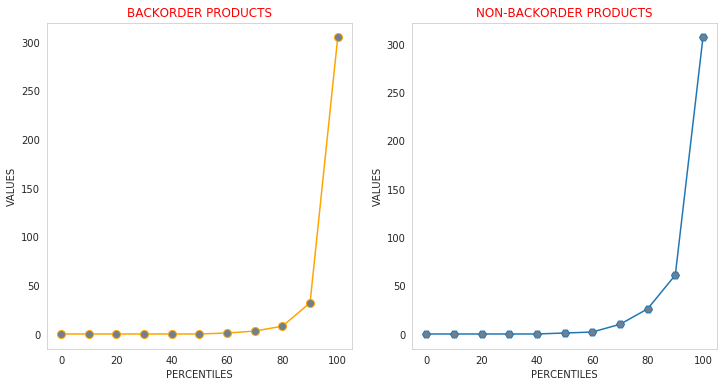

In [129]:
percetiles_each_class('min_bank')

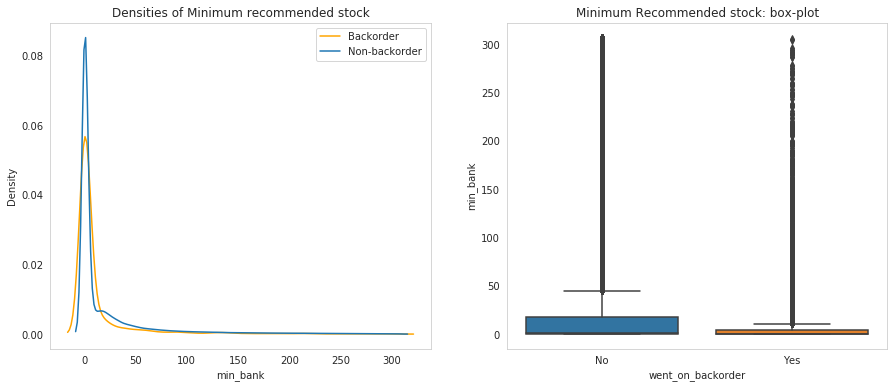

In [130]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.kdeplot(data = df[df['went_on_backorder'] == 'Yes'],x = 'min_bank',label = 'Backorder',color = 'orange')
sns.kdeplot(data = df[df['went_on_backorder'] == 'No'],x = 'min_bank',label='Non-backorder')
plt.title('Densities of Minimum recommended stock')
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(data = df,x = 'went_on_backorder', y = 'min_bank',);
plt.title('Minimum Recommended stock: box-plot')

plt.show();

#### observations:
---
<font color = 'green'>
<b>
<i>
    
- There are 4937 backorders when the minimum recommended stock is 0 which is 50% of the whole backorder data and even though the minimum recommended stock of some products is 0, there is still some stock maintained in the inventory. 

    
            
- The distributions of backorder products and non-backorder products have been overlapped, there is no seperation in the distribution. But there appears to be some minor difference in the percentile values of the recommended stock for backorders and non-backorders, non-backorders have slightly higher recommended stock and this could be the reason the densities of non-backorders are slightly high in the density plots.

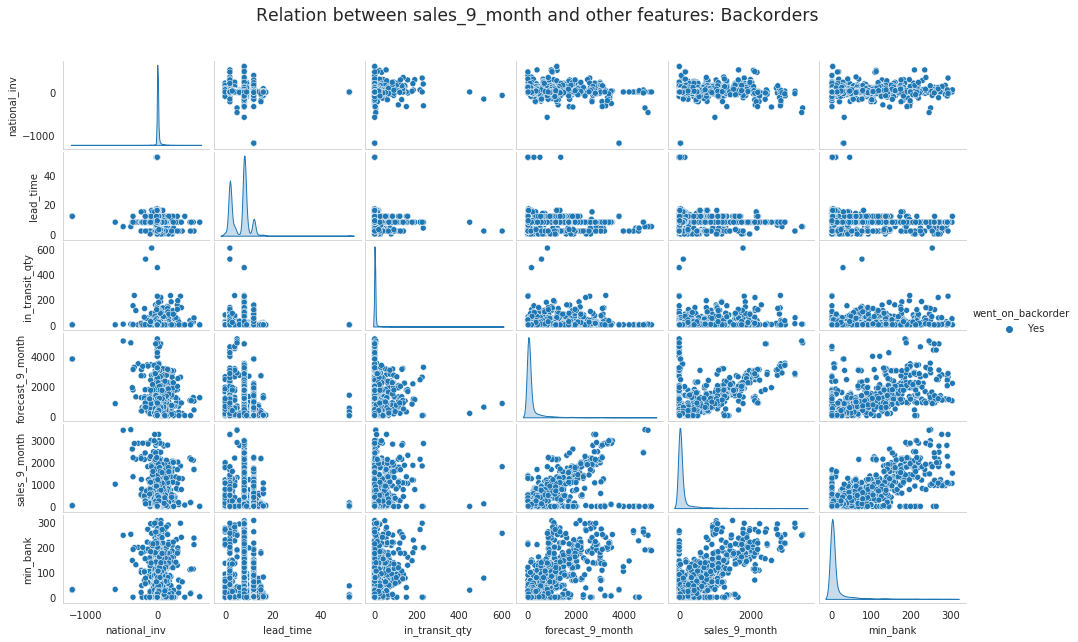

In [131]:
g = sns.pairplot(df[df['went_on_backorder'] == 'Yes'][['national_inv','lead_time','in_transit_qty','forecast_9_month','sales_9_month','min_bank','went_on_backorder']],diag_kind='kde',hue = 'went_on_backorder');
g.fig.set_size_inches(15,8)
g.fig.suptitle("Relation between sales_9_month and other features: Backorders", y=1.08,fontsize = 'xx-large');

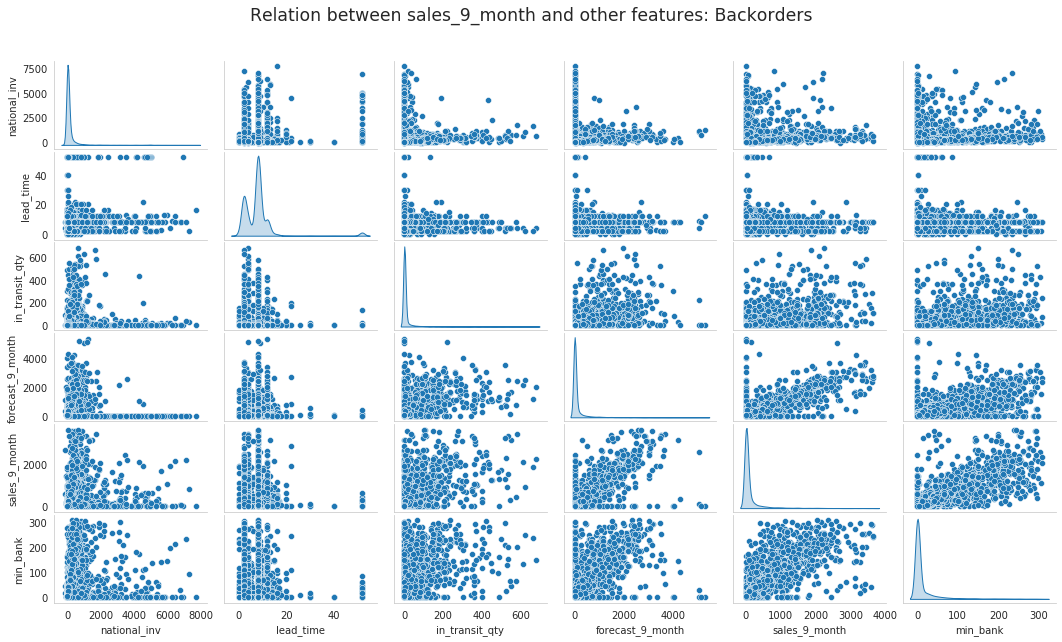

In [132]:
g = sns.pairplot(df[df['went_on_backorder'] == 'No'][:12000][['national_inv','lead_time','in_transit_qty','forecast_9_month','sales_9_month','min_bank']],diag_kind='kde',);
g.fig.set_size_inches(15,8)
g.fig.suptitle("Relation between sales_9_month and other features: Backorders", y=1.08,fontsize = 'xx-large');

In [133]:
print('\t','-'*52,)
print('\tSALES OF PRODUCTS WHEN MINIMUM RECOMMENDED STOCK IS 0:')
print('\t','-'*52,'\n')
print('\tBACKORDER PRODUCTS:','\t'*2,'NON-BACKORDER PRODUCTS:','\n')

backorder_desc = df[(df['min_bank']==0) & (df['went_on_backorder']=='Yes')]['sales_9_month'].describe()
nonbackorder_desc = df[(df['min_bank']==0) & (df['went_on_backorder']=='No')]['sales_9_month'].describe()
ind  = backorder_desc.index.drop('count')
for i,index in zip(range(1,8),ind):
    print('\t',index,':',round(backorder_desc[i]),'\t'*4,index,':',round(nonbackorder_desc[i]))

print('\n\t','-'*52,)
print('\tSALES OF PRODUCTS WHEN MINIMUM RECOMMENDED STOCK IS NOT 0:')
print('\t','-'*52,'\n')
print('\tBACKORDER PRODUCTS:','\t'*2,'NON-BACKORDER PRODUCTS:','\n')

backorder_desc = df[(df['min_bank']>0) & (df['went_on_backorder']=='Yes')]['sales_9_month'].describe()
nonbackorder_desc = df[(df['min_bank']>0) & (df['went_on_backorder']=='No')]['sales_9_month'].describe()
ind  = backorder_desc.index.drop('count')
for i,index in zip(range(1,8),ind):
    print('\t',index,':',round(backorder_desc[i]),'\t'*4,index,':',round(nonbackorder_desc[i]))


	 ----------------------------------------------------
	SALES OF PRODUCTS WHEN MINIMUM RECOMMENDED STOCK IS 0:
	 ---------------------------------------------------- 

	BACKORDER PRODUCTS: 		 NON-BACKORDER PRODUCTS: 

	 mean : 34.0 				 mean : 25.0
	 std : 88.0 				 std : 96.0
	 min : 0.0 				 min : 0.0
	 25% : 4.0 				 25% : 1.0
	 50% : 13.0 				 50% : 6.0
	 75% : 35.0 				 75% : 22.0
	 max : 1645.0 				 max : 3541.0

	 ----------------------------------------------------
	SALES OF PRODUCTS WHEN MINIMUM RECOMMENDED STOCK IS NOT 0:
	 ---------------------------------------------------- 

	BACKORDER PRODUCTS: 		 NON-BACKORDER PRODUCTS: 

	 mean : 182.0 				 mean : 282.0
	 std : 385.0 				 std : 518.0
	 min : 0.0 				 min : 0.0
	 25% : 12.0 				 25% : 12.0
	 50% : 40.0 				 50% : 71.0
	 75% : 133.0 				 75% : 282.0
	 max : 3447.0 				 max : 3663.0


#### observations:
---
<font color = 'green'>
<b>
<i>

- Upon looking for any relation between minimum stock and other features from the pair plot of backorder and non-backorder products, there appears to be no significant relation we could observe between feautres that seperate backorders from non-backorders. Only insight is that values of all the features are higher for non-backorder products when compared to the backorder products. 
    
    
- But looking at the stats of sales when minimum stock equal to 0 and greater than 0, we could observe that percentile values of backorder sales when minimum stock equal to 0 is slightly higher than non-backorders. Percentile values of non-backorder sales are slightly higher than backorders when minimum stock greater than 0. 
    
    
- So there is a chance that sales of backorders could be high when minimum stock is 0 and sales of non-backorders could be high when minimum stock greater than 0.


<p style="font-size:18px;"> <b>Q.</b> How important 'Minimum recommended stock' feature is for predicting Backorders ?</p>

- In general a business come across backorders when the minimum recommended stock is not maintained. We could check this practically by subtracting current inventory level of products from minimum stock recommended and build a model on top this feature and see how important this insight could be.


- As like other features we could build a model with feature minimum stock and check the performance of the feature .

In [134]:
df['min_bank_error'] = df['national_inv'] - df['min_bank']
print(sum(df['min_bank_error']<0),'products that have less than minimum recommended stock,',\
     'among them',df[df['min_bank_error']<0]['went_on_backorder'].value_counts()['Yes'],'products are backorders which is.',\
     round(df[df['min_bank_error']<0]['went_on_backorder'].value_counts()['Yes']/df['went_on_backorder'].value_counts()['Yes']* 100),\
     '% of overall backorders')

46114 products that have less than minimum recommended stock, among them 3276 products are backorders which is. 33.0 % of overall backorders


In [135]:
#training a logit model on this feature alone to see how useful it could be for classification
calculte_imp('min_bank_error')

for i =  1
--------------------
AUC::  0.872
PR-AUC score :: 0.065 



In [136]:
#training a logit model on this feature alone to see how useful it could be for classification
calculte_imp('min_bank')

for i =  1
--------------------
AUC::  0.57
PR-AUC score :: 0.261 



<p style="font-size:18px;"> <b>Q.<font color = 'darkblue'> <i>Will 'Minimum recommended stock' feature be useful for building a good ML model?</i></p>
   
 
    - Training a logit model with the minimum recommended stock feature gave an AUC of only 0.57 which is not a good score, but pr-auc is 0.263 which is not that bad. Feature min_bank_error that is created from minimum stock feature has given an AUC of 0.874 which is a very good score considering a model trained on single feature. So, features min recommeded stock and min_bank_error will be very useful for classifying backorders.

<h3> Analysis on Feature: Source performance in last 12 months </h3>

In [137]:
descriptive_stats('perf_12_month_avg')

DESCRIPTIVE STATS:
+----------+-------+------+-------+-------+-------+-------+-----+--------+-------+
|  Count   |  Mean | STD  |  min  | 25%le | 50%le | 75%le | max |  skew  |  kurt |
+----------+-------+------+-------+-------+-------+-------+-----+--------+-------+
| 931501.0 | -0.16 | 9.72 | -99.0 |  0.71 |  0.86 |  0.96 | 1.0 | -10.07 | 99.42 |
+----------+-------+------+-------+-------+-------+-------+-----+--------+-------+


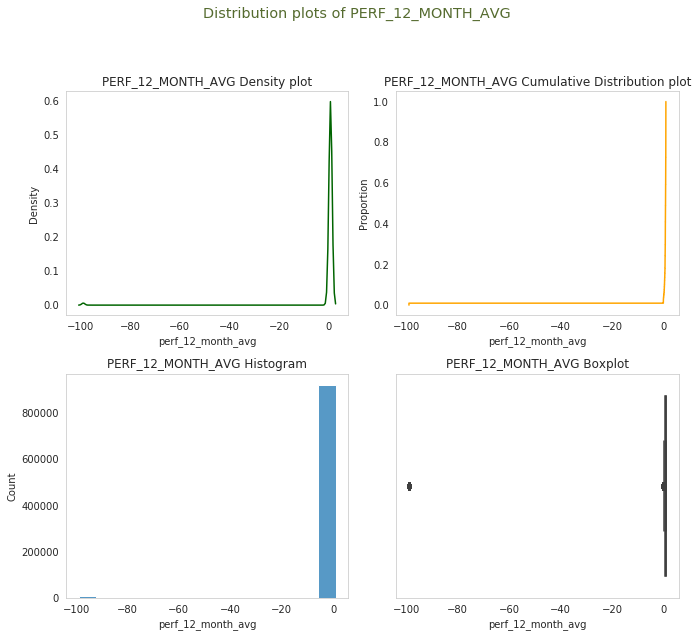

In [138]:
displot('perf_12_month_avg')

#### observations:
---
<font color = 'green'>
<b>
<i>

- From the stats of the feature we could observe that feature is negatively skewed, if we observe the histogram only few values have negative performace scores which is -99 and boxplot shows these negative vaues as outliers. May be the negative values are recorded due to some error because 25%le is 0.71 and max value is 1.0 which indicates that performance scores might be between 0.5-1.


 PERRCENTILE VALUES OF FEATURE  " PERF_12_MONTH_AVG ":

+------------+-------+
| percentile | value |
+------------+-------+
|    0%le    |  -99  |
|   10%le    |   0   |
|   20%le    |   0   |
|   30%le    |   0   |
|   40%le    |   0   |
|   50%le    |   0   |
|   60%le    |   0   |
|   70%le    |   0   |
|   80%le    |   0   |
|   90%le    |   0   |
|   100%le   |   1   |
+------------+-------+


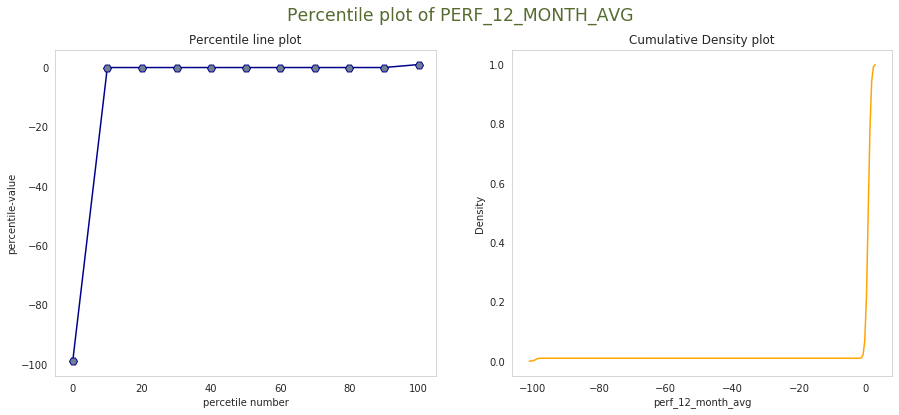

In [139]:
percentiles('perf_12_month_avg',print_=1)

In [140]:
percentile0_10('perf_12_month_avg')


 0-10 PERCENTILE VALUES OF FEATURE  " PERF_12_MONTH_AVG " :
-------------------------------------------------------
+------------+-------+
| Percentile | value |
+------------+-------+
|   0%le:    |  -99  |
|   1%le:    |   0   |
|   2%le:    |   0   |
|   3%le:    |   0   |
|   4%le:    |   0   |
|   5%le:    |   0   |
|   6%le:    |   0   |
|   7%le:    |   0   |
|   8%le:    |   0   |
|   9%le:    |   0   |
|  10%le:    |   0   |
+------------+-------+


In [141]:
print('There are',sum(df['perf_12_month_avg']<0),'products that have negative performance scores,',\
      'among them',df[df['perf_12_month_avg']<0]['went_on_backorder'].value_counts()['Yes']\
     ,'scores belong to performance of backorders.')


There are 8912 products that have negative performance scores, among them 56 scores belong to performance of backorders.


In [142]:
print('Percentiles of performance feature excluding negative values:')
print('-'*62)
for i in range(0,110,10):
    print(i,'%le:\t',np.percentile(df[df['perf_12_month_avg']>0]['perf_12_month_avg'],i))

Percentiles of performance feature excluding negative values:
--------------------------------------------------------------
0 %le:	 0.01
10 %le:	 0.52
20 %le:	 0.69
30 %le:	 0.77
40 %le:	 0.81
50 %le:	 0.87
60 %le:	 0.91
70 %le:	 0.95
80 %le:	 0.97
90 %le:	 0.99
100 %le:	 1.0


#### observations
---
<font color = 'green'>
<b>
<i>

- Upon looking at the percentile values of the performance feature, we can see less than 1% of the products have negative performance which is 8836 products, among them only 56 have backorders. All of these negative performance scores could be due to an error while collecting the data, so the products with neg performance scores will be removed.

    
- Percentile values excluding negative performance have shown that minimum value of performance is 0.01 and maximum value is 1.0, from these values we can conclude that performance is a score between 0 and 1.
    

- 90% of the products have performance values between 0.5 and 1.0 among them 70% of the products are given score greater than 0.7, only 10% of the products have performance scores less than 0.5. So based on these values, most of the product's performance through out the year must have been good.

In [143]:
#considering only positive values
df = df[df['perf_12_month_avg']>0]

print('DESCRIPTIVE STATS OF PERFORMANCE IN 12 MONTHS (without negative values):')
print('-'*45)
print(df['perf_12_month_avg'].describe().to_string())

DESCRIPTIVE STATS OF PERFORMANCE IN 12 MONTHS (without negative values):
---------------------------------------------
count    905301.000000
mean          0.807270
std           0.201264
min           0.010000
25%           0.740000
50%           0.870000
75%           0.960000
max           1.000000


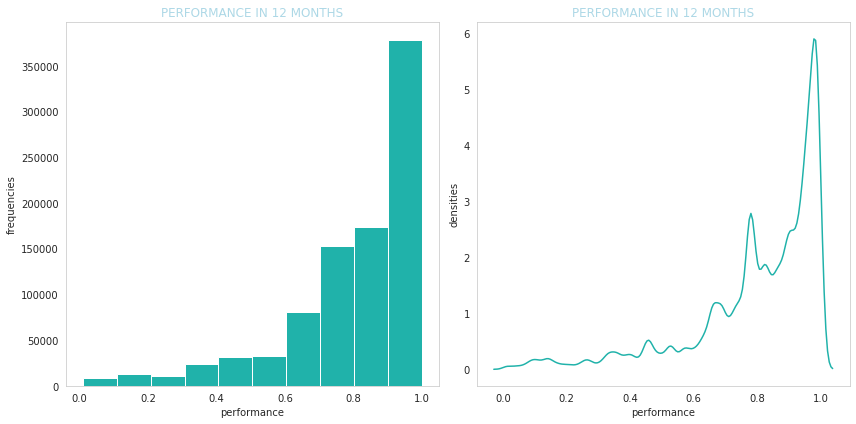

In [144]:
plt.figure(figsize=(12,6))

plt.subplot(121)

plt.hist(df['perf_12_month_avg'],bins=10,color = 'lightseagreen');
plt.xlabel('performance')
plt.ylabel('frequencies')
plt.title('Performance in 12 months'.upper(),color = 'lightblue')


plt.subplot(122)
sns.kdeplot(df['perf_12_month_avg'],color = 'lightseagreen')
plt.xlabel('performance')
plt.ylabel('densities')
plt.title('Performance in 12 months'.upper(),color = 'lightblue')

plt.tight_layout()
plt.show()


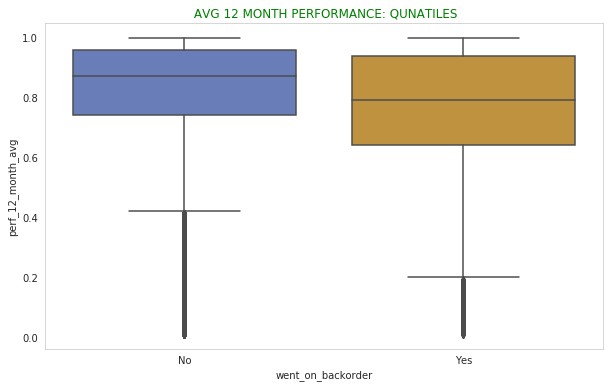

In [145]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df,x = 'went_on_backorder',y = 'perf_12_month_avg',palette = ['royalblue','orange'],saturation=0.5,);
plt.title(' avg 12 month performance: Qunatiles'.upper(),color='green');

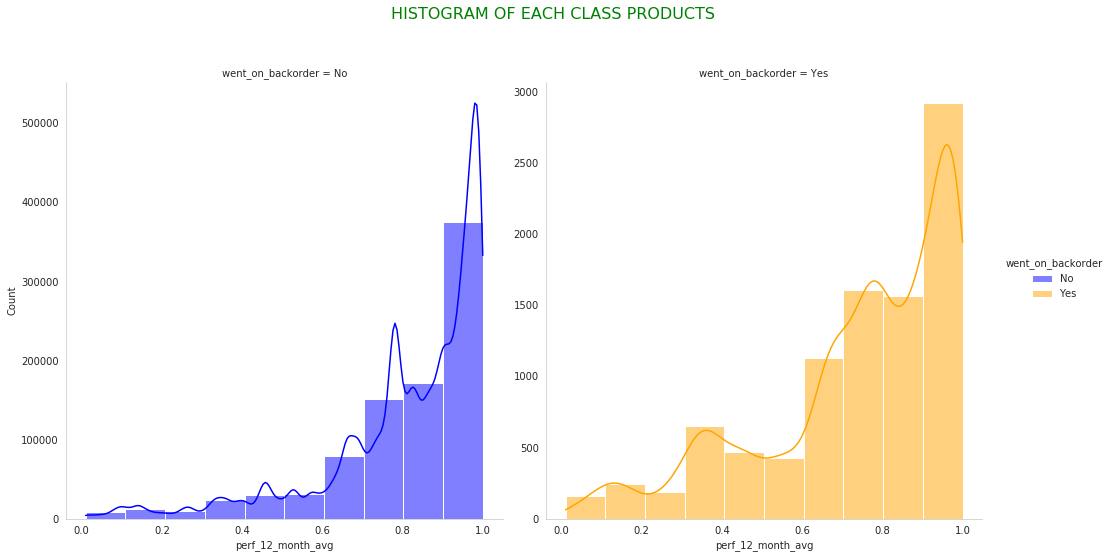

In [146]:
plt.close()
#plt.figure(figsize=(14,8))
sns.displot(data = df,x = 'perf_12_month_avg',col = 'went_on_backorder',hue = 'went_on_backorder',bins = 10,facet_kws={'sharey': False},palette = ['blue','orange'],height=7,aspect=1,kde=True)
plt.suptitle('Histogram of each class products'.upper(),color = 'green',fontsize=16,y=1.1)
plt.show()

#### observations:
---

<i>
<b>
    <font color = 'green'>

- From the above plot we can observe that more than 350000 of the products have been given a score between 0.9 and 1.0 which 40% of the overall data.


- Looking at the distributions of performance for backkorder and non-backorder products seperately, we can observe that performance of backorder products are higher than non-backorders. Probabilities of performance between 0.6 and 1.0 appear to be high for backorder products.

In [147]:
#training a logit model on this feature alone to see how useful it could be for classification
calculte_imp('perf_12_month_avg')

for i =  1
--------------------
AUC::  0.589
PR-AUC score :: 0.015 



<p style="font-size:18px;"> <b>Q.<font color = 'darkblue'> <i>Will 'perf_12_month_avg' feature be useful for building a good ML model?</i></p></font>
    
        Training logit model with performance feature alone didn't yeild good AUC or PR-AUC scores, since the no.of features for the dataset are not many we can include the feature to see if it helps in building a good ML model.

###  Analysis on categorical features: General risk flags

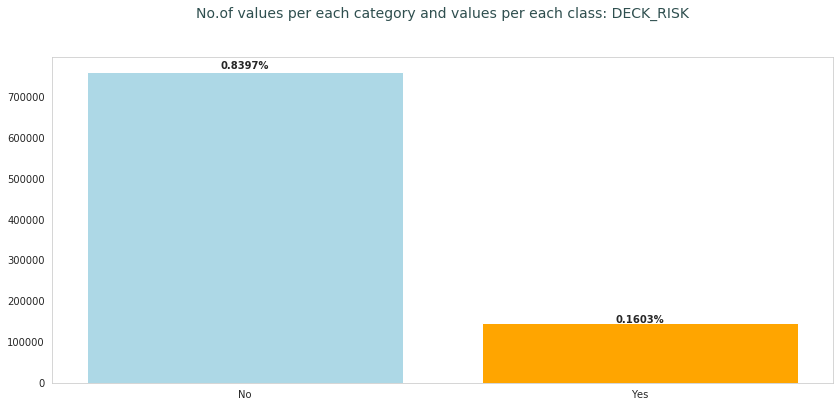

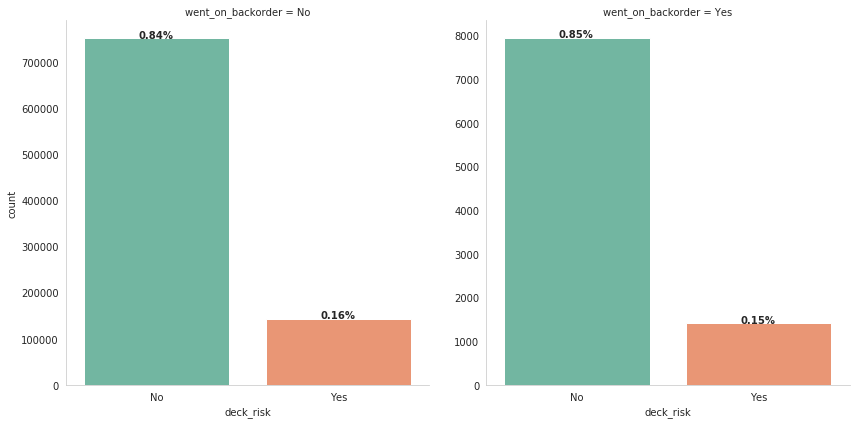

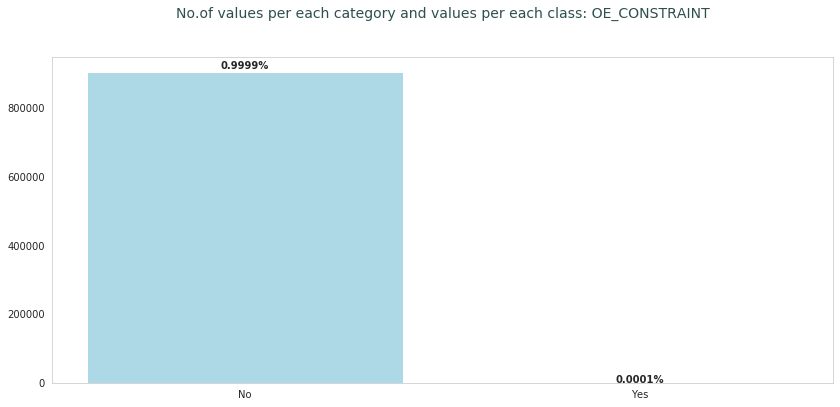

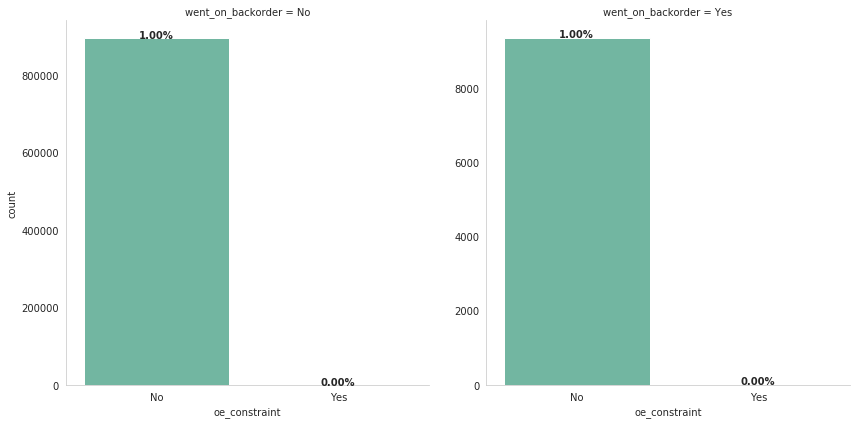

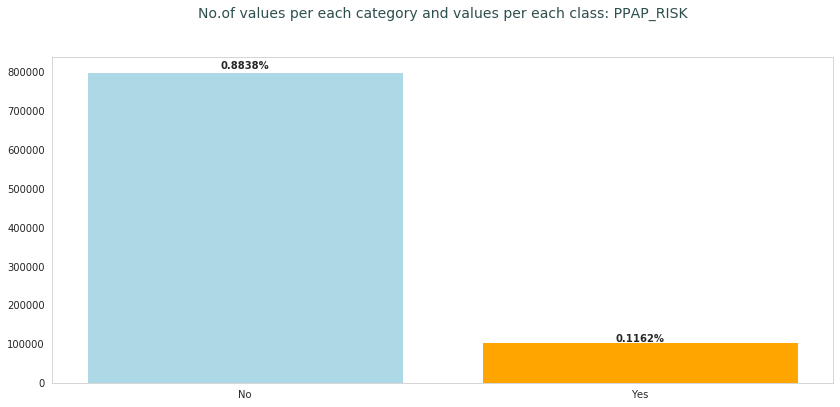

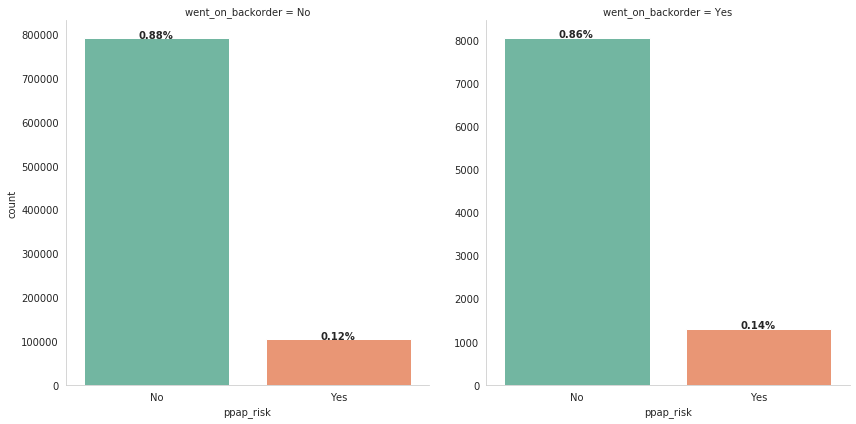

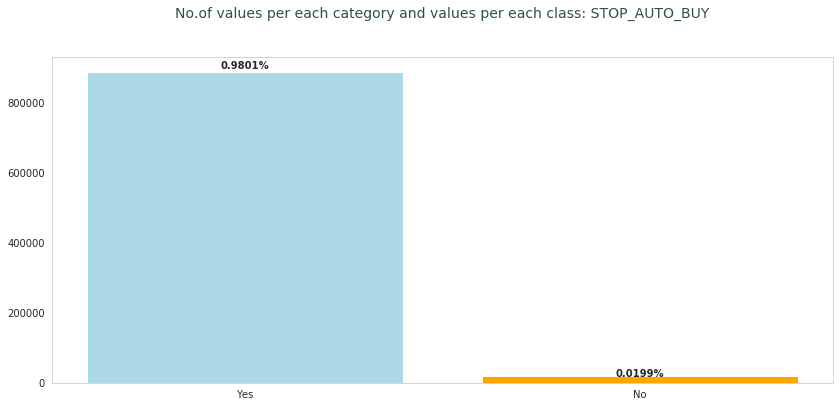

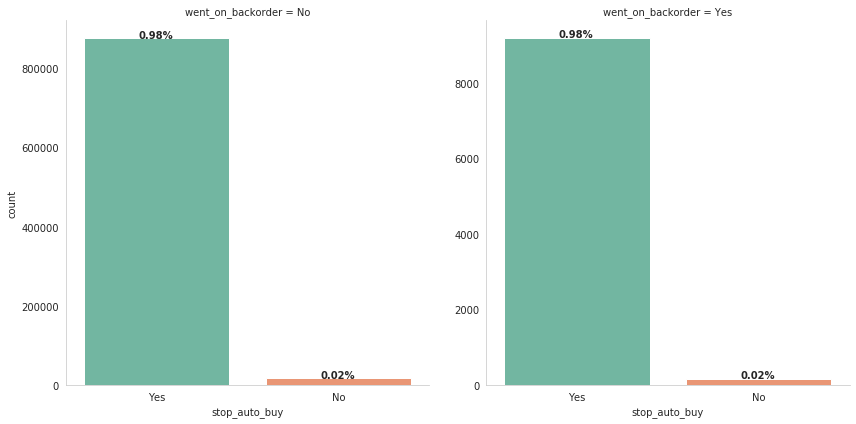

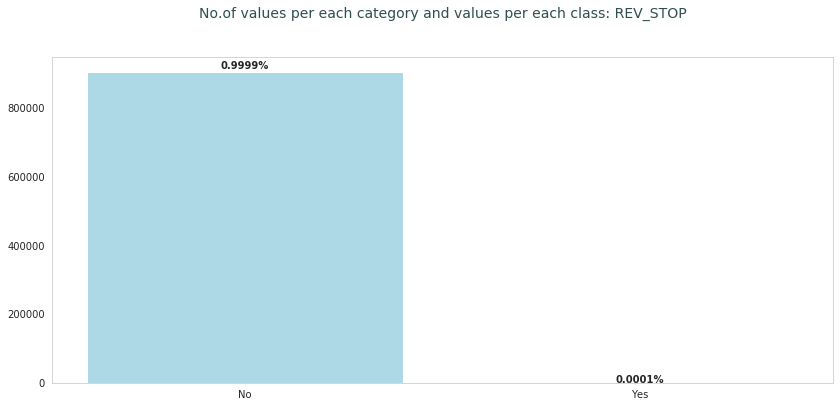

posx and posy should be finite values
posx and posy should be finite values


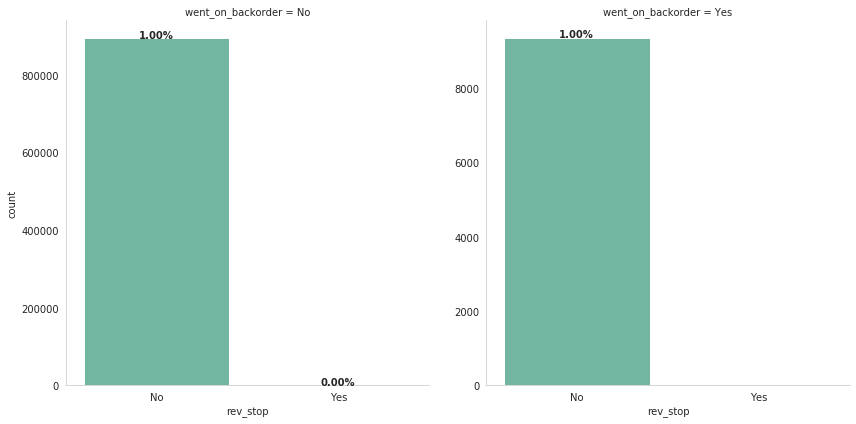

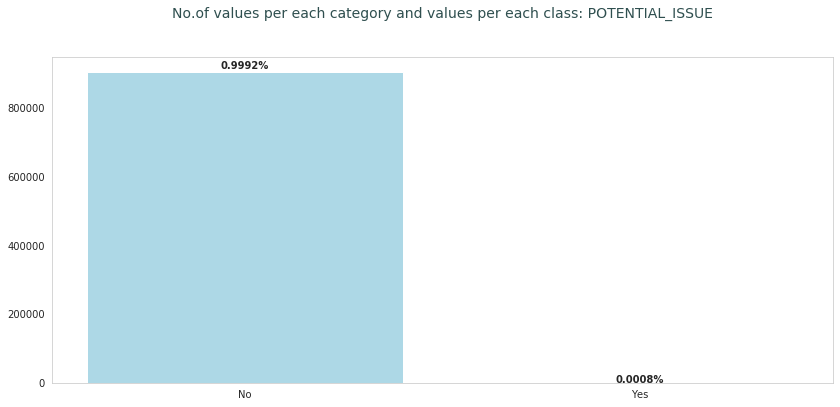

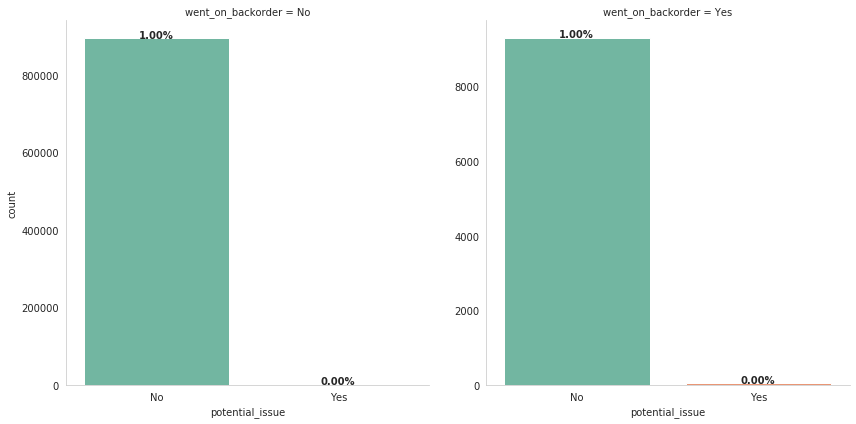

In [148]:
for column in ['deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop','potential_issue']:
    plt.figure(figsize=(14,6))
    graph = plt.bar(df[column].value_counts().index,df[column].value_counts().values,color = ['lightblue','orange'])
    Percentage=np.round(df[column].value_counts().values/df[column].value_counts().values.sum(),4)
    i = 0
    for p in graph:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        plt.text(x+width/2,
                 y+height*1.01,
                 str(Percentage[i])+'%',
                 ha='center',
                 weight='bold')
        i+=1
    plt.title('No.of values per each category and values per each class: '+str(column).upper(),color = 'darkslategrey',fontdict={'fontsize':14},y = 1.1)
    
    
    facet = sns.catplot(x=column, col="went_on_backorder",
                    data=df, kind="count",
                    height=6, aspect=1,sharey = False,palette = 'Set2');
    bo = 'No'
    i = 0
    for subplot in facet.axes[0]:
        #spots[0].get_height()/spots[0].get_height()+spots[1].get_height()
        spots = subplot.patches
        percentages = np.round(df[df['went_on_backorder']==bo][column].value_counts().values/df[df['went_on_backorder']==bo][column].value_counts().values.sum(),4)
    
        if len(percentages)<2:
            percentages = np.append(percentages,0)
            
        j = 0
        for spot in spots:
            
            height1 = spot.get_height()
            facet.axes[0][i].text(spot.get_x()+0.3, height1+3.1, '{:1.2f}%'.format(percentages[j]),weight='bold')

            j+=1
        i+=1
        bo = 'Yes'   
    plt.show()


In [ ]:
sns.box

#### Observations
---

<i>
<b>
    <font color = 'green'>

- only 16% of the products have problem of deck risk.Both Backorder products and Non-Backorder products have nearly same % of products with deck risk making us to rule out the possibility that deck risk could be a possibel reason for Backorders.


- Almost all the products doesn't have the risk of oe_contraint, only 0.0001% of the products have oe_constraint risk. So this feature may not be useful for predicting backorders.


- There are only 11% of products with PPAP risk,both backorder and non backorder products have near equal percent of products with PPAP risk.So this feature also may not be that useful for predicting backorders.


- Stop auto buy is 'Yes' for 98.23% of the products,futher looking at both class products there is no differnece in the % of products that have stop auto buy 'Yes' and 'No'.There are only 0.02% of the products that needed auto buy,this feature is not that useful as majority of products didn't need auto buy.


- rev_stop and potential issue are not useful for the classification because no product have any of these risks.


In [149]:
#training a logit model on this feature alone to see how useful it could be for classification

for column in df.select_dtypes(include = 'object'):
    df[column] = np.where(df[column] == 'Yes',1,0)
    
for column in ['deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop','potential_issue']:
    print(column)
    calculte_imp(column)

deck_risk
for i =  1
--------------------
AUC::  0.507
PR-AUC score :: 0.433 

oe_constraint
for i =  1
--------------------
AUC::  0.5
PR-AUC score :: 0.005 

ppap_risk
for i =  1
--------------------
AUC::  0.51
PR-AUC score :: 0.079 

stop_auto_buy
for i =  1
--------------------
AUC::  0.502
PR-AUC score :: 0.498 

rev_stop
for i =  1
--------------------
AUC::  0.5
PR-AUC score :: 0.505 

potential_issue
for i =  1
--------------------
AUC::  0.502
PR-AUC score :: 0.037 



<p style="font-size:18px;"> <b>Q.<font color = 'darkblue'> <i>Will 'general risk flags' be useful for building a good ML model?</i></p></font>
    
     All the general risk flags gave a very bad AUC score, but if we look at the flags deck_risk,stop_auto_buy,rev_stop the PR-AUC scores for these features are 0.43,0.5,0.5 respectively, which is a very good score. So these risk flags could be very useful in predicting backorders.

<h2>Visualizing the data</h2>

<Figure size 432x288 with 0 Axes>

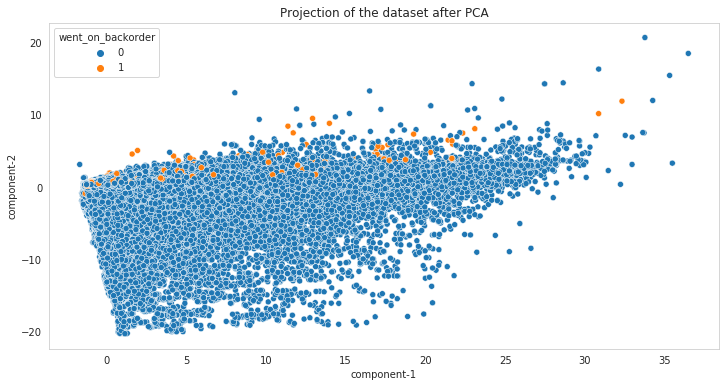

In [150]:
from sklearn.preprocessing import scale

scaled_data = scale(df.select_dtypes('number').drop(['deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop','potential_issue','went_on_backorder'],axis = 1))
np.hstack((scaled_data,df[['deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop','potential_issue']]))

pca_feats = PCA(n_components=2).fit_transform(scaled_data)

plt.clf();
plt.figure(figsize=(12,6))
sns.scatterplot(x = pca_feats[:,0],y=pca_feats[:,1],hue = df['went_on_backorder'])
plt.xlabel('component-1')
plt.ylabel('component-2')
plt.title('Projection of the dataset after PCA')
plt.show()

0    59380
1      620
Name: went_on_backorder, dtype: int64


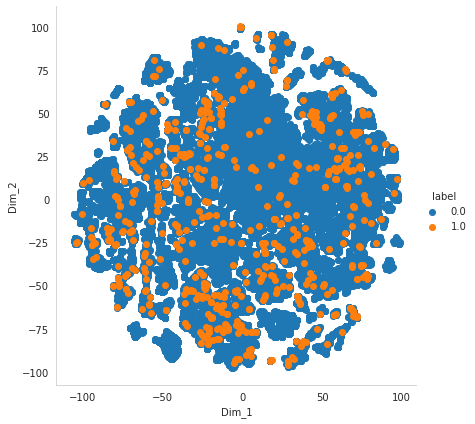

In [151]:
N = 60000
sample_data = df.groupby('went_on_backorder', group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(df))))).sample(frac=1).reset_index(drop=True)
print(sample_data['went_on_backorder'].value_counts())

std_data = StandardScaler().fit_transform(sample_data.drop(['went_on_backorder'],axis = 1))
model = TSNE(n_components=2, random_state=0,perplexity=30,n_iter=1500)

tsne_data = model.fit_transform(std_data)
tsne_data = np.vstack((tsne_data.T, sample_data['went_on_backorder'].values)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

#### observations
---
<i>
<b>
    <font color = 'green'>

- All the above visualization techniques show that both backorder and non-backorder product's data is overlapped with no clear seperation. Although the data is overlapped, from the plot of pca we could observe that all the backorder datapoints lying at upper area of the plot. So, building a linear model like Logit might help classifying the backorders but with a cost of misclassifying many non-backorders.

In [152]:
#training a logit model on PCA features to see the performance in classification of backorders

train, cv,y_train,y_cv = train_test_split(pca_feats,df['went_on_backorder'], test_size =0.3, stratify=df['went_on_backorder'])
train, test,y_train,y_test = train_test_split(train,y_train, test_size =0.3, stratify=y_train)
    
#print(train.shape,cv.shape,test.shape)
    
alpha = [10 ** x for x in range(-3, 4)] # hyperparam for SGD classifier.
for i in alpha:

    clf = SGDClassifier(alpha=i, penalty='l2', loss='log')
    clf.fit(train, y_train)

    pred_train_proba = clf.predict_proba(train)
    pred_cv_proba = clf.predict_proba(cv)

    fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, pred_train_proba[:,1])
    fpr_cv, tpr_cv, thresholds_cv = metrics.roc_curve(y_cv, pred_cv_proba[:,1])
    precision_train, recall_train, _ = precision_recall_curve(y_train, pred_train_proba[:,1])
    precision_cv, recall_cv, _ = precision_recall_curve(y_cv, pred_cv_proba[:,1])
    
    print('-'*15)
    print('for i = ',i)
    print('-'*15)

    print('train-AUC:: ',round(metrics.auc(fpr_train, tpr_train),3))
    print('cv-AUC:: ',round(metrics.auc(fpr_cv, tpr_cv),3))
    print('\n')
    print('train PR-AUC score ::',round(auc(recall_train, precision_train),3))
    print('cv PR-AUC score ::',round(auc(recall_cv, precision_cv),3),'\n')



---------------
for i =  0.001
---------------
train-AUC::  0.764
cv-AUC::  0.769


train PR-AUC score :: 0.034
cv PR-AUC score :: 0.035 

---------------
for i =  0.01
---------------
train-AUC::  0.611
cv-AUC::  0.613


train PR-AUC score :: 0.016
cv PR-AUC score :: 0.015 

---------------
for i =  0.1
---------------
train-AUC::  0.649
cv-AUC::  0.653


train PR-AUC score :: 0.02
cv PR-AUC score :: 0.019 

---------------
for i =  1
---------------
train-AUC::  0.638
cv-AUC::  0.641


train PR-AUC score :: 0.019
cv PR-AUC score :: 0.018 

---------------
for i =  10
---------------
train-AUC::  0.618
cv-AUC::  0.62


train PR-AUC score :: 0.017
cv PR-AUC score :: 0.015 

---------------
for i =  100
---------------
train-AUC::  0.608
cv-AUC::  0.608


train PR-AUC score :: 0.016
cv PR-AUC score :: 0.015 

---------------
for i =  1000
---------------
train-AUC::  0.606
cv-AUC::  0.606


train PR-AUC score :: 0.016
cv PR-AUC score :: 0.015 



In [153]:
clf = SGDClassifier(alpha=0.001, penalty='l2', loss='log')
clf.fit(train, y_train)

pred_train_proba = clf.predict_proba(train)
pred_cv_proba = clf.predict_proba(test)

fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, pred_train_proba[:,1])
fpr_cv, tpr_cv, thresholds_cv = metrics.roc_curve(y_test, pred_cv_proba[:,1])
precision_train, recall_train, _ = precision_recall_curve(y_train, pred_train_proba[:,1])
precision_cv, recall_cv, _ = precision_recall_curve(y_test, pred_cv_proba[:,1])
    
print('-'*15)
print('for i = ',0.001)
print('-'*15)

print('train-AUC:: ',round(metrics.auc(fpr_train, tpr_train),3))
print('test-AUC:: ',round(metrics.auc(fpr_cv, tpr_cv),3))
print('\n')
print('train PR-AUC score ::',round(auc(recall_train, precision_train),3))
print('test PR-AUC score ::',round(auc(recall_cv, precision_cv),3),'\n')

---------------
for i =  0.001
---------------
train-AUC::  0.761
test-AUC::  0.763


train PR-AUC score :: 0.033
test PR-AUC score :: 0.033 



<i>
<b>
    <font color = 'green'>

<p>
Training a logit model on the PCA components gave an AUC of 0.764 which is a good score, but the PR-AUC score is very poor 0.034. Including PCA components as features for training the model might help in better classification of Backorders
    </p>

<h2> 3.4 Feature Engineering </h2>

#### What Causes Backorders?

Following are the common causes of Backorders: 

1. Unusual demand or demand exceeds supply.
2. Inaccurate forecasting.
3. Supplier or manufacturing issue.
4. Delayed orders.
5. Human errors.
6. Warehouse management discrepancies.

Based on the above causes of backorders we could create following features from the dataset,

- We've already seen that there isn't any unusual demand or seasonality we could observe from the sales of products, so we can't make a feature out of this cause.


- We can create a feature for inaccurate forecasting from the data available by subtracting forecast values from sales values.


- A feature min_bank_error has already been created which is the difference between current inventory and minimum stock recommended, this feature contains -ve values where minimum stock is not maintained. We observed that a logit model yeilded good AUC score when trained on this feature. We can account this feature as warehouse management discrepancies. 
      
      
- Also when subtracting avg performance in 6 months from performance in 12 months we can obtain a feature which indicate decrease or increase in performance.





<h3> Inaccurate forecasting </h3>

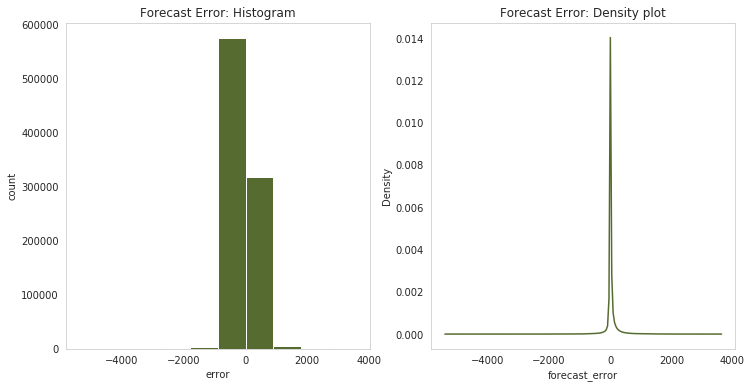

In [154]:
#creating feature inaccurate forecsting
df['forecast_error'] = df['sales_9_month'] - df['forecast_9_month']

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.hist(df['forecast_error'],color = 'darkolivegreen');
plt.xlabel('error')
plt.ylabel('count')
plt.title('Forecast Error: Histogram')

plt.subplot(122)
sns.kdeplot(df['forecast_error'],color = 'darkolivegreen')
plt.title('Forecast Error: Density plot')

plt.show()

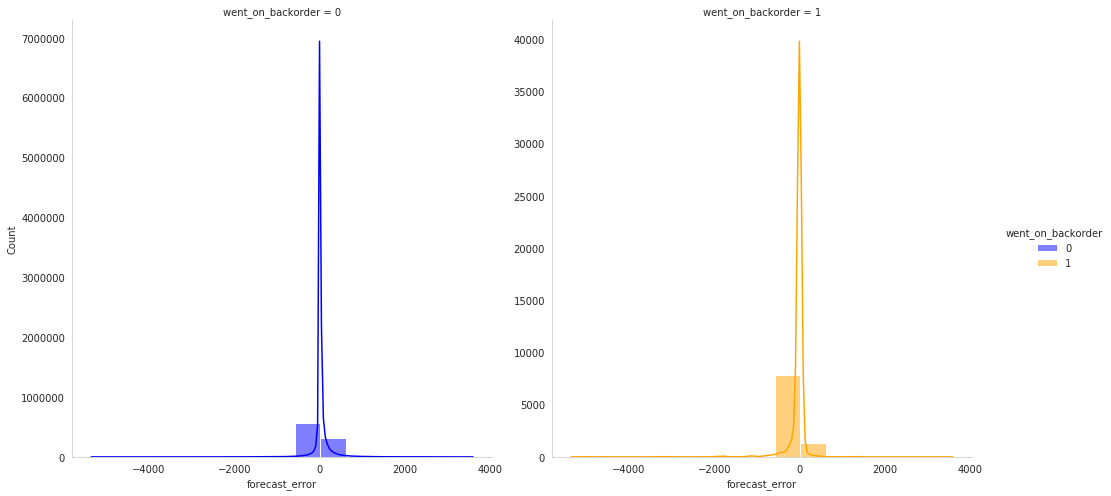

In [155]:
sns.displot(data = df,x = 'forecast_error',col = 'went_on_backorder',hue = 'went_on_backorder',bins = 15,facet_kws={'sharey': False},palette = ['blue','orange'],height=7,aspect=1,kde=True)

In [156]:
#training a logit model on this feature alone to see how useful it could be for classification
calculte_imp('forecast_error')

for i =  1
--------------------
AUC::  0.695
PR-AUC score :: 0.02 



<i>
<b>
    <font color = 'green'>

- It seems that forecast error might be an useful feature in predicting Backorders, we can see it gave an AUC of 0.70 which is a good score considering a model trained on a single feature. We can use this feature for training ML model.

<h3> Performance Change </h3>

In [157]:
#training a logit model on this feature alone to see how useful it could be for classification
df['perf_diff'] = df['perf_12_month_avg'] - df['perf_6_month_avg']
print('There are ',sum((df['perf_12_month_avg'] - df['perf_6_month_avg'])<0),' products whose performance scores have decreased after the first six months')

There are  408823  products whose performance scores have decreased after the first six months


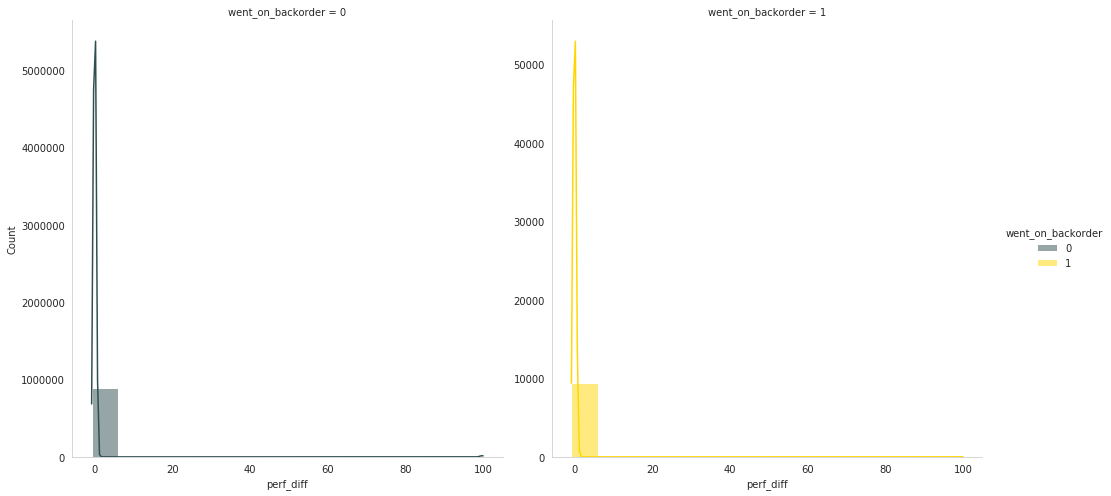

In [158]:
sns.displot(data = df,x = 'perf_diff',col = 'went_on_backorder',hue = 'went_on_backorder',bins = 15,facet_kws={'sharey': False},palette = ['darkslategrey','gold'],height=7,aspect=1,kde=True);

In [159]:
calculte_imp('perf_diff')

for i =  1
--------------------
AUC::  0.49
PR-AUC score :: 0.01 



<font color = 'green'>
 <b>   
    <i>
     
- Performace change doesn't seem to be useful for classifying backorders because we can see the AUC yeilded was 0.48 which is worse than the random model.
        

###  Leadtime demand
        leadtime demand = leadtime * avg daily sales

In [160]:
# creating feature leadtime demand and calculating its importance
df['leadtime_demand'] = (df['sales_1_month']/30)* (df['lead_time'])
calculte_imp('leadtime_demand')

for i =  1
--------------------
AUC::  0.485
PR-AUC score :: 0.127 



<font color = 'green'>
 <b>   
    <i>
        
- AUC score of logit model when trained on leadtime demand feature was worse than a random model but PR-AUC seems to be some good. As  we only have 26 features in total we will include this feature for training .

##  Observations from overall analysis:
------------------------------------------------------------
<font color = 'darkslategrey'>
<i>
<b>

   - Distribution of the class variable is extremely skewed with only 1% of the data belonging to postive class and the ratio of negative class label to postive class labels being 148:1. Techniques like oversampling and undersampling must be used to balance the data as models may get affected due to this skewness.
    
    
   - Features forecast,sales,minimum recommended stock and intransit qunatity have distributions that resemble a pareto distribution. Transforming these features into Gaussian distibuted variable can be help for models that assume data to be normal.
    

   - Most of the features gave either a good AUC score or PR-AUC score when a logit model is trained on each of these features. But features ppap_risk,oe_constraint,potential_issue,pieces past due and current backorders of products didn't provide much information in the analysis. So, these features can be excluded while training ML models.
    
    
   - Features forecast error,leadtime demand and minbank_error that are created from the existing features gave good results when a logit model is trained on these features. So including these features while training models will be very useful in predicting backorders. Also training a logit model on PCA features gave a good AUC score too, so we can include pca features while training models.
    
   
   - Visualizing the data after performing PCA and T-SNE shows that datapoints of both classes overlap on each other with no clear seperation. Models that classifies based on nearest neighbors might be useful for better prediction of backorders. And there appears to be some interaction between the variables, so using tree based models might also yield better results.
    



### Performance-Metric to use:


- We observed that the data is extremely imbalanced with only 1% of data belonging to the positive class, so we need to consider the class imbalance problem along with business constraints inorder to choose a right performance metric for evaluation of models.


- Unlike some metrics such as accuracy which measures the rate of model-predictions matching the true labels and gets impacted by imbalance, ROC-AUC measures how well the model is doing in seperating the positive datapoints from negative datapoints what ever the class distibution is. So choosing ROC-AUC as performance metric is appropriate for the data.


- Apart from ROC-AUC, we can use PR-AUC & confusion-matrix as secondary performance metric to evaluate the model since ROC-AUC can also be slightly affected by extreme class imbalance.
 